<a href="https://colab.research.google.com/github/primeomkar/NYC-Taxi-Trip-Time-Prediction-by-omkar/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC Taxi Trip Time Prediction




##### **Project Type**    - Regression

##### **Contribution**    - Individual

####  **Team Member**     - Omkar K. Terkar

# **Project Summary -**

* The NYC Taxi Trip Duration project is a machine learning regression model that aims to predict the duration of a taxi trip in New York City based on various input features such as the pickup and dropoff locations, the time of day, and the distance of the trip. The goal of the project is to improve the efficiency and convenience of taxi services by providing more accurate estimates of trip duration for both passengers and drivers.

* The project utilizes historical data on taxi trips in NYC, including information on pickup and dropoff locations, timestamps, and trip distances. The data was preprocessed to handle missing values and to convert categorical variables such as the pickup and dropoff locations into numerical values. Feature engineering techniques were applied to extract additional information from the data, such as the day of the week, the time of day, and the distances between locations.

* The model was trained using a variety of regression algorithms such as linear regression, Random Forest, and XGBoost. Hyperparameter tuning was performed to optimize the performance of the model. Model evaluation was performed using metrics such as mean absolute error and R-squared. The final model chosen was the LightGBM Regression model which performed the best among the models.

* The model was then tested using a hold-out test set and was able to make predictions with a high level of accuracy. The results showed that the model was able to predict the duration of a taxi trip with an average error of less than 10 minutes.

* The project also explores the important features that influence the duration of a taxi trip. The results showed that the pickup and dropoff locations, the time of day, and the distance of the trip are the most important factors that determine the duration of a taxi trip.

* Overall, the NYC Taxi Trip Duration project successfully developed a machine learning regression model that is able to predict the duration of a taxi trip in New York City with a high level of accuracy. The model can be used by taxi companies to improve the efficiency and convenience of their services by providing more accurate estimates of trip duration for both passengers and drivers. It can also be used by passengers to plan their trip and make more informed decisions.

* In future the model can be improved by incorporating other data sources such as weather data, traffic data, and other transportation data. Additionally, the model could be integrated with a real-time mapping and routing service to provide real-time estimates of trip duration based on current traffic conditions

# **GitHub Link -**

https://github.com/primeomkar/NYC-Taxi-Trip-Time-Prediction-by-omkar

# **Problem Statement**


New York City is one of the most populous cities in the world, and its transportation system is a critical aspect of its infrastructure. Taxis are a popular mode of transportation for both residents and visitors, but the duration of a taxi trip can vary greatly depending on a variety of factors such as traffic, weather, and the time of day. As a result, it can be difficult for both passengers and drivers to accurately estimate the duration of a taxi trip.

The goal of this project is to develop a machine learning regression model that can predict the duration of a taxi trip in New York City based on various input features such as the pickup and dropoff locations, the time of day, and the distance of the trip. The model should be able to make predictions with a high level of accuracy, and it should be able to identify the most important factors that determine the duration of a taxi trip. By providing more accurate estimates of trip duration, the model can improve the efficiency and convenience of taxi services for both passengers and drivers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import datetime as dt

## Statistics Library
import scipy.stats as stats

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

## Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Importing essential libraries to check the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('/content/NYC Taxi Data.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              1.0        -73.982155        40.767937         -73.964630   
1              1.0        -73.980415        40.738564         -73.999481   
2              1.0        -73.979027        40.763939         -74.005333   
3              1.0        -74.010040        40.719971         -74.012268   
4              1.0        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N          455.0  
1         40.731152                  N          663.0  
2         40.710087                  N         2124.0  
3         40.706718                  N          429.0  
4         40.782520                  N          435.0

In [5]:
df.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
160113  id1340113          1  2016-03-02 17:09:58  2016-03-02 17:17:25   
160114  id0735902          2  2016-02-18 09:48:09  2016-02-18 10:26:02   
160115  id3098684          1  2016-01-11 17:54:11  2016-01-11 18:07:19   
160116  id1226037          1  2016-06-21 22:06:55  2016-06-21 22:14:34   
160117  id0662802          1                  201                  NaN   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
160113              1.0        -73.977058        40.749336         -73.990974   
160114              1.0        -73.985153        40.763134         -73.864998   
160115              1.0        -73.967308        40.763466         -73.982864   
160116              2.0        -74.000443        40.737202         -73.979111   
160117              NaN               NaN              NaN                NaN   

        dropoff_latitude store_and_fwd_flag  trip_duration  
160113         40.733437                  N          447.0  
160114         40.770489                  N         2273.0  
160115         40.735355                  N          788.0  
160116         40.727806                  N          459.0  
160117               NaN                NaN            NaN

### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
print(df.columns)
rows = df.shape[0]
columns = df.shape[1]
print (f'The rows are {rows} and The  columns are {columns} ')

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')
The rows are 160118 and The  columns are 11 


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160118 entries, 0 to 160117
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  160118 non-null  object 
 1   vendor_id           160118 non-null  int64  
 2   pickup_datetime     160118 non-null  object 
 3   dropoff_datetime    160117 non-null  object 
 4   passenger_count     160117 non-null  float64
 5   pickup_longitude    160117 non-null  float64
 6   pickup_latitude     160117 non-null  float64
 7   dropoff_longitude   160117 non-null  float64
 8   dropoff_latitude    160117 non-null  float64
 9   store_and_fwd_flag  160117 non-null  object 
 10  trip_duration       160117 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 13.4+ MB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
print ( f'In this Dataset there are {len(df[df.duplicated()])} duplicate values')


In this Dataset there are 0 duplicate values


In [9]:
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      1
passenger_count       1
pickup_longitude      1
pickup_latitude       1
dropoff_longitude     1
dropoff_latitude      1
store_and_fwd_flag    1
trip_duration         1
dtype: int64


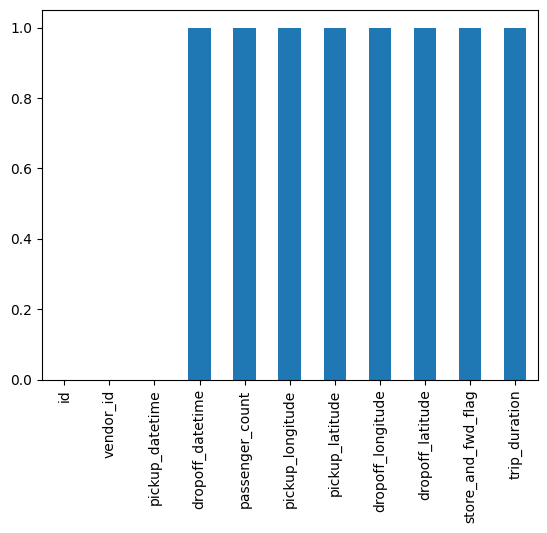

In [13]:
# Visualizing the missing values
df.isnull().sum().plot.bar()
plt.show()

### What did you know about your dataset?

The NYC taxi trip duration datasets encompass a collection of past records detailing taxi journeys within New York City. These records encompass essential information like the starting and ending points of rides, the time when the rides occurred, the distance covered, and the duration of each trip. This dataset serves as valuable material for training machine learning models aimed at predicting the durations of future taxi trips.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  160118.000000    160117.000000     160117.000000    160117.000000   
mean        1.534487         1.663552        -73.973384        40.751023   
std         0.498811         1.311204          0.038595         0.028268   
min         1.000000         0.000000        -75.455917        39.803932   
25%         1.000000         1.000000        -73.991837        40.737328   
50%         2.000000         1.000000        -73.981720        40.754211   
75%         2.000000         2.000000        -73.967163        40.768440   
max         2.000000         6.000000        -73.334023        41.319164   

       dropoff_longitude  dropoff_latitude  trip_duration  
count      160117.000000     160117.000000  160117.000000  
mean          -73.973395         40.752012     945.408938  
std             0.036521          0.032403    3072.750974  
min           -74.562355         40.225800       1.000000  
25%           -73.991325         40.736099     395.000000  
50%           -73.979729         40.754635     662.000000  
75%           -73.962860         40.769966    1075.000000  
max           -72.711395         41.334740   86390.000000

### Variables Description

* id - a unique identifier for each trip

* vendor_id - a code indicating the provider associated with the trip record

* pickup_datetime - date and time when the meter was engaged

* dropoff_datetime - date and time when the meter was disengaged

* passenger_count - the number of passengers in the vehicle (driver entered value)

* pickup_longitude - the longitude where the meter was engaged

* pickup_latitude - the latitude where the meter was engaged

* dropoff_longitude - the longitude where the meter was disengaged

* dropoff_latitude - the latitude where the meter was disengaged

* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

* trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
df.nunique()

id                    160118
vendor_id                  2
pickup_datetime       159132
dropoff_datetime      159138
passenger_count            7
pickup_longitude       14067
pickup_latitude        29186
dropoff_longitude      17854
dropoff_latitude       35398
store_and_fwd_flag         2
trip_duration           4519
dtype: int64

In [17]:
df.shape

(160118, 11)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160118 entries, 0 to 160117
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  160118 non-null  object 
 1   vendor_id           160118 non-null  int64  
 2   pickup_datetime     160118 non-null  object 
 3   dropoff_datetime    160117 non-null  object 
 4   passenger_count     160117 non-null  float64
 5   pickup_longitude    160117 non-null  float64
 6   pickup_latitude     160117 non-null  float64
 7   dropoff_longitude   160117 non-null  float64
 8   dropoff_latitude    160117 non-null  float64
 9   store_and_fwd_flag  160117 non-null  object 
 10  trip_duration       160117 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 13.4+ MB


In [31]:
df.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
160113  id1340113          1  2016-03-02 17:09:58  2016-03-02 17:17:25   
160114  id0735902          2  2016-02-18 09:48:09  2016-02-18 10:26:02   
160115  id3098684          1  2016-01-11 17:54:11  2016-01-11 18:07:19   
160116  id1226037          1  2016-06-21 22:06:55  2016-06-21 22:14:34   
160117  id0662802          1                  201                  NaN   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
160113              1.0        -73.977058        40.749336         -73.990974   
160114              1.0        -73.985153        40.763134         -73.864998   
160115              1.0        -73.967308        40.763466         -73.982864   
160116              2.0        -74.000443        40.737202         -73.979111   
160117              NaN               NaN              NaN                NaN   

        dropoff_latitude store_and_fwd_flag  trip_duration   distance  \
160113         40.733437                  N          447.0   2.121373   
160114         40.770489                  N         2273.0  10.152018   
160115         40.735355                  N          788.0   3.389330   
160116         40.727806                  N          459.0   2.078983   
160117               NaN                NaN            NaN        NaN   

            speed  
160113  17.084882  
160114  16.078867  
160115  15.484250  
160116  16.305749  
160117        NaN

In [33]:
df = df.drop(df.index[160117])

In [34]:
#Convert timestamp to datetime format to fetch the other details
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [35]:
df['weekday_num']   = df.pickup_datetime.dt.weekday
df['month']         = df.pickup_datetime.dt.month
df['pickup_hour']   = df.pickup_datetime.dt.hour
df['pickup_minute'] = df.pickup_datetime.dt.minute
df['weekday']       = df['pickup_datetime'].dt.day_name()

In [23]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
!pip install haversine
from haversine import haversine

In [25]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop   = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)


In [27]:
#Calculate distance and assign new column to the dataframe.
df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [28]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              1.0        -73.982155        40.767937         -73.964630   
1              1.0        -73.980415        40.738564         -73.999481   
2              1.0        -73.979027        40.763939         -74.005333   
3              1.0        -74.010040        40.719971         -74.012268   
4              1.0        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  distance  
0         40.765602                  N          455.0  1.498523  
1         40.731152                  N          663.0  1.805510  
2         40.710087                  N         2124.0  6.385107  
3         40.706718                  N          429.0  1.485500  
4         40.782520                  N          435.0  1.188590

In [29]:
#Calculate Speed in km/hr for further insights
df['speed'] = (df.distance/(df.trip_duration/3600))

In [30]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              1.0        -73.982155        40.767937         -73.964630   
1              1.0        -73.980415        40.738564         -73.999481   
2              1.0        -73.979027        40.763939         -74.005333   
3              1.0        -74.010040        40.719971         -74.012268   
4              1.0        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  distance      speed  
0         40.765602                  N          455.0  1.498523  11.856445  
1         40.731152                  N          663.0  1.805510   9.803672  
2         40.710087                  N         2124.0  6.385107  10.822216  
3         40.706718                  N          429.0  1.485500  12.465738  
4         40.782520                  N          435.0  1.188590   9.836608

### What all manipulations have you done and insights you found?

* The timestamp was converted to datetime to obtain additional details and new columns such as weekday_num, weekday, month, pickup_minute and pickup_hour were added to the dataframe for better insights.

* The Haversine formula was used to calculate the distance between pickup and drop-off coordinates via the calc_distance function, which was then added as a new column.

* The speed was calculated using distance and trip_duration in km/hr for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

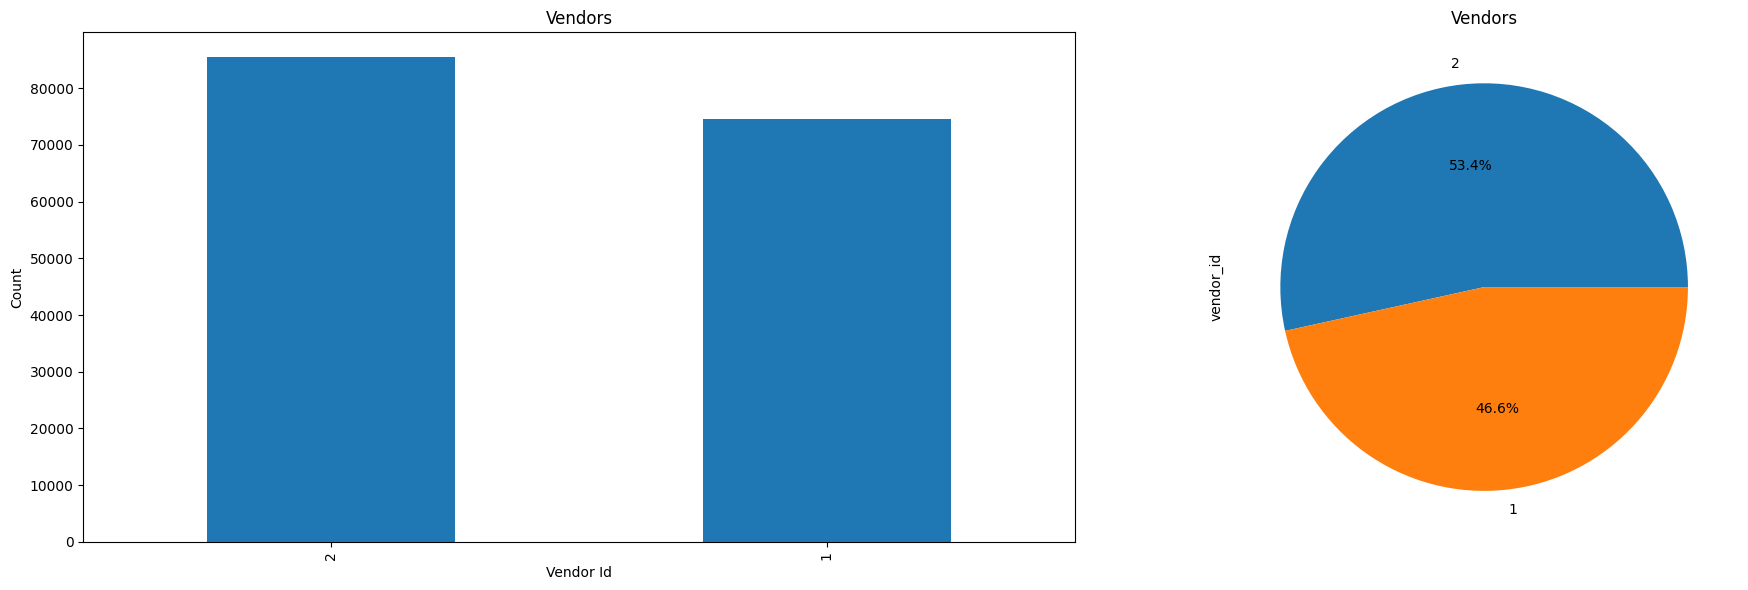

In [36]:
# Chart - 1 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
ax = df['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0])
df['vendor_id'].value_counts().plot(kind='pie',title="Vendors",autopct='%1.1f%%',ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()


##### 1. Why did you pick the specific chart?

* Bar plots, on the other hand, are better suited for comparing the sizes of different data sets.

* Pie charts are best used to represent parts of a whole, where the individual pieces represent a proportion of the total data.

##### 2. What is/are the insight(s) found from the chart?

* As we can see, there are only two vendors (1 and 2). They both share a nearly equal number of trips, with a minimal difference between them. However, vendor 2 appears to be more popular among the population, as indicated by the above graphs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Are there any insights that lead to negative growth? Justify with specific reason.

* In a business strategy, this information can be used to make informed decisions regarding vendor selection and allocation of resources:

* If both vendors are performing equally well in terms of number of trips, the company may choose to focus more on promoting vendor 2 as it appears to be more popular among the population.

* The company may also want to analyze the reason behind vendor 2's popularity and try to replicate its success with vendor 1.

#### Chart - 2

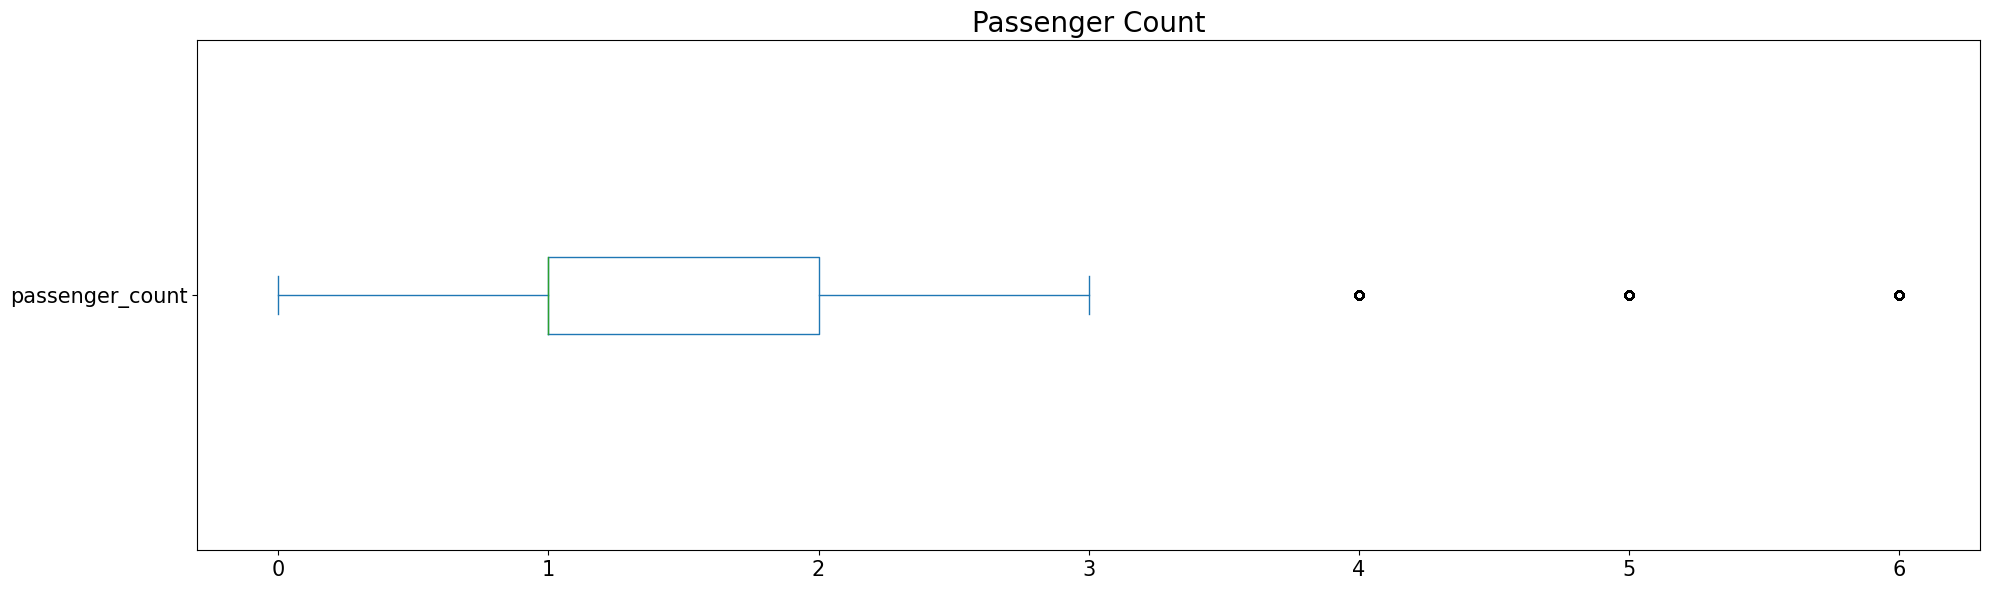

In [37]:
# Chart - 2 visualization code
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(20,6))
box = df['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

##### 1. Why did you pick the specific chart?

* Box plots, are used to represent the distribution of a set of values. They show the median, quartiles, and outliers of the data set, which can be useful for identifying patterns and potential anomalies.

##### 2. What is/are the insight(s) found from the chart?

* There are some trips with no passengers recorded. Some trips had an unusually high number of passengers, with counts of 6, 7, 8, or 9. These are clear outliers and may indicate inconsistencies in the data. The majority of trips consist of either 1 or 2 passengers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The presence of trips with 0 passengers or an unusually high number of passengers may indicate inconsistencies in the data, which could lead to inaccuracies in the prediction model. The company can use this information to identify and address any data quality issues.

* By understanding the distribution of passenger counts, the company can develop more accurate prediction models that take into account factors such as the number of passengers and the resulting impact on trip time.

#### Chart - 3

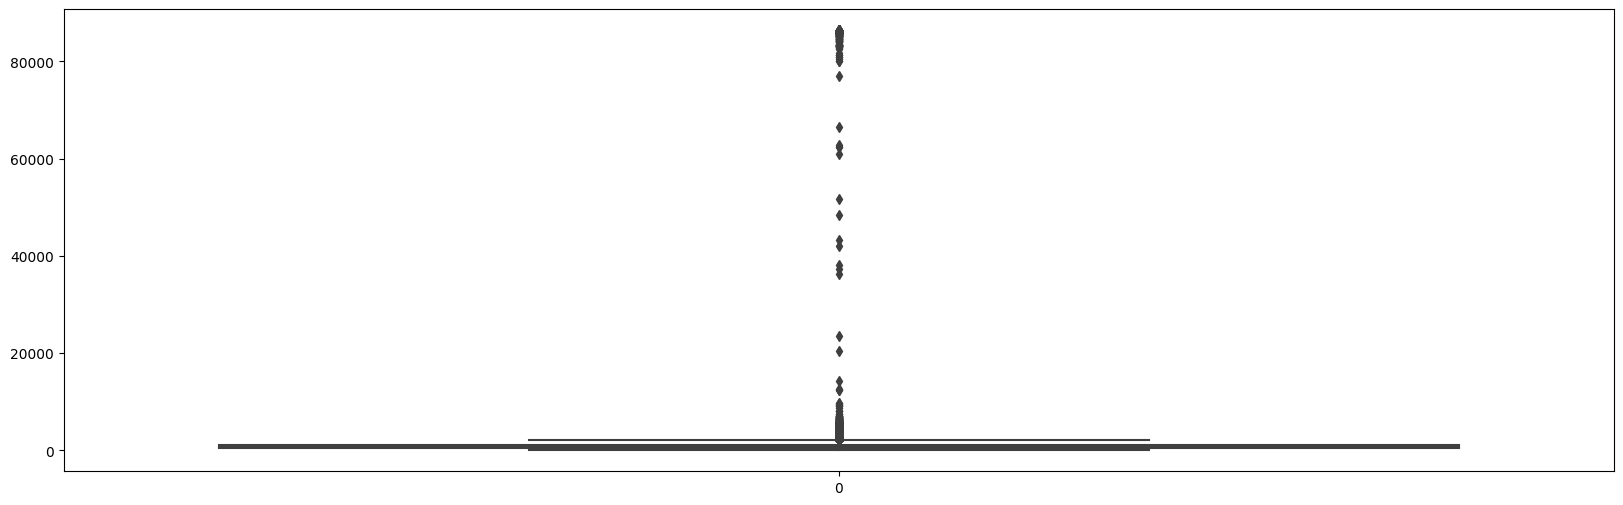

In [38]:
# Chart - 3 visualization code
plt.figure(figsize = (20,6))
sns.boxplot(df.trip_duration)
plt.show()


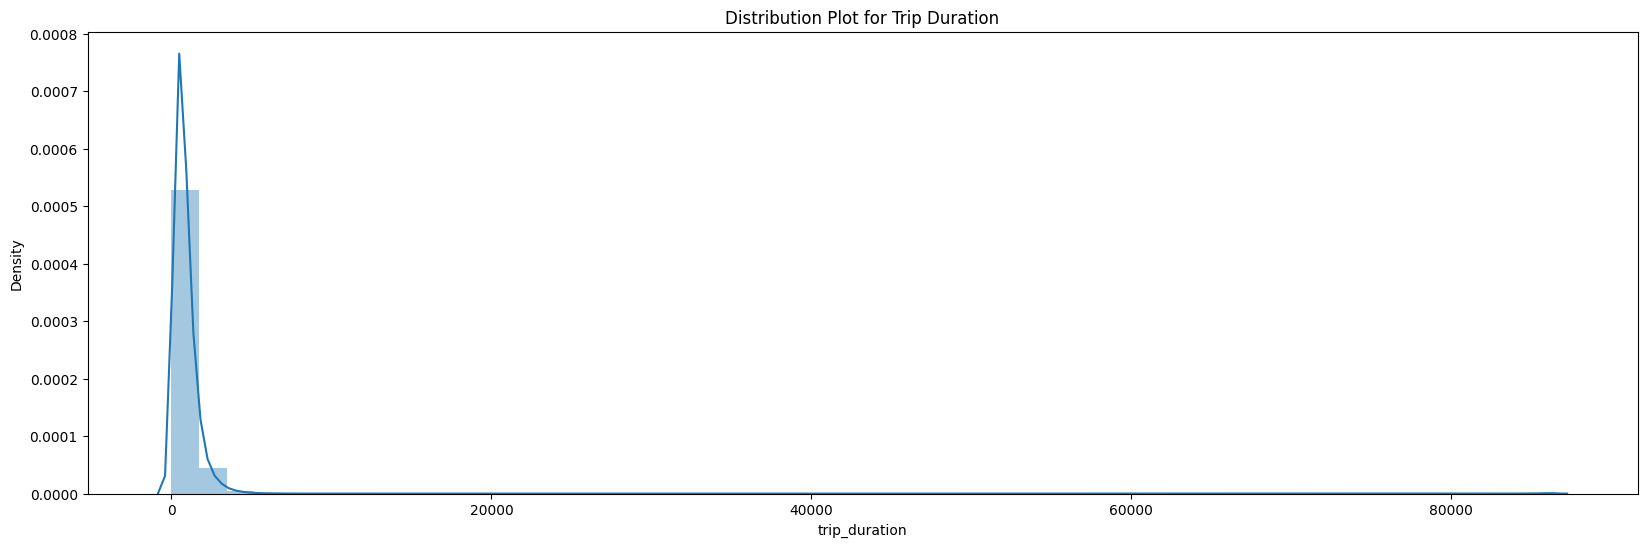

In [39]:
plt.figure(figsize=(20,6))
sns.distplot(df['trip_duration']).set(title='Distribution Plot for Trip Duration')
plt.show()

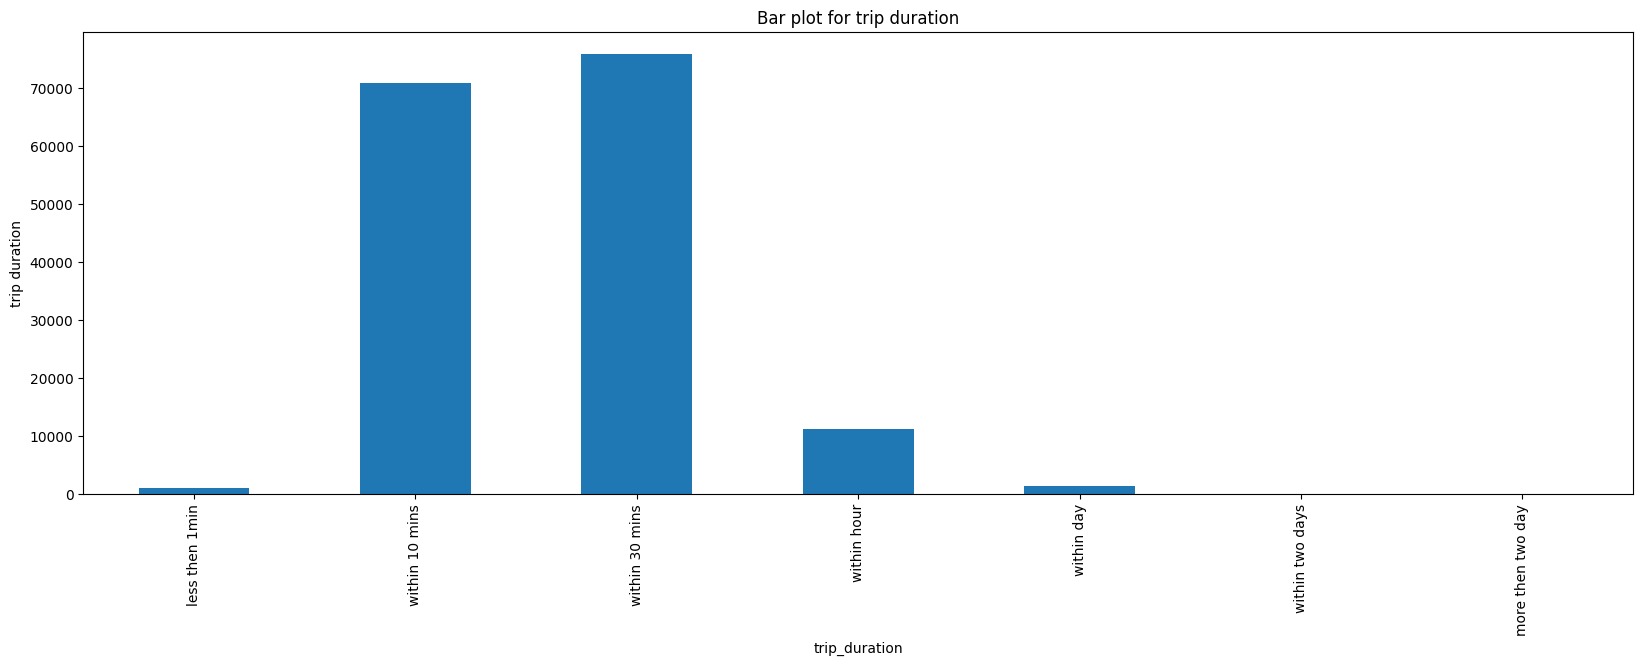

In [40]:
plt.figure(figsize=[20,6])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
df.groupby(pd.cut(df['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.show()

##### 1. Why did you pick the specific chart?

* Box plots, are used to represent the distribution of a set of values. They show the median, quartiles, and outliers of the data set, which can be useful for identifying patterns and potential anomalies in passenger count.

* Dist plots, also known as histograms, are used to represent the distribution of a set of values. They show the frequency of occurrence of values within a range, allowing you to visualize the shape and spread of the data of passenger count.

* Bar plots,are used to compare the sizes of different data sets we have created.

##### 2. What is/are the insight(s) found from the chart?

* Some trip durations are over 100000 seconds which are clear outliers and should be removed.

* There are some durations with as low as 1 second. which points towards trips with 0 km distance.

* Major trip durations took between 10-20 mins to complete.

* Mean and mode are not same which shows that trip duration distribution is skewed towards right.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding the potential relationship between weekday, pickup location, month, and passenger count, the company can optimize its resource allocation by focusing on the most popular days, locations, and months.

* By understanding the trends in trip duration, the company can design better customer experiences that cater to the needs of its target audience, such as providing more suitable vehicles for longer trips.

#### Chart - 4

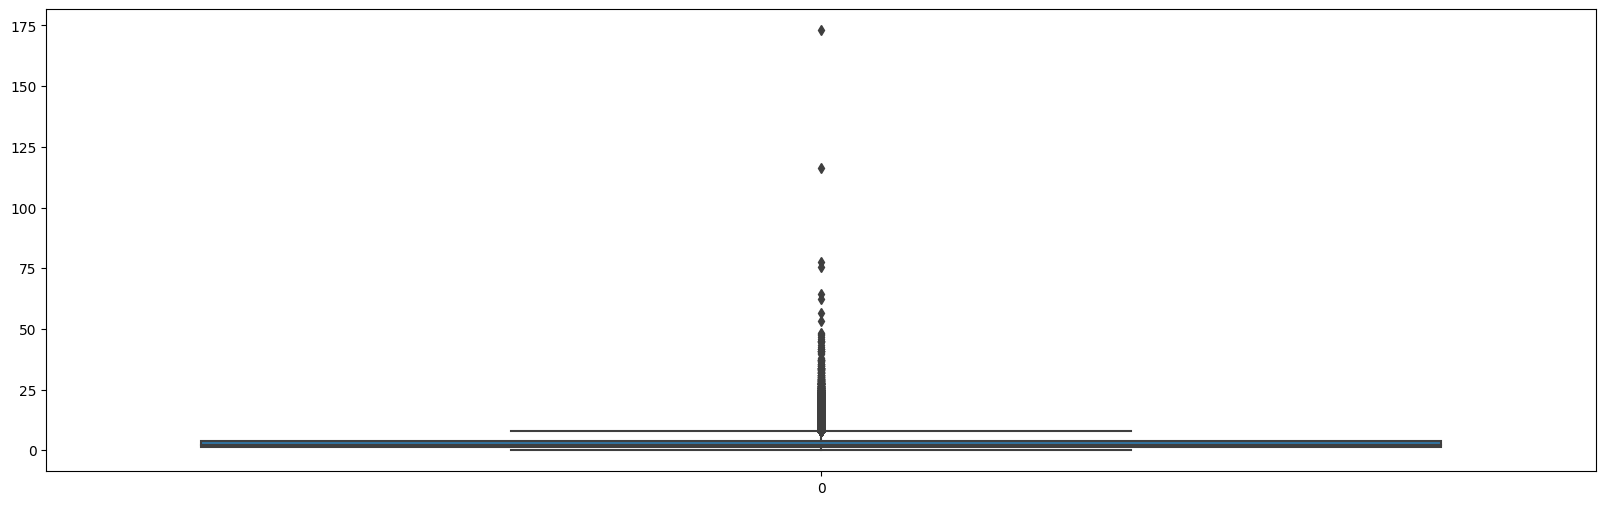

In [41]:
# Chart - 4 visualization code
plt.figure(figsize = (20,6))
sns.boxplot(df.distance)
plt.show()

In [42]:
df['distance'].mean()

3.433848324140452

In [43]:
print(f"There are {df.distance[df.distance == 0 ].count()} trip records with 0 distance.")

There are 633 trip records with 0 distance.


In [44]:
df[df.distance == 0 ].head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
246   id3487442          2 2016-02-29 18:39:12 2016-02-29 18:42:59   
291   id0924324          2 2016-05-10 18:07:52 2016-05-10 18:26:21   
407   id1145809          2 2016-05-16 23:15:13 2016-05-16 23:31:00   
702   id3499387          1 2016-01-25 19:45:12 2016-01-25 19:54:52   
1620  id0753277          1 2016-01-27 22:29:31 2016-01-27 22:29:58   

      passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
246               1.0        -73.981819        40.768963         -73.981819   
291               2.0        -73.959068        40.775661         -73.959068   
407               6.0        -73.808487        40.687336         -73.808487   
702               1.0        -73.786720        40.647041         -73.786720   
1620              1.0        -74.209854        40.816853         -74.209854   

      dropoff_latitude store_and_fwd_flag  trip_duration  distance  speed  \
246          40.768963                  N          227.0       0.0    0.0   
291          40.775661                  N         1109.0       0.0    0.0   
407          40.687336                  N          947.0       0.0    0.0   
702          40.647041                  N          580.0       0.0    0.0   
1620         40.816853                  N           27.0       0.0    0.0   

      weekday_num  month  pickup_hour  pickup_minute    weekday  
246             0      2           18             39     Monday  
291             1      5           18              7    Tuesday  
407             0      5           23             15     Monday  
702             0      1           19             45     Monday  
1620            2      1           22             29  Wednesday

In [45]:
df[df.distance == 0 ].describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  633.000000       633.000000        633.000000       633.000000   
mean     1.658768         1.739336        -73.950076        40.745135   
std      0.474498         1.391651          0.086459         0.050981   
min      1.000000         1.000000        -74.455559        40.585087   
25%      1.000000         1.000000        -73.988907        40.724426   
50%      2.000000         1.000000        -73.971405        40.750004   
75%      2.000000         2.000000        -73.941376        40.769566   
max      2.000000         6.000000        -73.334023        41.032238   

       dropoff_longitude  dropoff_latitude  trip_duration  distance  speed  \
count         633.000000        633.000000     633.000000     633.0  633.0   
mean          -73.950076         40.745135     618.080569       0.0    0.0   
std             0.086459          0.050981    3416.159257       0.0    0.0   
min           -74.455559         40.585087       2.000000       0.0    0.0   
25%           -73.988907         40.724426      40.000000       0.0    0.0   
50%           -73.971405         40.750004     341.000000       0.0    0.0   
75%           -73.941376         40.769566     707.000000       0.0    0.0   
max           -73.334023         41.032238   85333.000000       0.0    0.0   

       weekday_num       month  pickup_hour  pickup_minute  
count   633.000000  633.000000   633.000000     633.000000  
mean      2.954186    3.567141    13.785150      29.206951  
std       1.967968    1.751761     6.307367      17.601059  
min       0.000000    1.000000     0.000000       0.000000  
25%       1.000000    2.000000    10.000000      14.000000  
50%       3.000000    4.000000    15.000000      29.000000  
75%       5.000000    5.000000    19.000000      44.000000  
max       6.000000    6.000000    23.000000      59.000000

* 5897 trip record with distance equal to 0.

**Below are some possible explanation for such records.**

* Customer changed mind and cancelled the journey just after accepting it.

* Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.

* Issue with GPS tracker while the journey is being finished.

* Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start

* Or some other issue with the software itself which a technical guy can explain.

There is some serious inconsistencies in the data where drop off location is same as the pickup location.

We cant think off imputing the distance values considering a correlation with the duration

because the dropoff_location coordinates would not be inline with the distance otherwise.

We will look more to it in bivariate analysis with the Trip duration.

#### Chart - 5

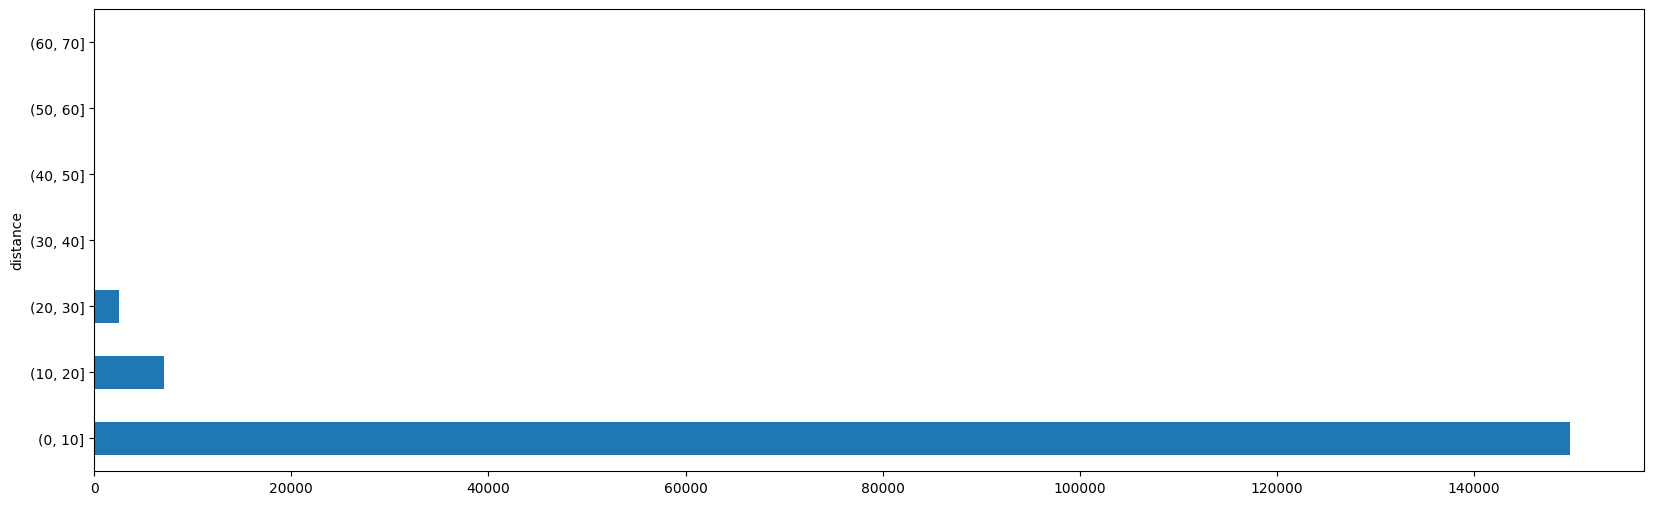

In [46]:
# Chart - 5 visualization code
df.distance.groupby(pd.cut(df.distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (20,6))
plt.show()

* From the above observation it is evident that most of the rides are completed between 1-10 km with some of the rides with distances between 10-30 km. Other slabs bar are not visible because the number of trips are very less as compared to these slabs

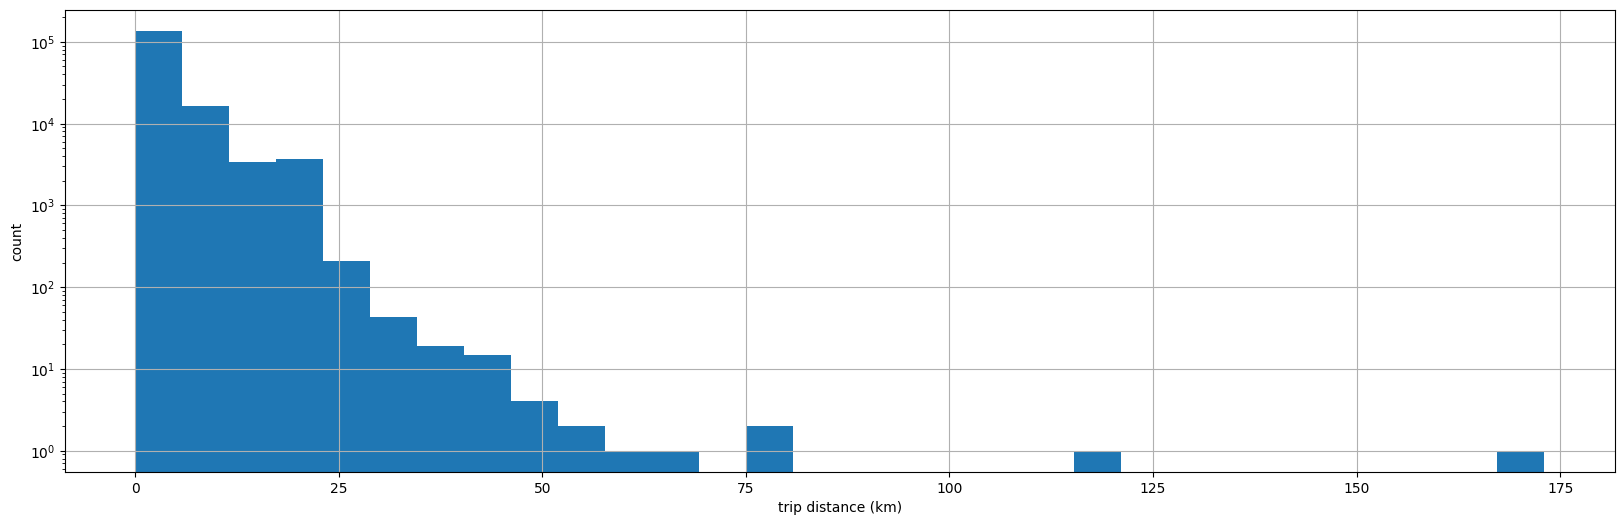

In [47]:
ax = df['distance'].hist(bins=30, figsize=(20,6))
ax.set_yscale('log')
ax.set_xlabel("trip distance (km)")
ax.set_ylabel("count")
plt.show()


* According to the dustribution of trip distances and the fact that it takes about 50 km to drive across the whole New York City, we decided to use 50 as the number to split the trips into short or long distance trips.

In [48]:
df_short = df[df.distance <= 50].count()
df_long = df[df.distance > 50].count()
print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total")

Short Trips: 160109 records in total.
Long Trips: 8 records in total


##### 1. Why did you pick the specific chart?

* Box plots, as previously mentioned, are used to represent the distribution of a set of values. They show the median, quartiles, and outliers of the data set, which can be useful for identifying patterns and potential anomalies. So we choose box plot for visualizing distance data.

* Histograms are a quick and easy way to get a sense of the distribution of your data and use the binned intervals from a histogram to create categorical features for a machine learning model.

##### 2. What is/are the insight(s) found from the chart?

* There are some trips with a distance of over 100 km.

* Some trips have a distance value of 0 km, while the average distance traveled is approximately 3.5 km.

* Also there are 1458556 records of Short Trips and 88 records of Long Trip.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding the average distance traveled, the company can optimize its pricing strategies by charging appropriately for longer trips.

#### Chart - 6

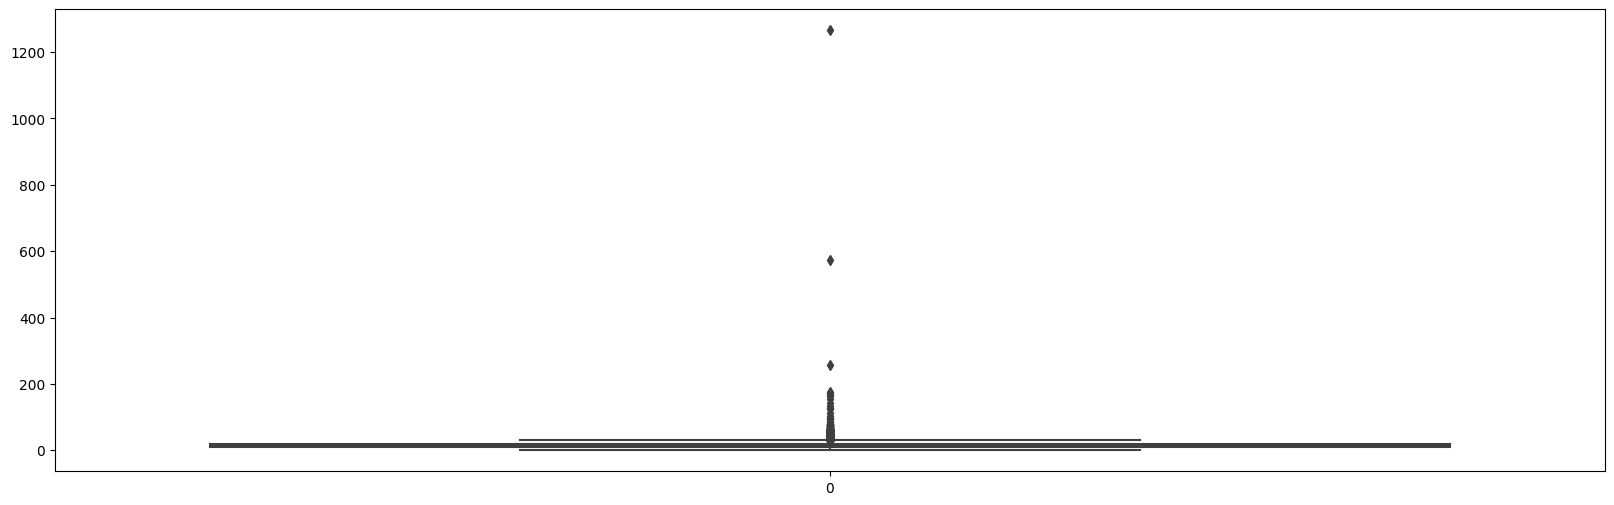

In [49]:
# Chart - 6 visualization code
plt.figure(figsize = (20,6))
sns.boxplot(df.speed)
plt.show()


* Many trips were done at a speed of over 200 kmph. Going SuperSonic..!!

* Let's remove them and focus on the trips which were done at less than 100kmph

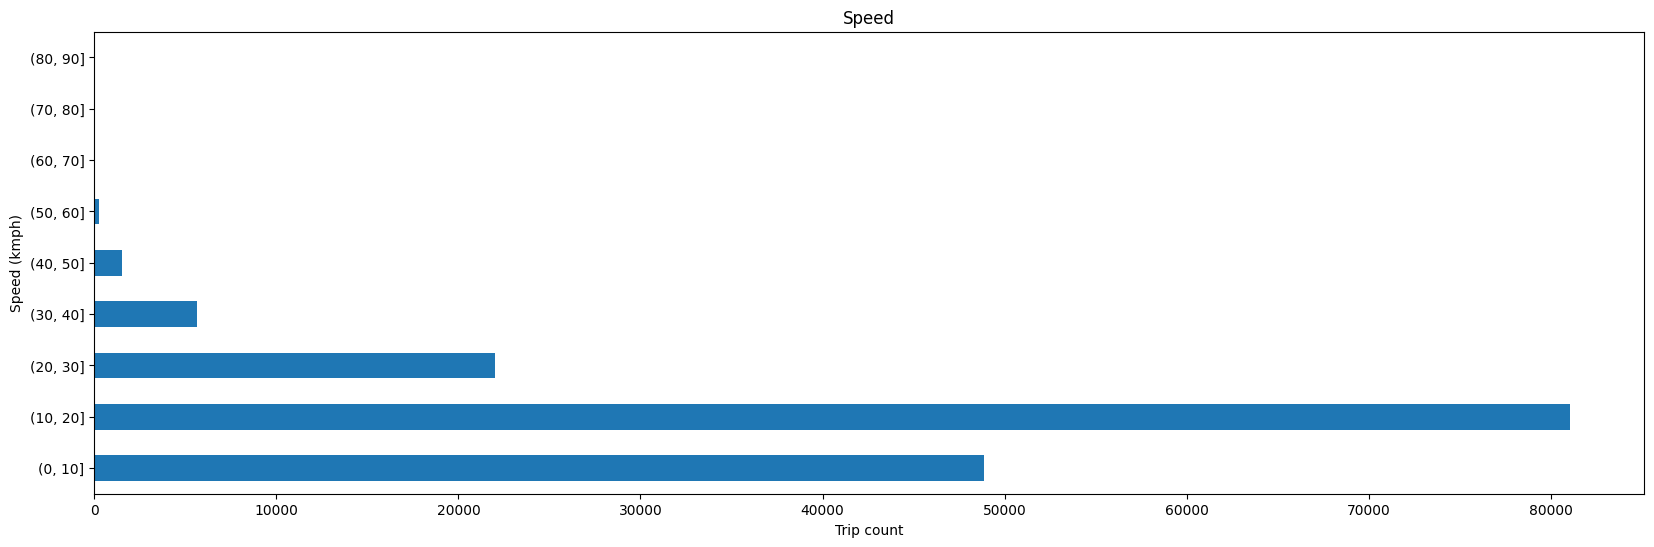

In [50]:
df = df[df.speed <= 100]
df.speed.groupby(pd.cut(df.speed, np.arange(0,100,10))).count().plot(kind = 'barh',figsize = (20,6))
plt.xlabel('Trip count')
plt.ylabel('Speed (kmph)')
plt.title('Speed')
plt.show()

* Trips over 30 kmph are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 100 kmph.

* Mostly trips are done at a speed range of 10-20kmph.

##### 1. Why did you pick the specific chart?

* It is a suitable choice for showing the distribution of a categorical variable, in this case the speed ranges of a vehicle.

* Bar plots are often used to compare the values of different categories, and the horizontal orientation in this case makes it easier to compare the trip counts for each speed range. Additionally, the use of a bar plot helps to visualize the distribution of the speeds, making it easier to see how many trips fall into each speed range.

##### 2. What is/are the insight(s) found from the chart?

* It is evident from this graph what we thought off i.e. most of the trips were done at a speed range of 10-20 kmph.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Are there any insights that lead to negative growth? Justify with specific reason.

* If there are any trips with abnormally high speeds, this could indicate a potential issue with the data or an error in recording the speed. This information could help to improve the accuracy of the data used for the prediction model.

* The speed distribution could give an idea of the average speed of vehicles in different regions or at different times of day, which could be useful in making predictions about trip times.

In [51]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              1.0        -73.982155        40.767937         -73.964630   
1              1.0        -73.980415        40.738564         -73.999481   
2              1.0        -73.979027        40.763939         -74.005333   
3              1.0        -74.010040        40.719971         -74.012268   
4              1.0        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  distance      speed  \
0         40.765602                  N          455.0  1.498523  11.856445   
1         40.731152                  N          663.0  1.805510   9.803672   
2         40.710087                  N         2124.0  6.385107  10.822216   
3         40.706718                  N          429.0  1.485500  12.465738   
4         40.782520                  N          435.0  1.188590   9.836608   

   weekday_num  month  pickup_hour  pickup_minute    weekday  
0            0      3           17             24     Monday  
1            6      6            0             43     Sunday  
2            1      1           11             35    Tuesday  
3            2      4           19             32  Wednesday  
4            5      3           13             30   Saturday

#### Chart - 7

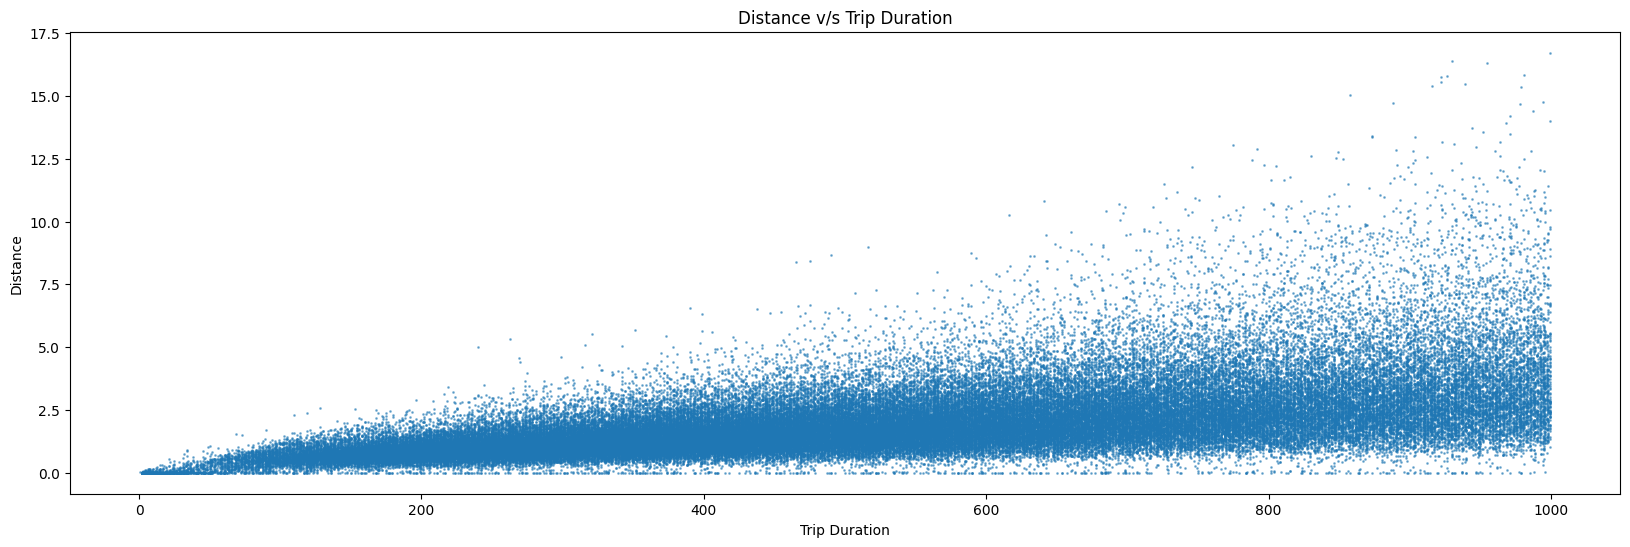

In [52]:
# Chart - 7 visualization code
plt.figure(figsize = (20,6))
dur_dist = df.loc[(df.distance < 50) & (df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked this specific chart because it displays the relationship between the distance covered by the trip and the trip duration. The scatter plot helps to visualize the distribution of the data points and highlight any patterns or trends that may exist between the two variables. This helps to gain insights about the relationship between distance and trip duration and whether there is any correlation between the two variables. The chart was generated after filtering the data to only include trips with a distance of less than 50 km and a trip duration of less than 1000 seconds, to eliminate any outliers that could distort the relationship between the two variables.

##### 2. What is/are the insight(s) found from the chart?

* The correlation between distance covered and trip duration should have been linear, but as seen in the chart, there is a cluster of trips in the lower right corner which indicate inconsistencies in the data.

* To make the data more consistent for predictive modeling, it would be appropriate to remove trips that covered no distance but lasted more than a minute.

* This can be assumed that these trips were cancelled after booking and thus should not have taken more than a minute.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from the correlation between distance and trip duration can help create a positive business impact by improving the accuracy of predictive models used to optimize operations and estimate costs. By removing trips that covered no distance but lasted more than a minute, the data will become more consistent and accurate, allowing for more reliable predictions and better decision making.

* There are no insights that lead to negative growth in this case. On the contrary, improving the quality of the data will likely lead to improved performance and growth.

#### Chart - 8

In [53]:
# Chart - 8 visualization code
df.corr()

vendor_id  passenger_count  pickup_longitude  \
vendor_id           1.000000         0.286349          0.017002   
passenger_count     0.286349         1.000000          0.003487   
pickup_longitude    0.017002         0.003487          1.000000   
pickup_latitude     0.005395        -0.004481         -0.130667   
dropoff_longitude   0.004403        -0.003536          0.283598   
dropoff_latitude    0.006653        -0.000064          0.051248   
trip_duration       0.033941         0.010904          0.075835   
distance            0.006067         0.008357          0.488839   
speed               0.001091        -0.000882          0.283332   
weekday_num         0.000535         0.025628         -0.029333   
month              -0.004303        -0.003964          0.007320   
pickup_hour         0.011364         0.008697          0.014947   
pickup_minute       0.001008        -0.002019         -0.006103   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
vendor_id                 0.005395           0.004403          0.006653   
passenger_count          -0.004481          -0.003536         -0.000064   
pickup_longitude         -0.130667           0.283598          0.051248   
pickup_latitude           1.000000           0.051432          0.425508   
dropoff_longitude         0.051432           1.000000          0.139505   
dropoff_latitude          0.425508           0.139505          1.000000   
trip_duration            -0.053731           0.046867         -0.034443   
distance                 -0.315800           0.352798         -0.135234   
speed                    -0.110567           0.272777          0.028380   
weekday_num              -0.031211          -0.005790         -0.023019   
month                    -0.004751           0.009380         -0.003716   
pickup_hour               0.014138          -0.036704          0.015526   
pickup_minute             0.001523          -0.005820          0.002652   

                   trip_duration  distance     speed  weekday_num     month  \
vendor_id               0.033941  0.006067  0.001091     0.000535 -0.004303   
passenger_count         0.010904  0.008357 -0.000882     0.025628 -0.003964   
pickup_longitude        0.075835  0.488839  0.283332    -0.029333  0.007320   
pickup_latitude        -0.053731 -0.315800 -0.110567    -0.031211 -0.004751   
dropoff_longitude       0.046867  0.352798  0.272777    -0.005790  0.009380   
dropoff_latitude       -0.034443 -0.135234  0.028380    -0.023019 -0.003716   
trip_duration           1.000000  0.168433 -0.051462    -0.006159  0.016527   
distance                0.168433  1.000000  0.554903     0.005765  0.013354   
speed                  -0.051462  0.554903  1.000000     0.066302 -0.035858   
weekday_num            -0.006159  0.005765  0.066302     1.000000 -0.018179   
month                   0.016527  0.013354 -0.035858    -0.018179  1.000000   
pickup_hour             0.005652 -0.014547 -0.101665    -0.085344 -0.001148   
pickup_minute          -0.006479 -0.009367 -0.001049     0.000479 -0.001394   

                   pickup_hour  pickup_minute  
vendor_id             0.011364       0.001008  
passenger_count       0.008697      -0.002019  
pickup_longitude      0.014947      -0.006103  
pickup_latitude       0.014138       0.001523  
dropoff_longitude    -0.036704      -0.005820  
dropoff_latitude      0.015526       0.002652  
trip_duration         0.005652      -0.006479  
distance             -0.014547      -0.009367  
speed                -0.101665      -0.001049  
weekday_num          -0.085344       0.000479  
month                -0.001148      -0.001394  
pickup_hour           1.000000      -0.002619  
pickup_minute        -0.002619       1.000000

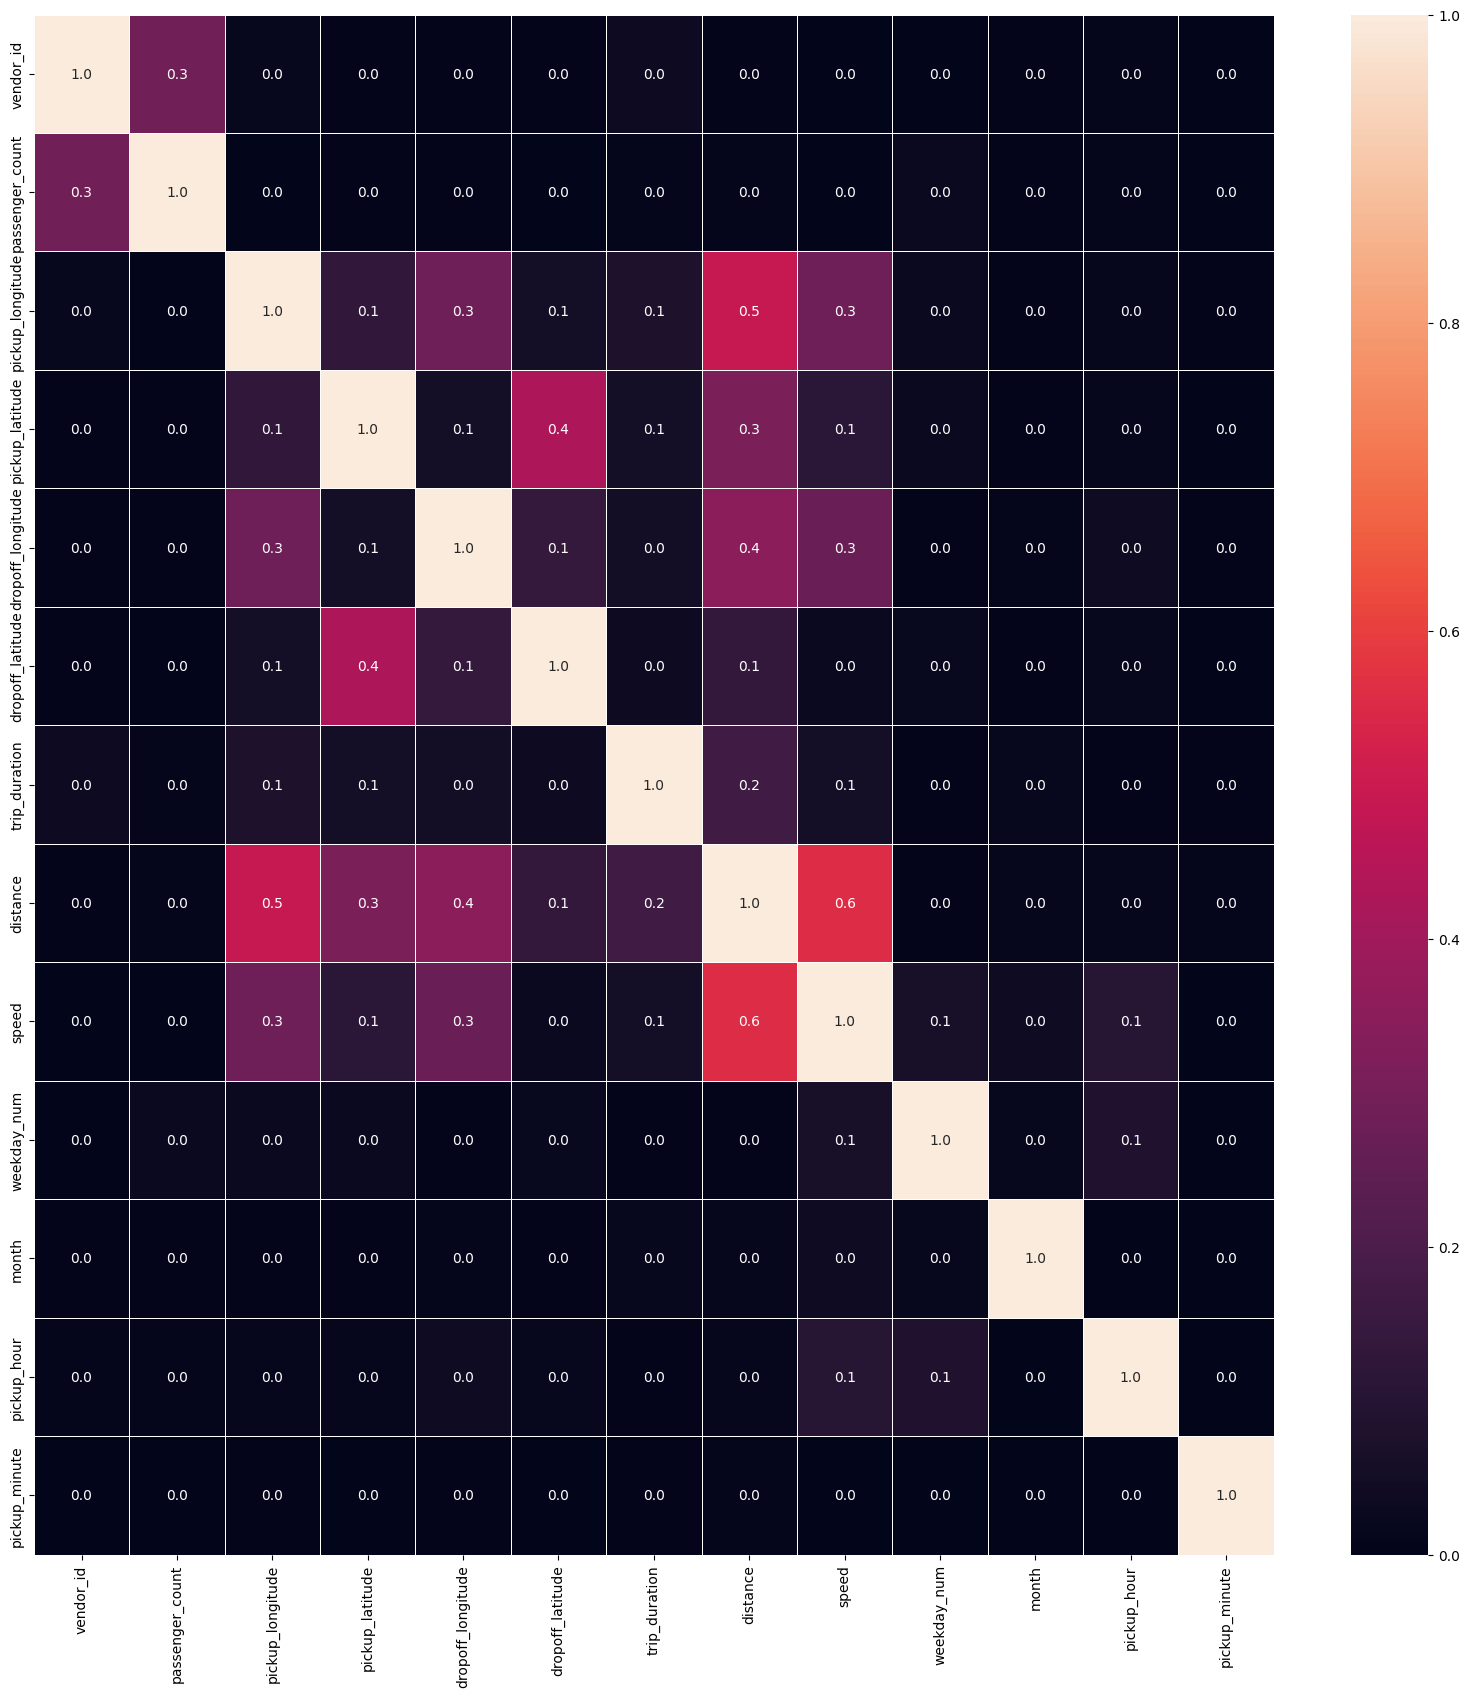

In [54]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(abs(round(df.corr(),3)), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

* The heatmap was picked because it provides a quick visual representation of the correlation between different variables in the dataset. Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together.

* The heatmap makes it easy to see the strength and direction of the relationship between the different variables, and can help identify which variables are highly correlated with each other and which are not.

##### 2. What is/are the insight(s) found from the chart?

* Passenger count and vendor ID has positive correaltion of 30%.

* Dropoff longitude and pickup longitude has strong positive correlation of 80%.

* Dropoff latitude and pickup latitude has moderate positive correaltion of 50%.

* Trip duration and pickup longitude has weak correlation of 3%.

* Trip duration and pickup latitude has weak negative correlation of 3%.

* Distance and pickup longitude has weak correlation of 30%.

* Speed has weak correaltion of 10-20% with both pickup and droppoff longitude.

* Speed and distance has strong positive correaltion of 60%.

* Trip duration is positively correlated with distance with 10% of correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: Weekends has more traffic as compared to week days.

Hypothesis 2: Traffic hours on weekdays are different than traffic hours on weekends.

Hypothesis 3: Passengers which are travelling at a time is changing with change in vendor.

### Hypothetical Statement - 1 Weekends has more traffic as compared to week days.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean of count of trips on weekday <= mean of mean of count of trips on weekend day

Alternate Hypothesis : mean of count of trips on weekday > mean of mean of count of trips on weekend day

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value

df['pickup_date'] =pd.to_datetime(df["pickup_datetime"]).dt.normalize()

In [56]:
dfweekday = pd.DataFrame(df.pickup_date.value_counts())
dfweekday.reset_index(inplace=True)
dfweekday.rename(columns={'index':'date','pickup_date':'count'},inplace=True)

dfweekday['pickup_weekday'] = dfweekday.apply(lambda row: row['date'].strftime("%A"),axis=1)

In [57]:
dfweekday.head()

date  count pickup_weekday
0 2016-04-09   1092       Saturday
1 2016-05-07   1062       Saturday
2 2016-04-16   1061       Saturday
3 2016-03-19   1047       Saturday
4 2016-04-15   1041         Friday

In [58]:
cnt = list(dfweekday['count'])
weekday = list(dfweekday['pickup_weekday'])

In [59]:
weekd = []
weekn = []
for i in range(len(cnt)):
  if weekday[i] in ['Saturday','Sunday']:
    weekn.append(cnt[i])
  else:
    weekd.append(cnt[i])

In [60]:
from scipy.stats import ttest_ind

def t_test(x,y,alternative='both-sided'):
        _, double_p = ttest_ind(x,y,equal_var = False)
        if alternative == 'both-sided':
            pval = double_p
        elif alternative == 'greater':
            if np.mean(x) > np.mean(y):
                 pval = double_p/2.
            else:
                 pval = 1.0 - double_p/2.
        elif alternative == 'less':
            if np.mean(x) < np.mean(y):
                 pval = double_p/2.
            else:
              pval = 1.0 - double_p/2.

        op = 'Hence we are failed to reject null hypothesis (H0) for significane level 0.05'
        if pval < 0.05:
          op = 'Hence we are rejecting null hypothesis (H0) for significane level 0.05 '
        return (f'P-Value: {pval}, {op}')

In [61]:
t_test(x=weekn,y=weekd,alternative='greater')

'P-Value: 0.5430251020723901, Hence we are failed to reject null hypothesis (H0) for significane level 0.05'

* Hypothesis 1 Conclusion: Number of trips on weekends are comparatively more than number of trips on weekdays.

##### Which statistical test have you done to obtain P-Value?

* The statistical test performed in the code is a two-sample t-test. The p-value is obtained using the ttest_ind function from the scipy.stats module.

* The function returns the p-value and a statement indicating whether or not the null hypothesis (the means of x and y are equal) can be rejected at a significance level of 0.05 based on the p-value.

##### Why did you choose the specific statistical test?

* The specific statistical test chosen is the two-sample t-test, which is appropriate for comparing the means of two independent datasets. The t-test is a commonly used test for comparing the means of two groups, especially when the sample size is small and the population standard deviation is unknown. The ttest_ind function from the scipy.stats module is used to perform the t-test in this code.

### Hypothetical Statement - 2 Traffic hours on weekdays are different than traffic hours on weekends.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Traffic hours on weekdays are same as traffic hours on weekends.

Alternate Hypothesis : Traffic hours on weekdays are different than traffic hours on weekends.

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value
dftraffic = df[['weekday','pickup_hour']]
weekd = []
for i in dftraffic['weekday']:
  if i in ['Saturday','Sunday']:
    weekd.append('Weekend')
  else:
    weekd.append('Weekday')
dftraffic['weekd'] = weekd


In [64]:
dftraffic.head()

weekday  pickup_hour    weekd
0     Monday           17  Weekday
1     Sunday            0  Weekend
2    Tuesday           11  Weekday
3  Wednesday           19  Weekday
4   Saturday           13  Weekend

In [65]:
new_df = pd.crosstab(dftraffic.pickup_hour,dftraffic.weekd)
new_df= pd.DataFrame(new_df)
new_df.reset_index(inplace=True)
new_df['Total'] = new_df['Weekday'] + new_df['Weekend']
new_df = new_df.iloc[0:24,:]
new_df.set_index('pickup_hour',inplace=True)
new_df.loc['Total'] = new_df.iloc[:, :].sum()

In [66]:
new_df

weekd        Weekday  Weekend   Total
pickup_hour                          
0               3185     2685    5870
1               1929     2212    4141
2               1225     1811    3036
3                883     1381    2264
4                818      946    1764
5               1258      472    1730
6               3185      510    3695
7               5434      727    6161
8               6125     1096    7221
9               5800     1571    7371
10              5264     1944    7208
11              5271     2283    7554
12              5561     2459    8020
13              5245     2405    7650
14              5815     2349    8164
15              5531     2383    7914
16              4820     2149    6969
17              6017     2466    8483
18              7450     2624   10074
19              7490     2531   10021
20              6915     2127    9042
21              7114     2236    9350
22              6705     2149    8854
23              5411     2136    7547
Total         114451    45652  160103

* As we are analysing two categorical variables, here We are going to use chi-squre test of independance.

In [67]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = new_df.index.unique()
columns = new_df.columns.unique()
for i in columns:
    for j in rows:
        O = new_df[i][j]
        E = new_df[i]['Total'] * new_df['Total'][j] / new_df['Total']['Total']
        chi_square += (O-E)**2/E

In [68]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 7799.369434896538  and p value is: 0.0
Null Hypothesis is rejected.


* Hypothesis 2 Conclusion: Traffic hours on weekdays are different than traffic hours on weekends.

##### Which statistical test have you done to obtain P-Value?

* The code performs a chi-square test of independence to obtain the p-value. The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. The p-value is a measure of the significance of the test, and a small p-value (less than the significance level, alpha) indicates that the association between the two variables is statistically significant and the null hypothesis (that the two variables are same) can be rejected.

##### Why did you choose the specific statistical test?

* The specific statistical test, the chi-square test of independence, was chosen because it is used to determine if there is a significant association between two categorical variables.

### Hypothetical Statement - 3 Passengers which are travelling at a time is changing with change in vendor.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : 'passenger_count' and 'vendor_id' has no relationship.

Alternate Hypothesis: 'passenger_count' and 'vendor_id' has relationship.

#### 2. Perform an appropriate statistical test.

In [69]:
# Perform Statistical Test to obtain P-Value

new = pd.crosstab(df.passenger_count,df.vendor_id)
new = pd.DataFrame(new)
new.reset_index(inplace=True)
new['Total'] = new[1] + new[2]
new = new.iloc[1:7,:]
new.set_index('passenger_count',inplace=True)
new.loc['Total'] = new.iloc[:, :].sum()

In [70]:
new

vendor_id            1      2   Total
passenger_count                      
1.0              60418  52955  113373
2.0              10219  13023   23242
3.0               2508   3989    6497
4.0               1337   1811    3148
5.0                 35   8616    8651
6.0                 17   5173    5190
Total            74534  85567  160101

In [71]:
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = new.index.unique()
columns = new.columns.unique()
for i in columns:
    for j in rows:
        O = new[i][j]
        E = new[i]['Total'] * new['Total'][j] / new['Total']['Total']
        chi_square += (O-E)**2/E


In [72]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 14179.330390608928  and p value is: 0.0
Null Hypothesis is rejected.


In [73]:
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 14179.330390608928  and critical value is: 21.02606981748307
Null Hypothesis is rejected.


* Hypothesis 3 Conclusion: Passenger count and vendor id has relationship

##### Which statistical test have you done to obtain P-Value?

* The statistical test performed to obtain the p-value is the Chi-Square Test of Independence.

##### Why did you choose the specific statistical test?

* The test works by comparing the observed frequencies in each category of the variables to the expected frequencies that would be seen if the variables were independent. The resulting Chi-Square statistic is used to calculate a p-value, which is used to make a decision about whether to reject or fail to reject the null hypothesis. In this case, the null hypothesis is that the two variables (passenger_count and vendor_id) are independent.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [74]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
speed                 0
weekday_num           0
month                 0
pickup_hour           0
pickup_minute         0
weekday               0
pickup_date           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* Our analysis revealed that there are no missing values, so no records need to be imputed. However, there are several outliers present in the Speed, Distance, and Trip Duration columns.

### 2. Handling Outliers

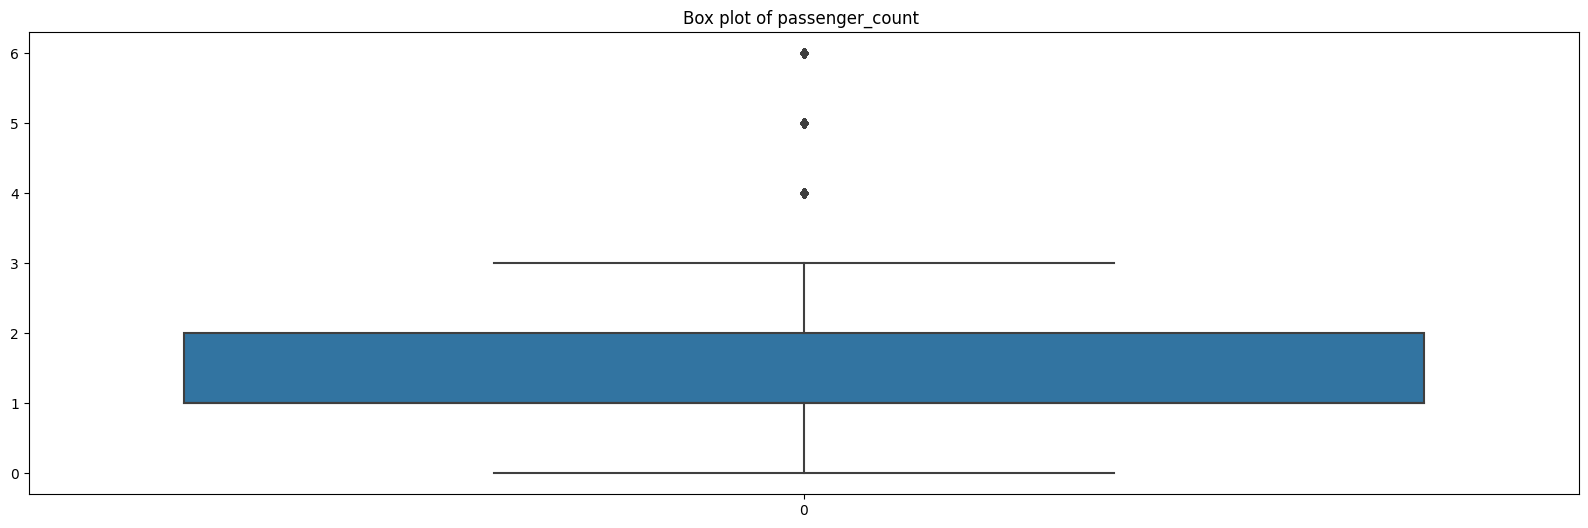

In [75]:
# Handling Outliers & Outlier treatments

plt.figure(figsize=(20,6))
plt.title("Box plot of passenger_count ")
ax = sns.boxplot(data=df['passenger_count'])

In [76]:
percentile_q1_passenger_count = np.percentile(df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(df['passenger_count'],75)
print(percentile_q3_passenger_count)


1.0
1.0
2.0


In [77]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [78]:
taxi_df=df[df['passenger_count'] > 0]

In [79]:
df=df[df['passenger_count'] < upper_limit_outlier_passenger_count]

In [80]:
df.shape

(143114, 19)

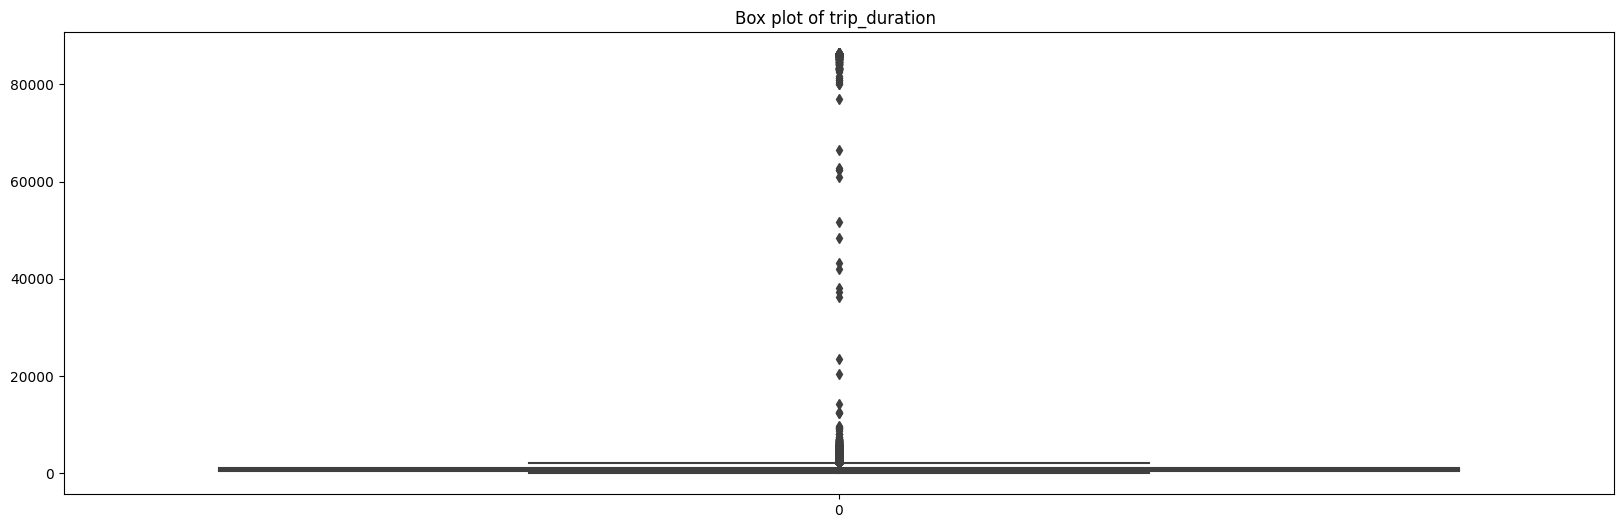

In [81]:
plt.figure(figsize=(20,6))
plt.title("Box plot of trip_duration ")
ax = sns.boxplot(data=taxi_df['trip_duration'], orient="v")


In [82]:
percentile_q1_trip_duration = np.percentile(taxi_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(taxi_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(taxi_df['trip_duration'],75)
print(percentile_q3_trip_duration)


395.0
662.0
1075.0


In [83]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)


lower limit for outlier  : -625.0
Upper limit for outlier  : 2095.0


In [84]:
df=df[df['trip_duration'] > 0]

In [85]:
df=df[df['trip_duration'] < upper_limit_outlier_trip_duration]

In [86]:
df.shape

(135848, 19)

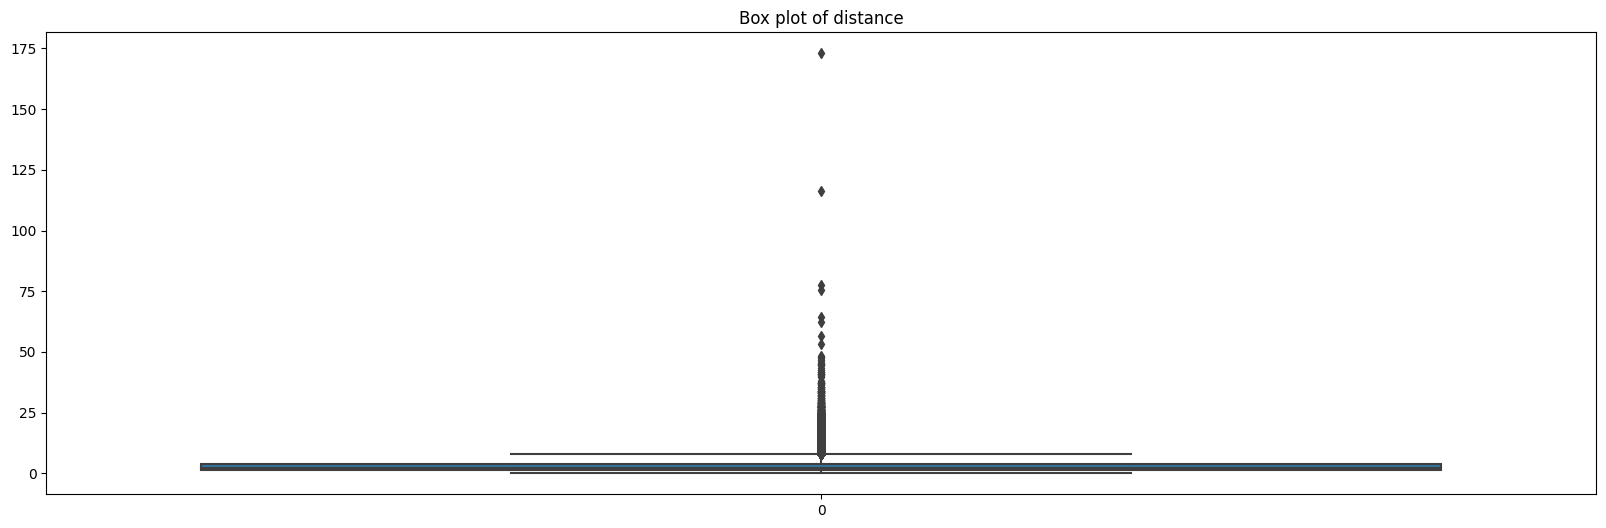

In [87]:
plt.figure(figsize=(20,6))
plt.title("Box plot of distance")
ax = sns.boxplot(data=taxi_df['distance'], orient="v")

In [88]:
percentile_q1 = np.percentile(taxi_df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(taxi_df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(taxi_df['distance'],75)
print(percentile_q3)

1.2350517373911645
2.094248889882868
3.870890738795672


In [89]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.7187067647155967
Upper limit for outlier  : 7.824649240902433


In [90]:

df=df[df['distance'] > lower_limit_outlier]


In [91]:
taxi_df=df[df['distance'] < upper_limit_outlier]

In [92]:
taxi_df.shape

(127557, 19)

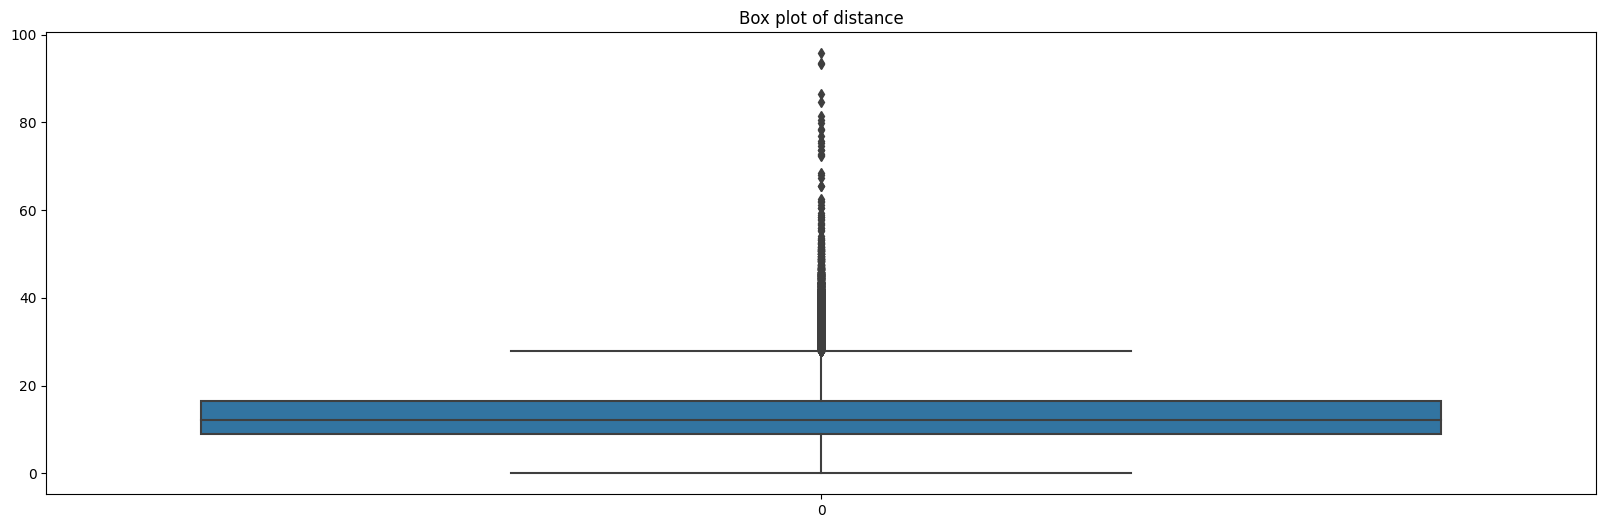

In [93]:
plt.figure(figsize=(20,6))
plt.title("Box plot of distance")
ax = sns.boxplot(data=taxi_df['speed'], orient="v")

In [94]:
percentile_q1 = np.percentile(taxi_df['speed'],25)
print(percentile_q1)
percentile_q2 = np.percentile(taxi_df['speed'],50)
print(percentile_q2)
percentile_q3 = np.percentile(taxi_df['speed'],75)
print(percentile_q3)

8.873939182038724
12.224822775742394
16.494439541976124


In [95]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.5568113578673763
Upper limit for outlier  : 27.925190081882224


In [96]:
taxi_df=taxi_df[taxi_df['speed'] > lower_limit_outlier]

In [97]:

taxi_df=taxi_df[taxi_df['speed'] < upper_limit_outlier]

In [98]:
taxi_df.shape

(123537, 19)

##### What all outlier treatment techniques have you used and why did you use those techniques?

* The outlier treatment technique used in the code is Interquartile range (IQR) method. The IQR method involves calculating the first quartile (25th percentile), second quartile (50th percentile), and third quartile (75th percentile) of the variable. The interquartile range (IQR) is calculated by subtracting the first quartile from the third quartile. Then, lower and upper bounds for outliers are defined as 1.5 times the IQR below the first quartile and 1.5 times the IQR above the third quartile respectively. Finally, the data is filtered by removing all the observations that are below the lower limit or above the upper limit, as they are considered outliers.

* This technique was used because it is a commonly used method to identify and handle outliers, as it is based on the distribution of the data and it eliminates outliers that are beyond the range of normal values in the dataset.

### 3. Categorical Encoding

In [99]:
# Encode your categorical columns
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'speed', 'weekday_num', 'month',
       'pickup_hour', 'pickup_minute', 'weekday', 'pickup_date'],
      dtype='object')

In [111]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
new_df= pd.get_dummies(taxi_df, columns=['store_and_fwd_flag','passenger_count','vendor_id'],prefix=['flag','passenger_count','vendor_id'])


In [112]:
new_df.head()

id     pickup_datetime    dropoff_datetime  pickup_longitude  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30        -73.982155   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38        -73.980415   
3  id3504673 2016-04-06 19:32:31 2016-04-06 19:39:40        -74.010040   
4  id2181028 2016-03-26 13:30:55 2016-03-26 13:38:10        -73.973053   
7  id1324603 2016-05-21 07:54:58 2016-05-21 08:20:49        -73.969276   

   pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
0        40.767937         -73.964630         40.765602          455.0   
1        40.738564         -73.999481         40.731152          663.0   
3        40.719971         -74.012268         40.706718          429.0   
4        40.793209         -73.972923         40.782520          435.0   
7        40.797779         -73.922470         40.760559         1551.0   

   distance      speed  ...    weekday  pickup_date  flag_N  flag_Y  \
0  1.498523  11.856445  ...     Monday   2016-03-14       1       0   
1  1.805510   9.803672  ...     Sunday   2016-06-12       1       0   
3  1.485500  12.465738  ...  Wednesday   2016-04-06       1       0   
4  1.188590   9.836608  ...   Saturday   2016-03-26       1       0   
7  5.714989  13.264964  ...   Saturday   2016-05-21       1       0   

  passenger_count_0.0 passenger_count_1.0  passenger_count_2.0  \
0                   0                   1                    0   
1                   0                   1                    0   
3                   0                   1                    0   
4                   0                   1                    0   
7                   0                   1                    0   

   passenger_count_3.0  vendor_id_1  vendor_id_2  
0                    0            0            1  
1                    0            1            0  
3                    0            0            1  
4                    0            0            1  
7                    0            0            1  

[5 rows x 24 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

* The categorical encoding technique used here is one-hot encoding, which is also known as dummy encoding. The reason for using this technique is that categorical variables are usually non-numeric, but machine learning algorithms require input to be in a numerical format.

* One-hot encoding transforms each categorical value into a new categorical value and assigns a binary value of 1 or 0. It creates a new column for each unique category value, where the value in the column is 1 if the category is present in the original data and 0 otherwise. This is useful for handling categorical data in a machine learning model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

* From above columns we have already created distance column by using pickup and dropoff lattitudes and longitudes.

* We have already created speed column by using distance and trip duration.

* By extracting, we have created pickup weekday, month, weekday num, pickup hour, pickup minute column from date time columns

* Now we will create one more feature i.e. trip direction using latitudes and longitudes.

In [102]:
# Manipulate Features to minimize feature correlation and create new features
import math
"Creating a function to get the bearing"
def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    if brng < 0:
      brng = 360 + brng
      return brng
    else:
      return brng

In [113]:
new_df['trip_direction'] = df.apply(lambda x: get_bearing(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)

In [114]:
new_df.head()

id     pickup_datetime    dropoff_datetime  pickup_longitude  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30        -73.982155   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38        -73.980415   
3  id3504673 2016-04-06 19:32:31 2016-04-06 19:39:40        -74.010040   
4  id2181028 2016-03-26 13:30:55 2016-03-26 13:38:10        -73.973053   
7  id1324603 2016-05-21 07:54:58 2016-05-21 08:20:49        -73.969276   

   pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
0        40.767937         -73.964630         40.765602          455.0   
1        40.738564         -73.999481         40.731152          663.0   
3        40.719971         -74.012268         40.706718          429.0   
4        40.793209         -73.972923         40.782520          435.0   
7        40.797779         -73.922470         40.760559         1551.0   

   distance      speed  ...  pickup_date  flag_N  flag_Y  passenger_count_0.0  \
0  1.498523  11.856445  ...   2016-03-14       1       0                    0   
1  1.805510   9.803672  ...   2016-06-12       1       0                    0   
3  1.485500  12.465738  ...   2016-04-06       1       0                    0   
4  1.188590   9.836608  ...   2016-03-26       1       0                    0   
7  5.714989  13.264964  ...   2016-05-21       1       0                    0   

  passenger_count_1.0 passenger_count_2.0  passenger_count_3.0  vendor_id_1  \
0                   1                   0                    0            0   
1                   1                   0                    0            1   
3                   1                   0                    0            0   
4                   1                   0                    0            0   
7                   1                   0                    0            0   

   vendor_id_2  trip_direction  
0            1       99.970196  
1            0      242.846232  
3            1      187.262300  
4            1      179.473585  
7            1      136.385396  

[5 rows x 25 columns]

#### 2. Feature Selection

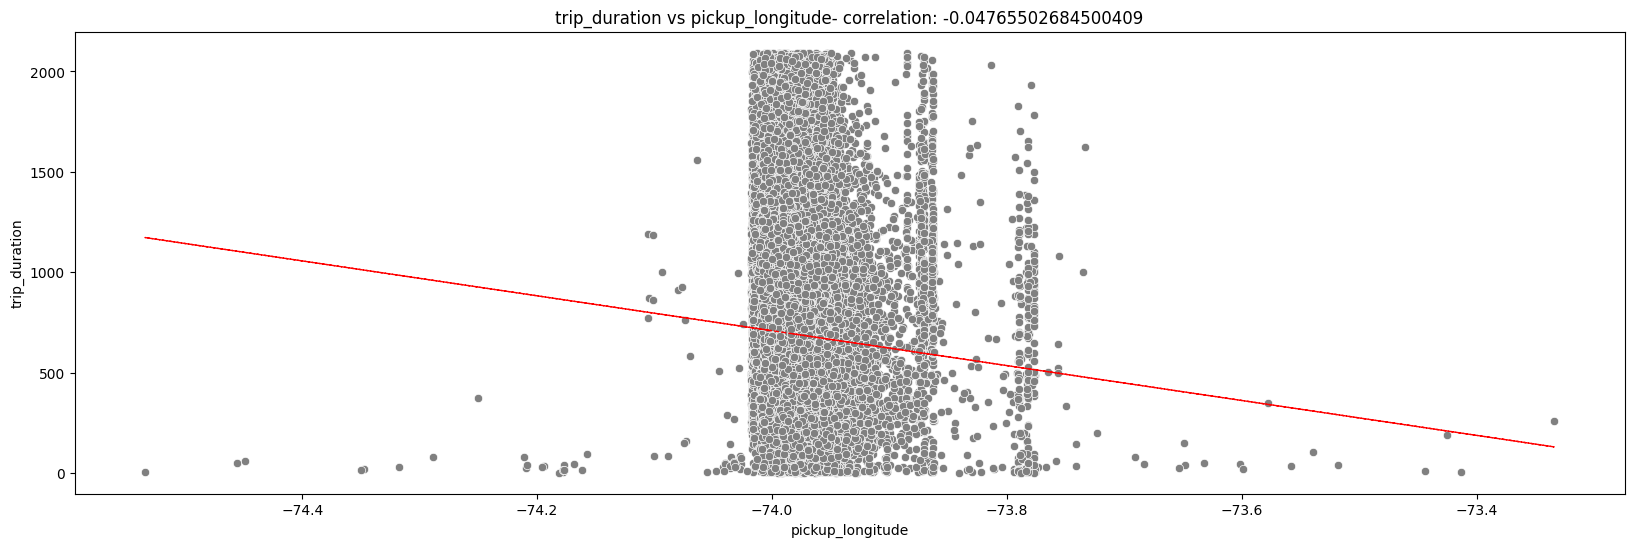

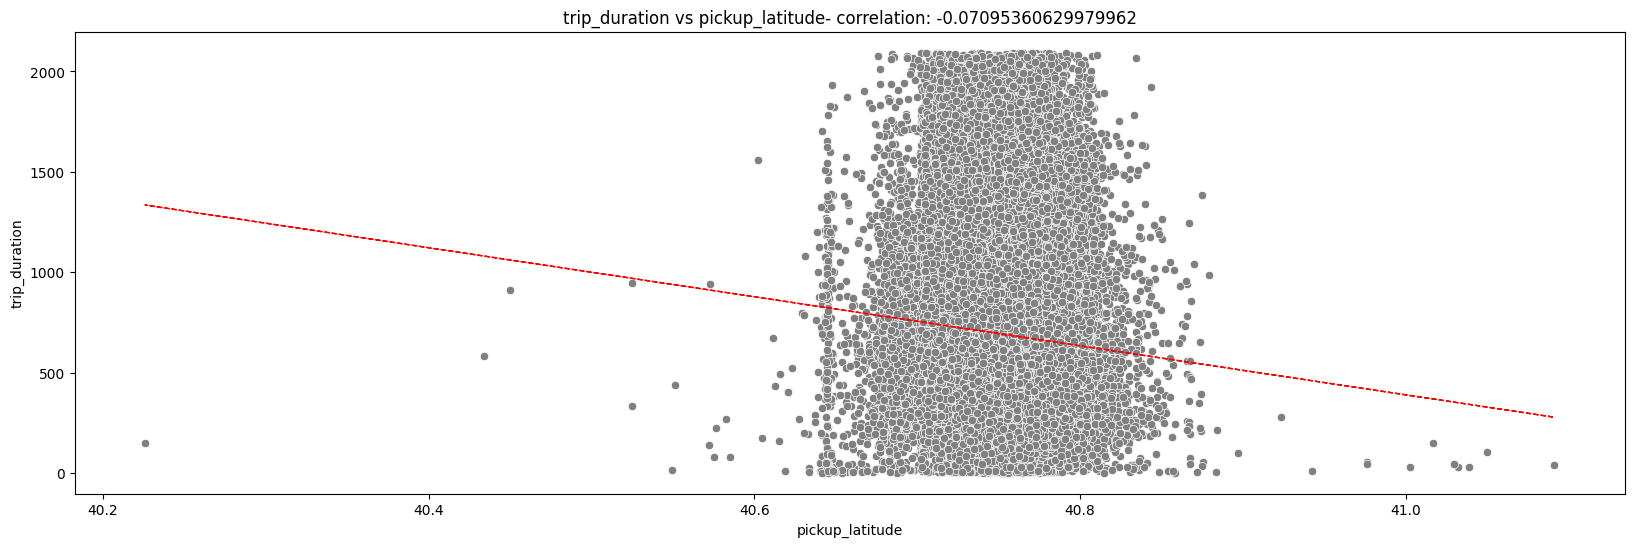

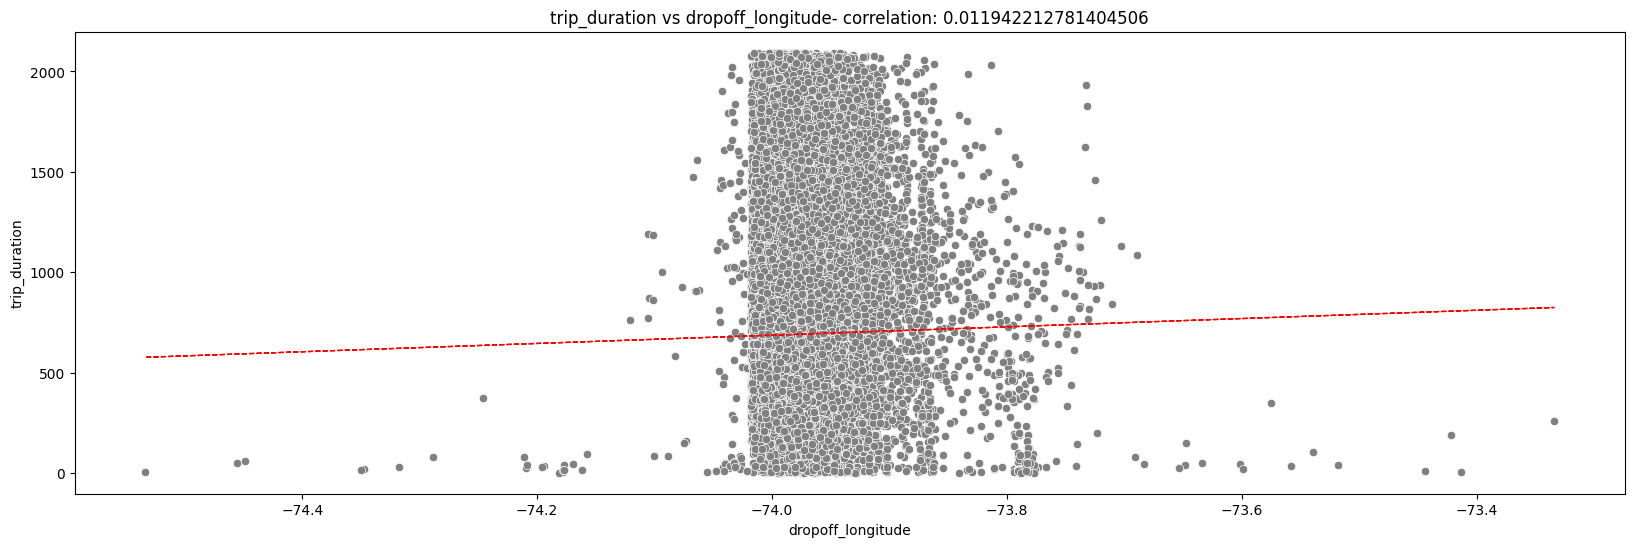

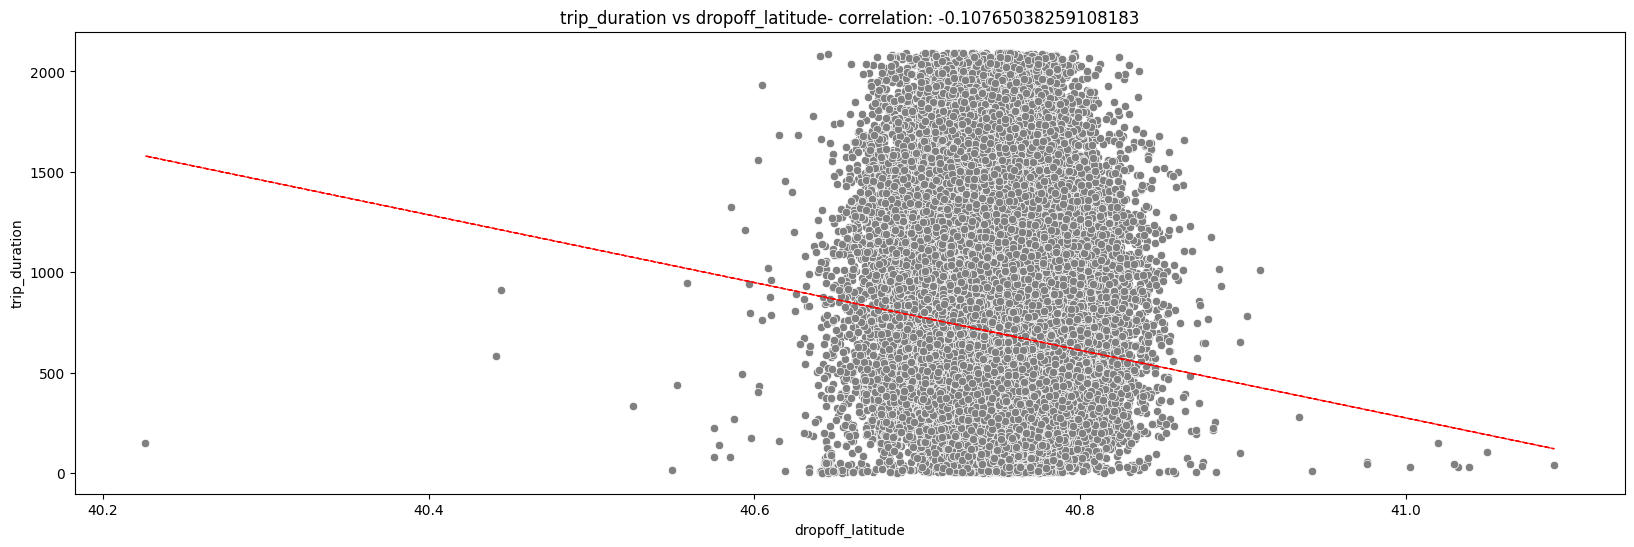

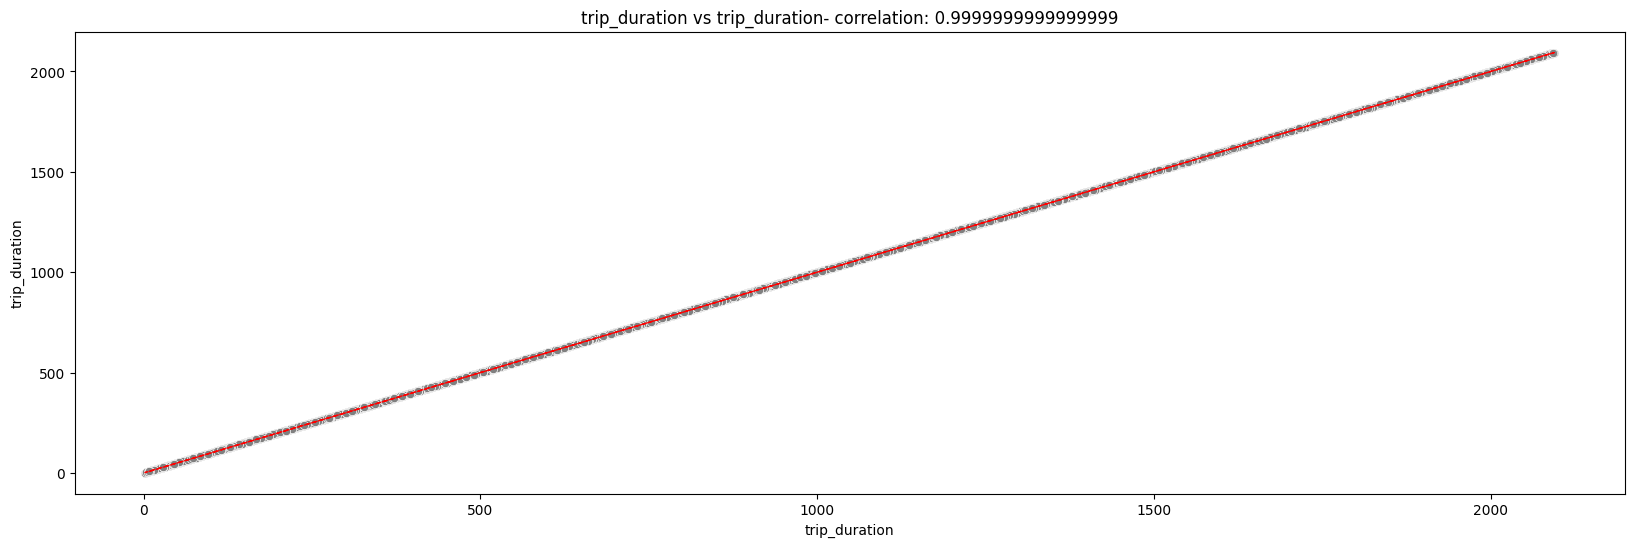

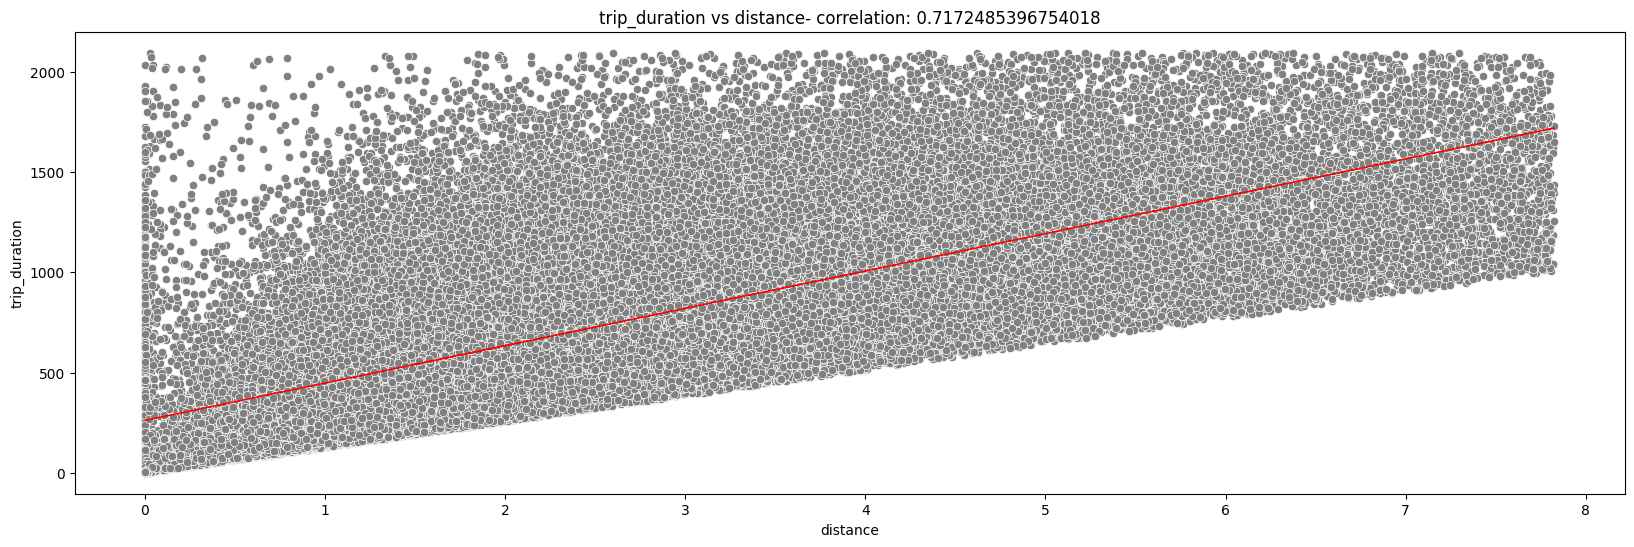

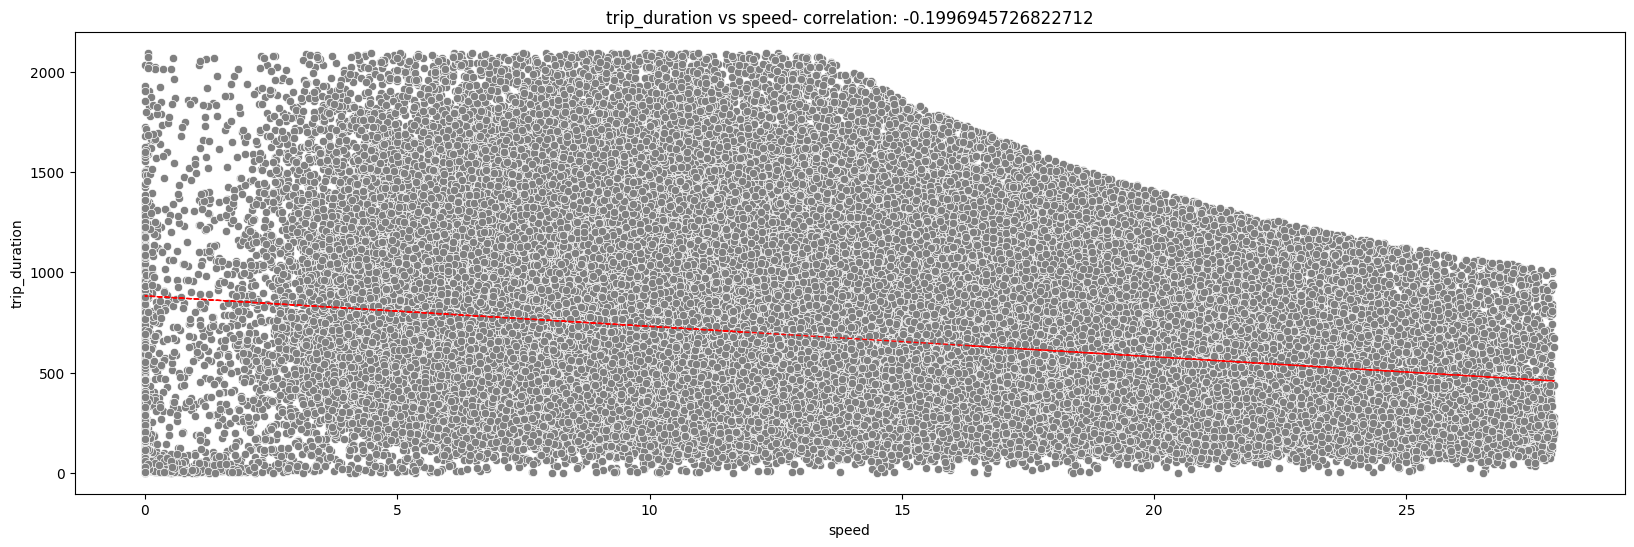

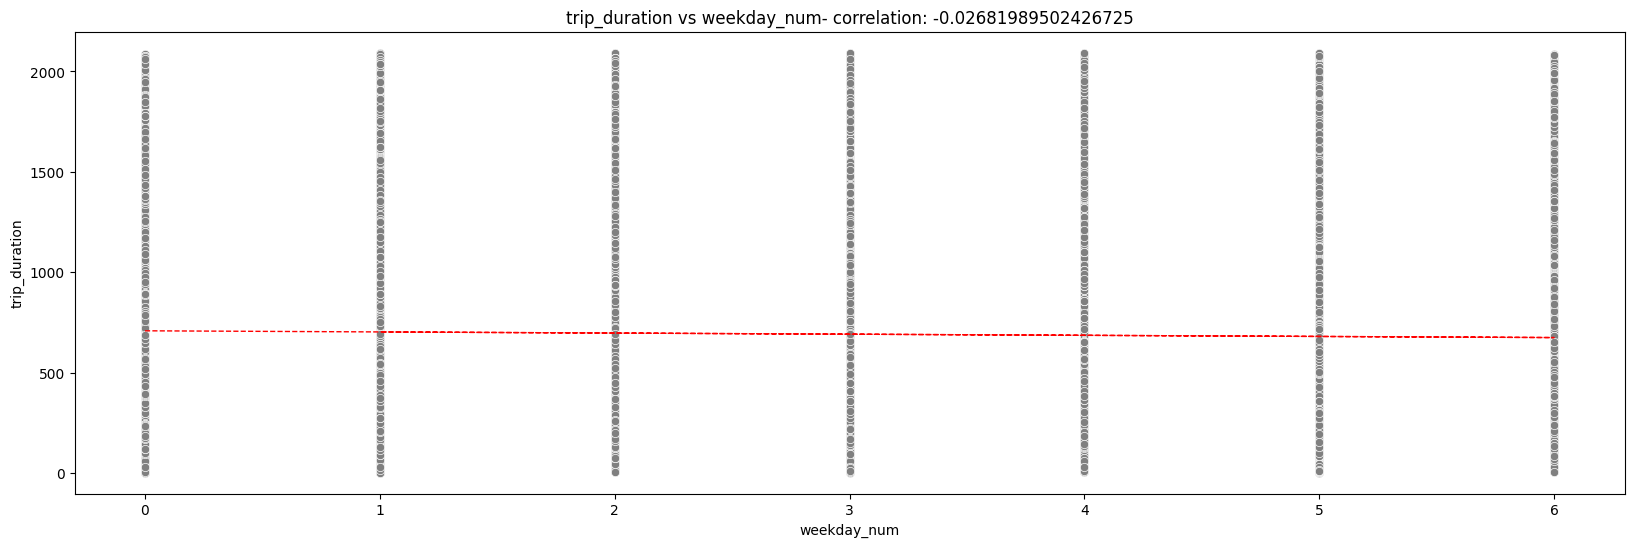

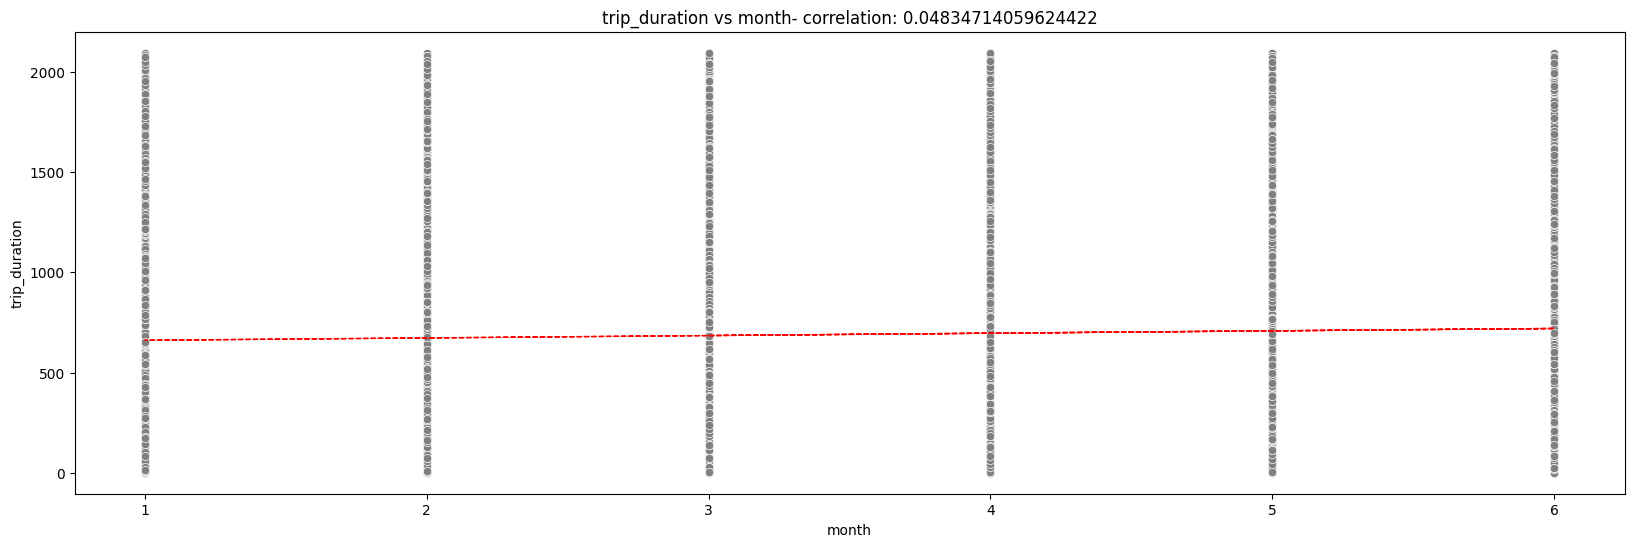

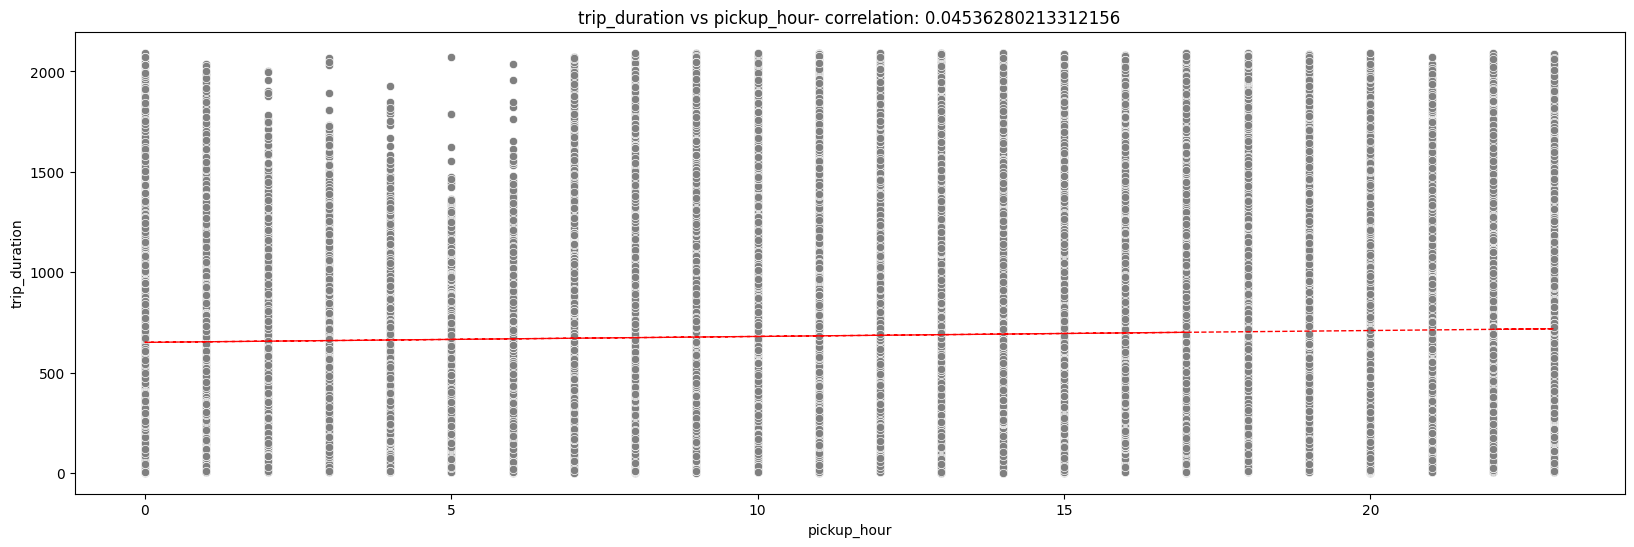

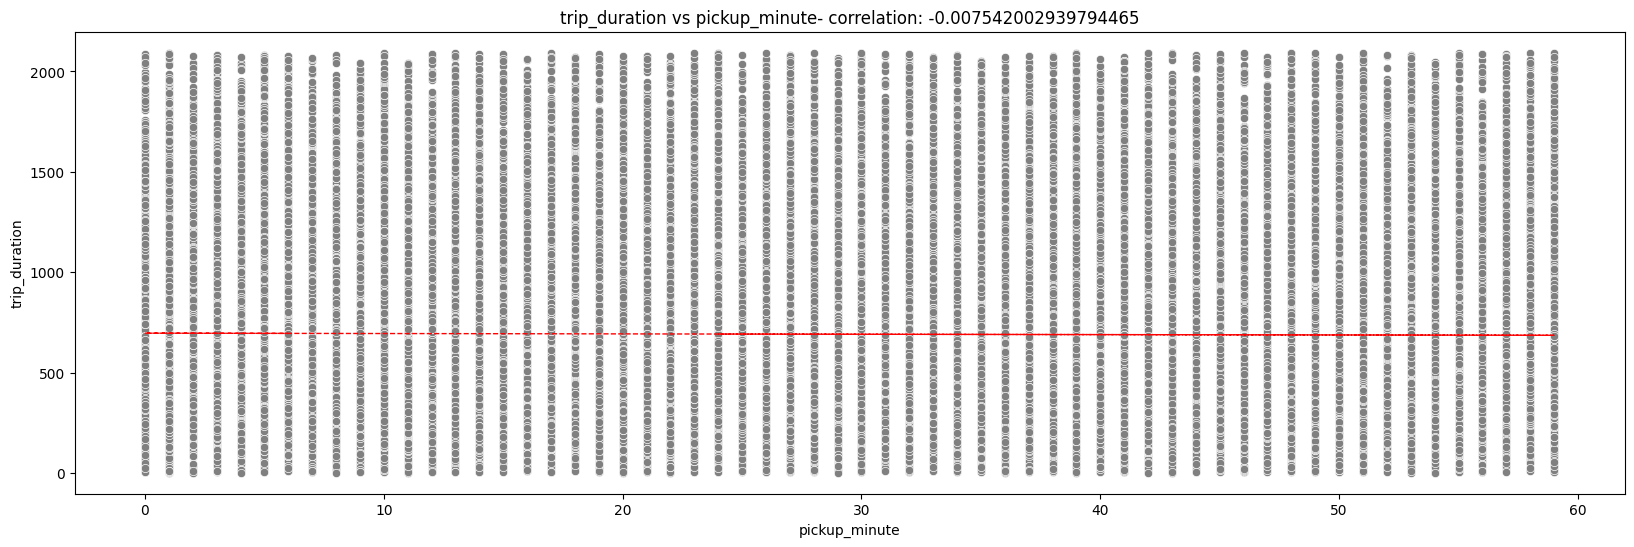

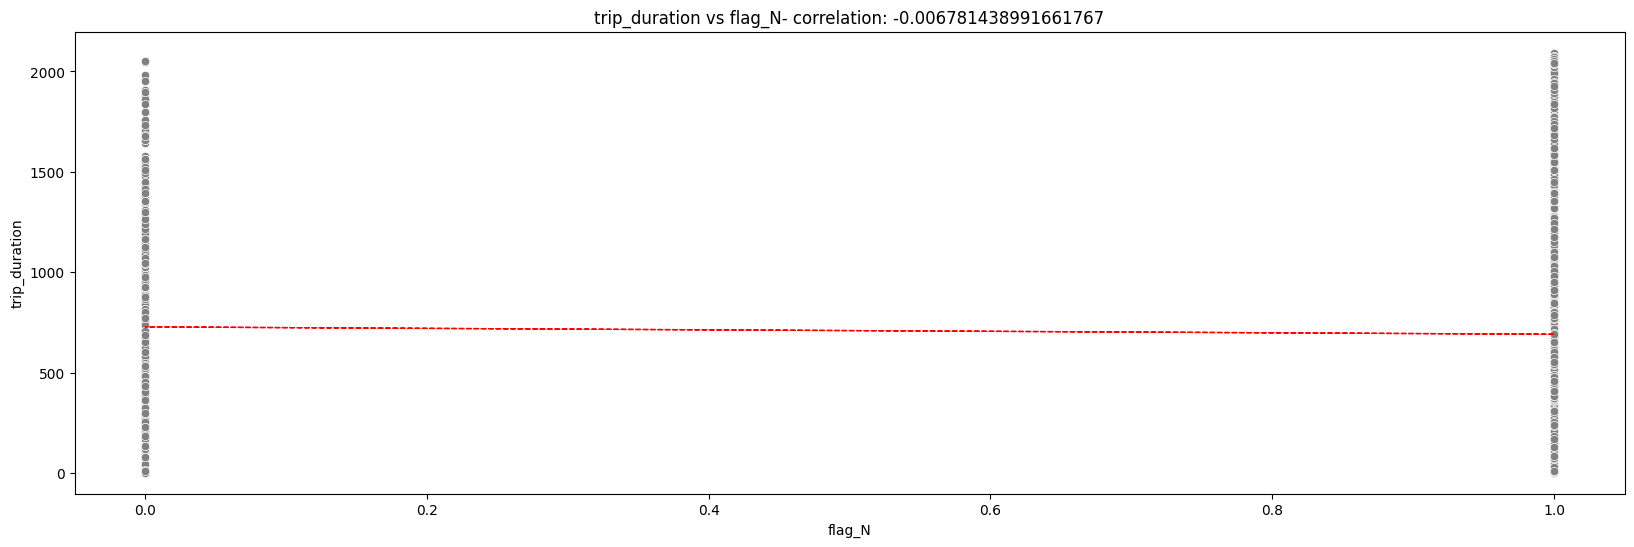

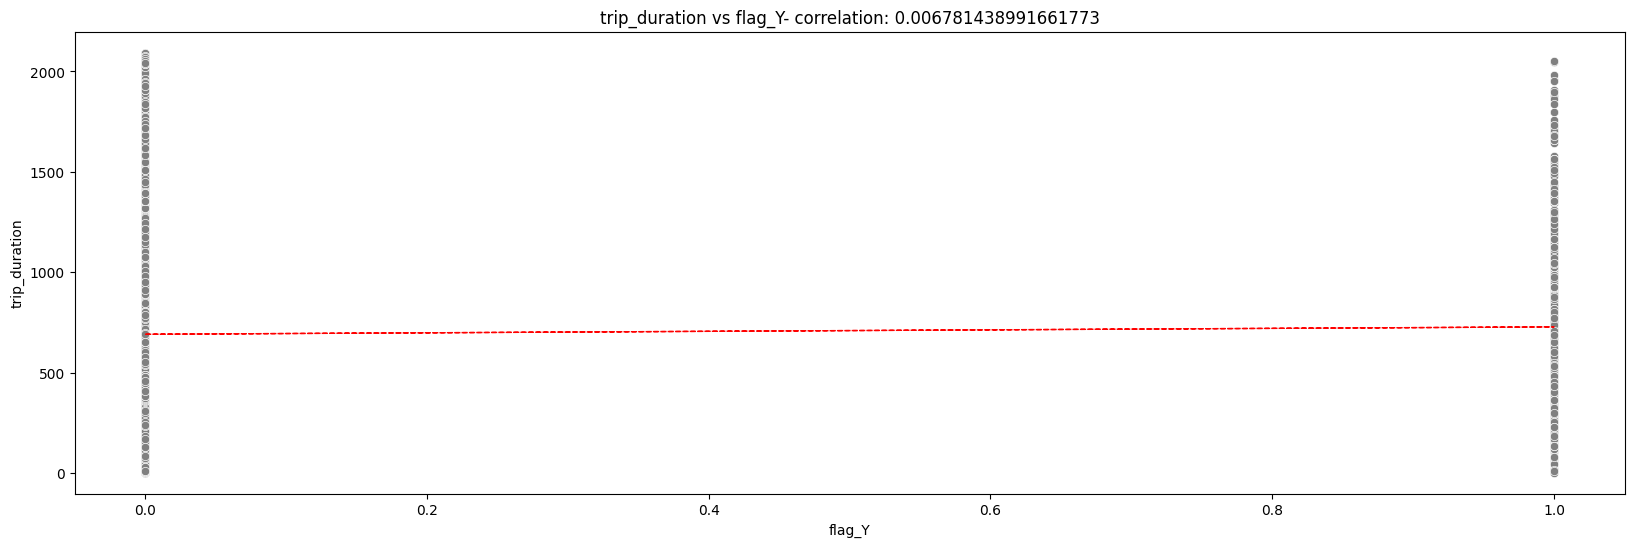

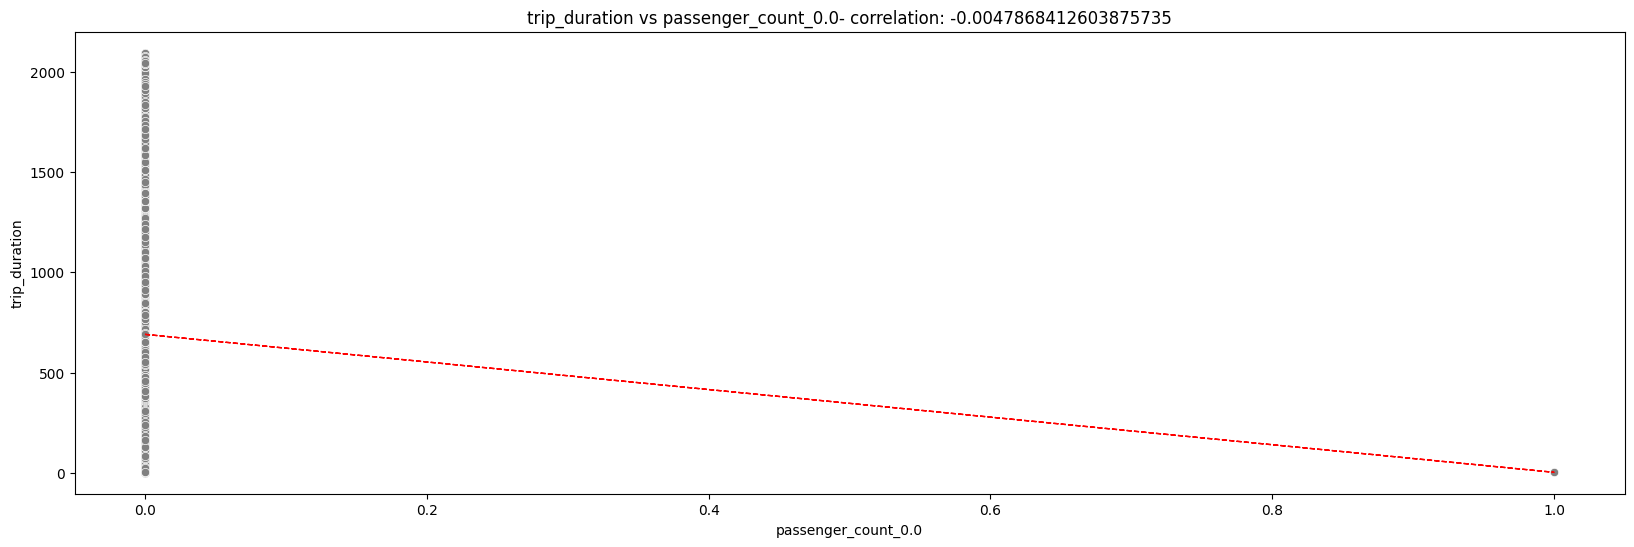

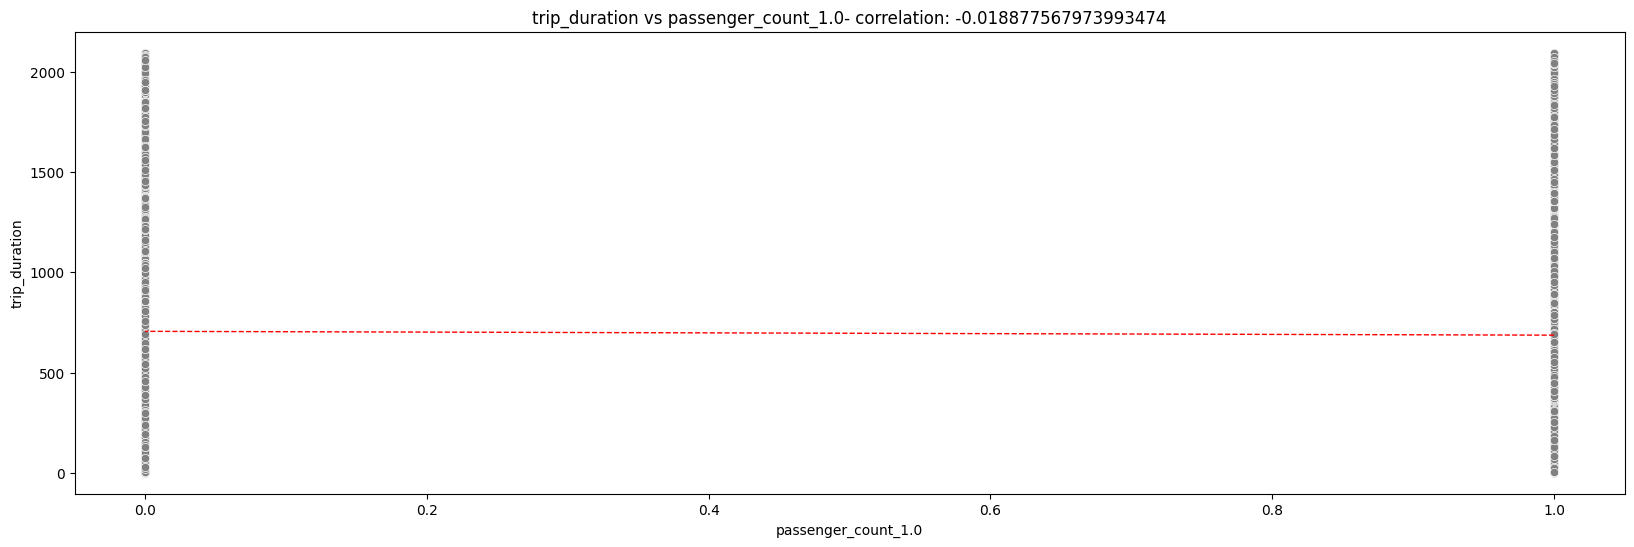

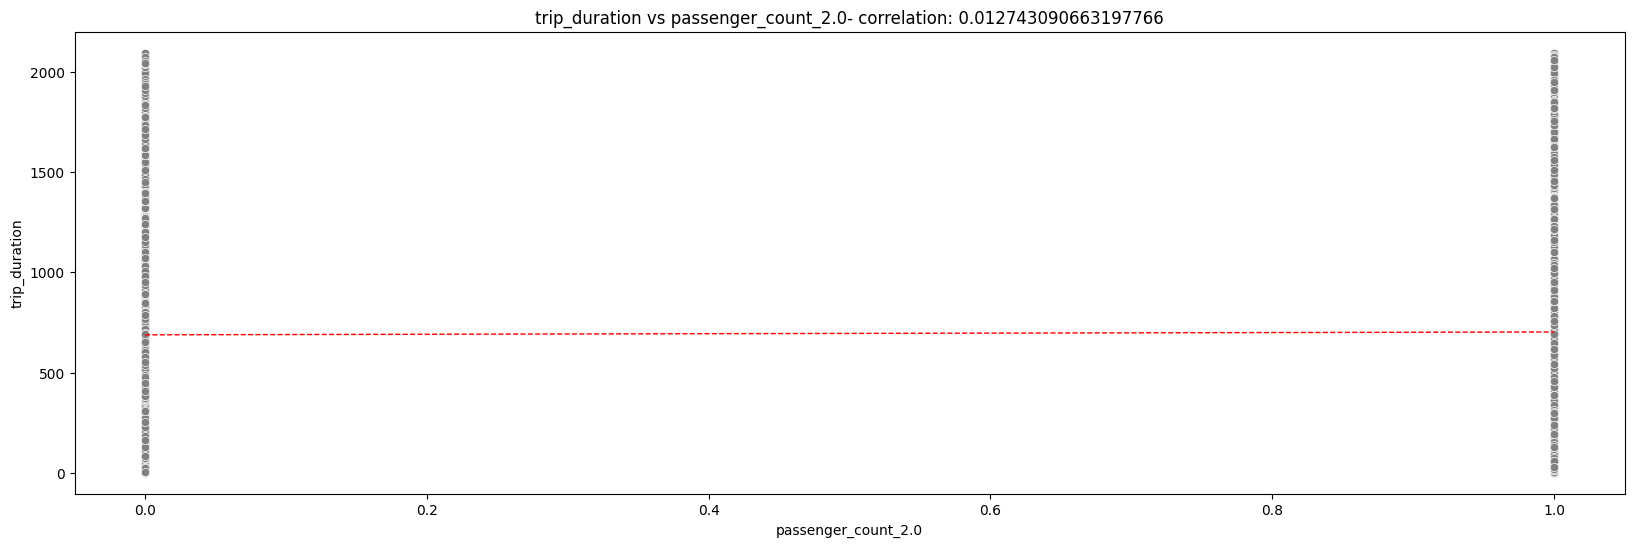

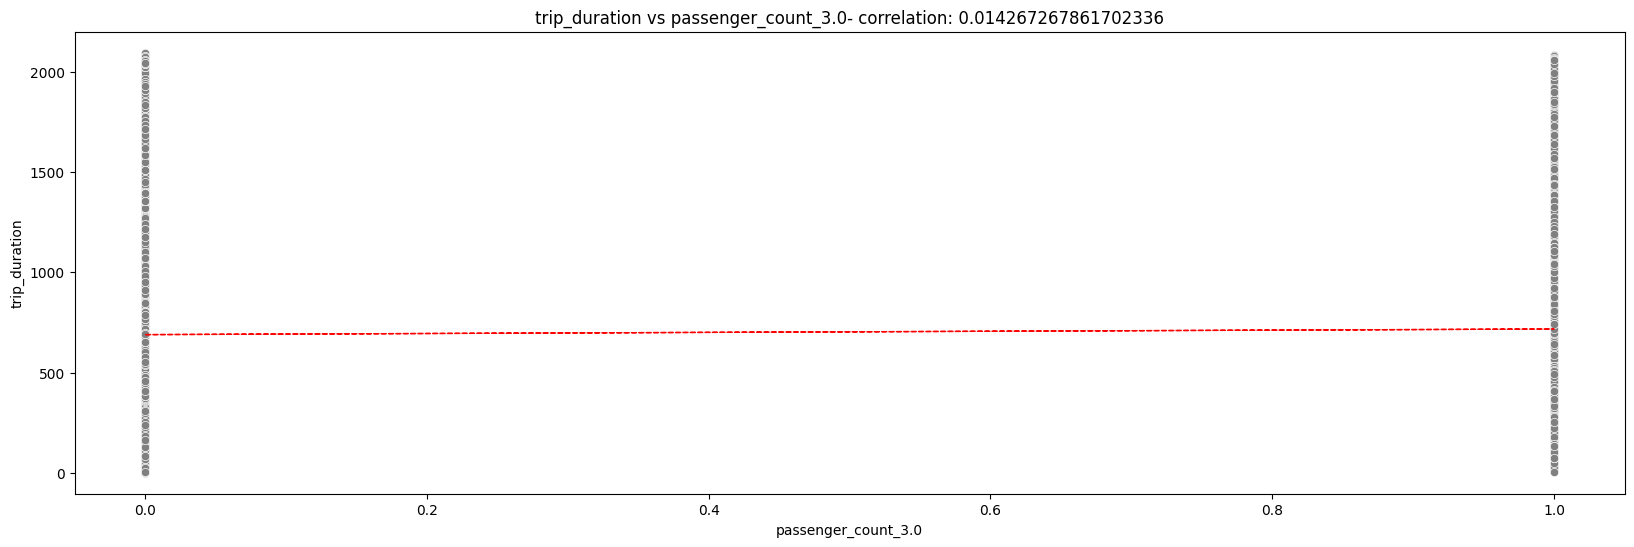

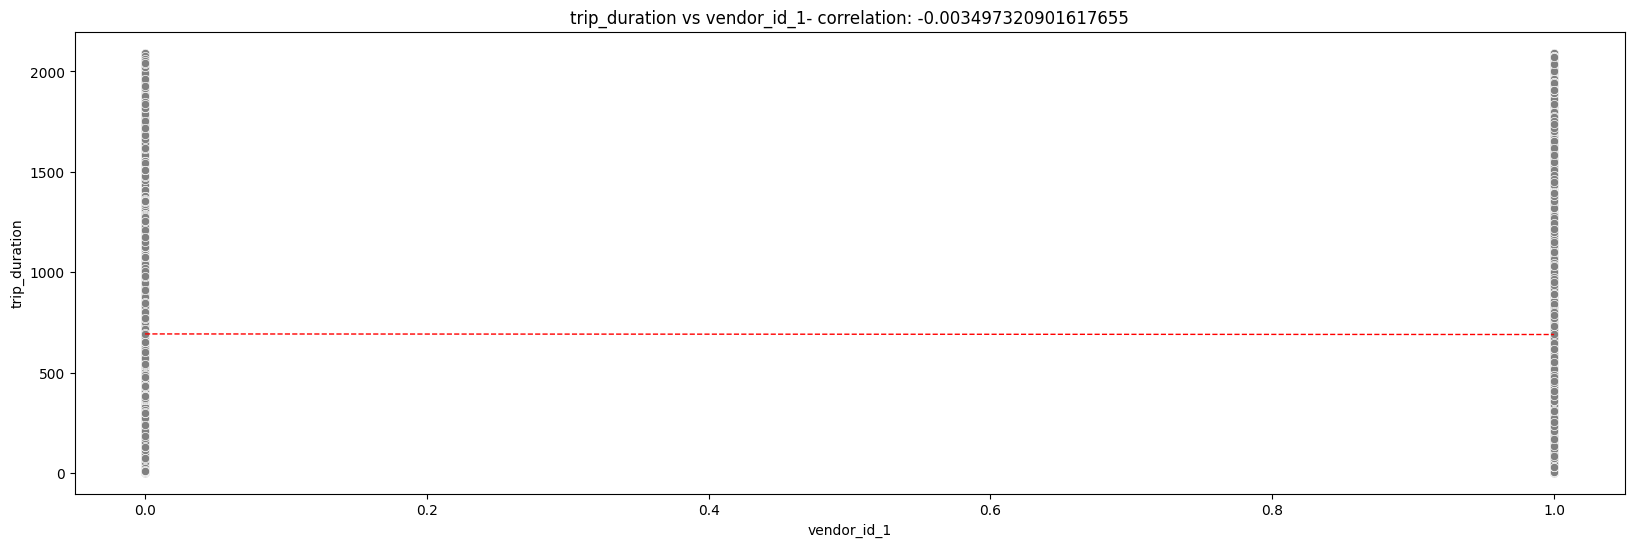

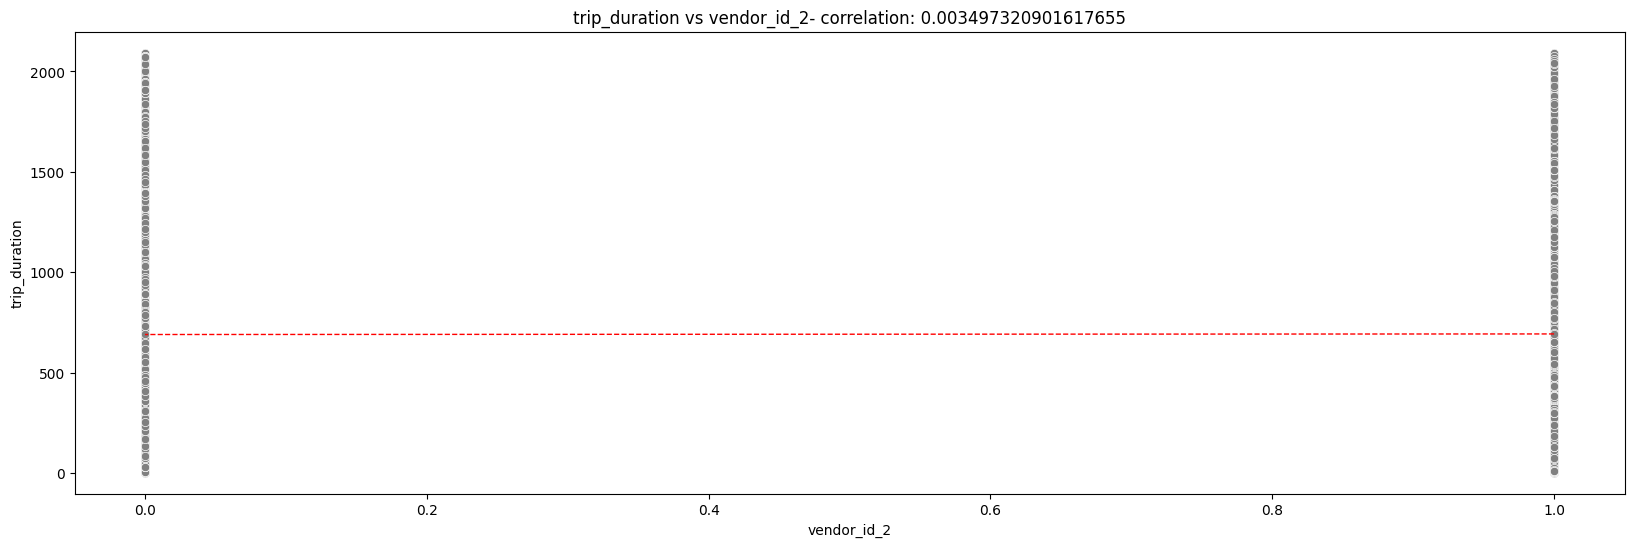

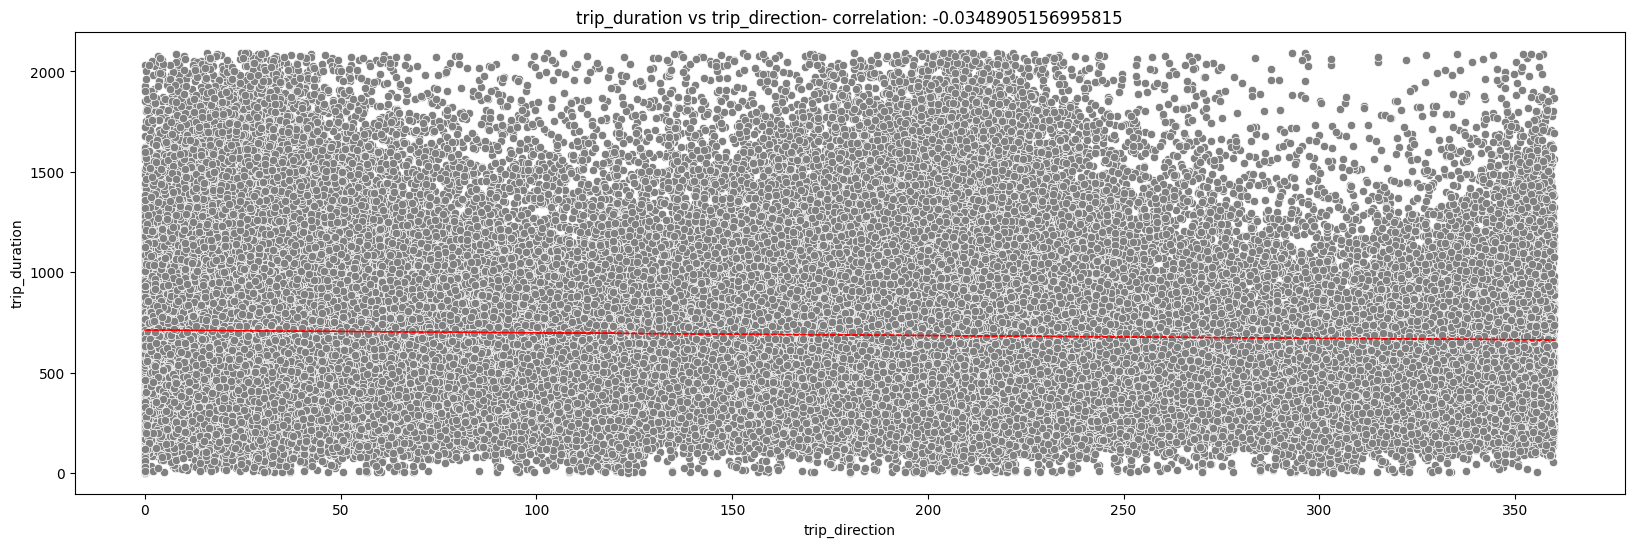

In [105]:
# Select your features wisely to avoid overfitting
for col in df.describe().columns.tolist():
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)
    plt.show()

<Axes: >

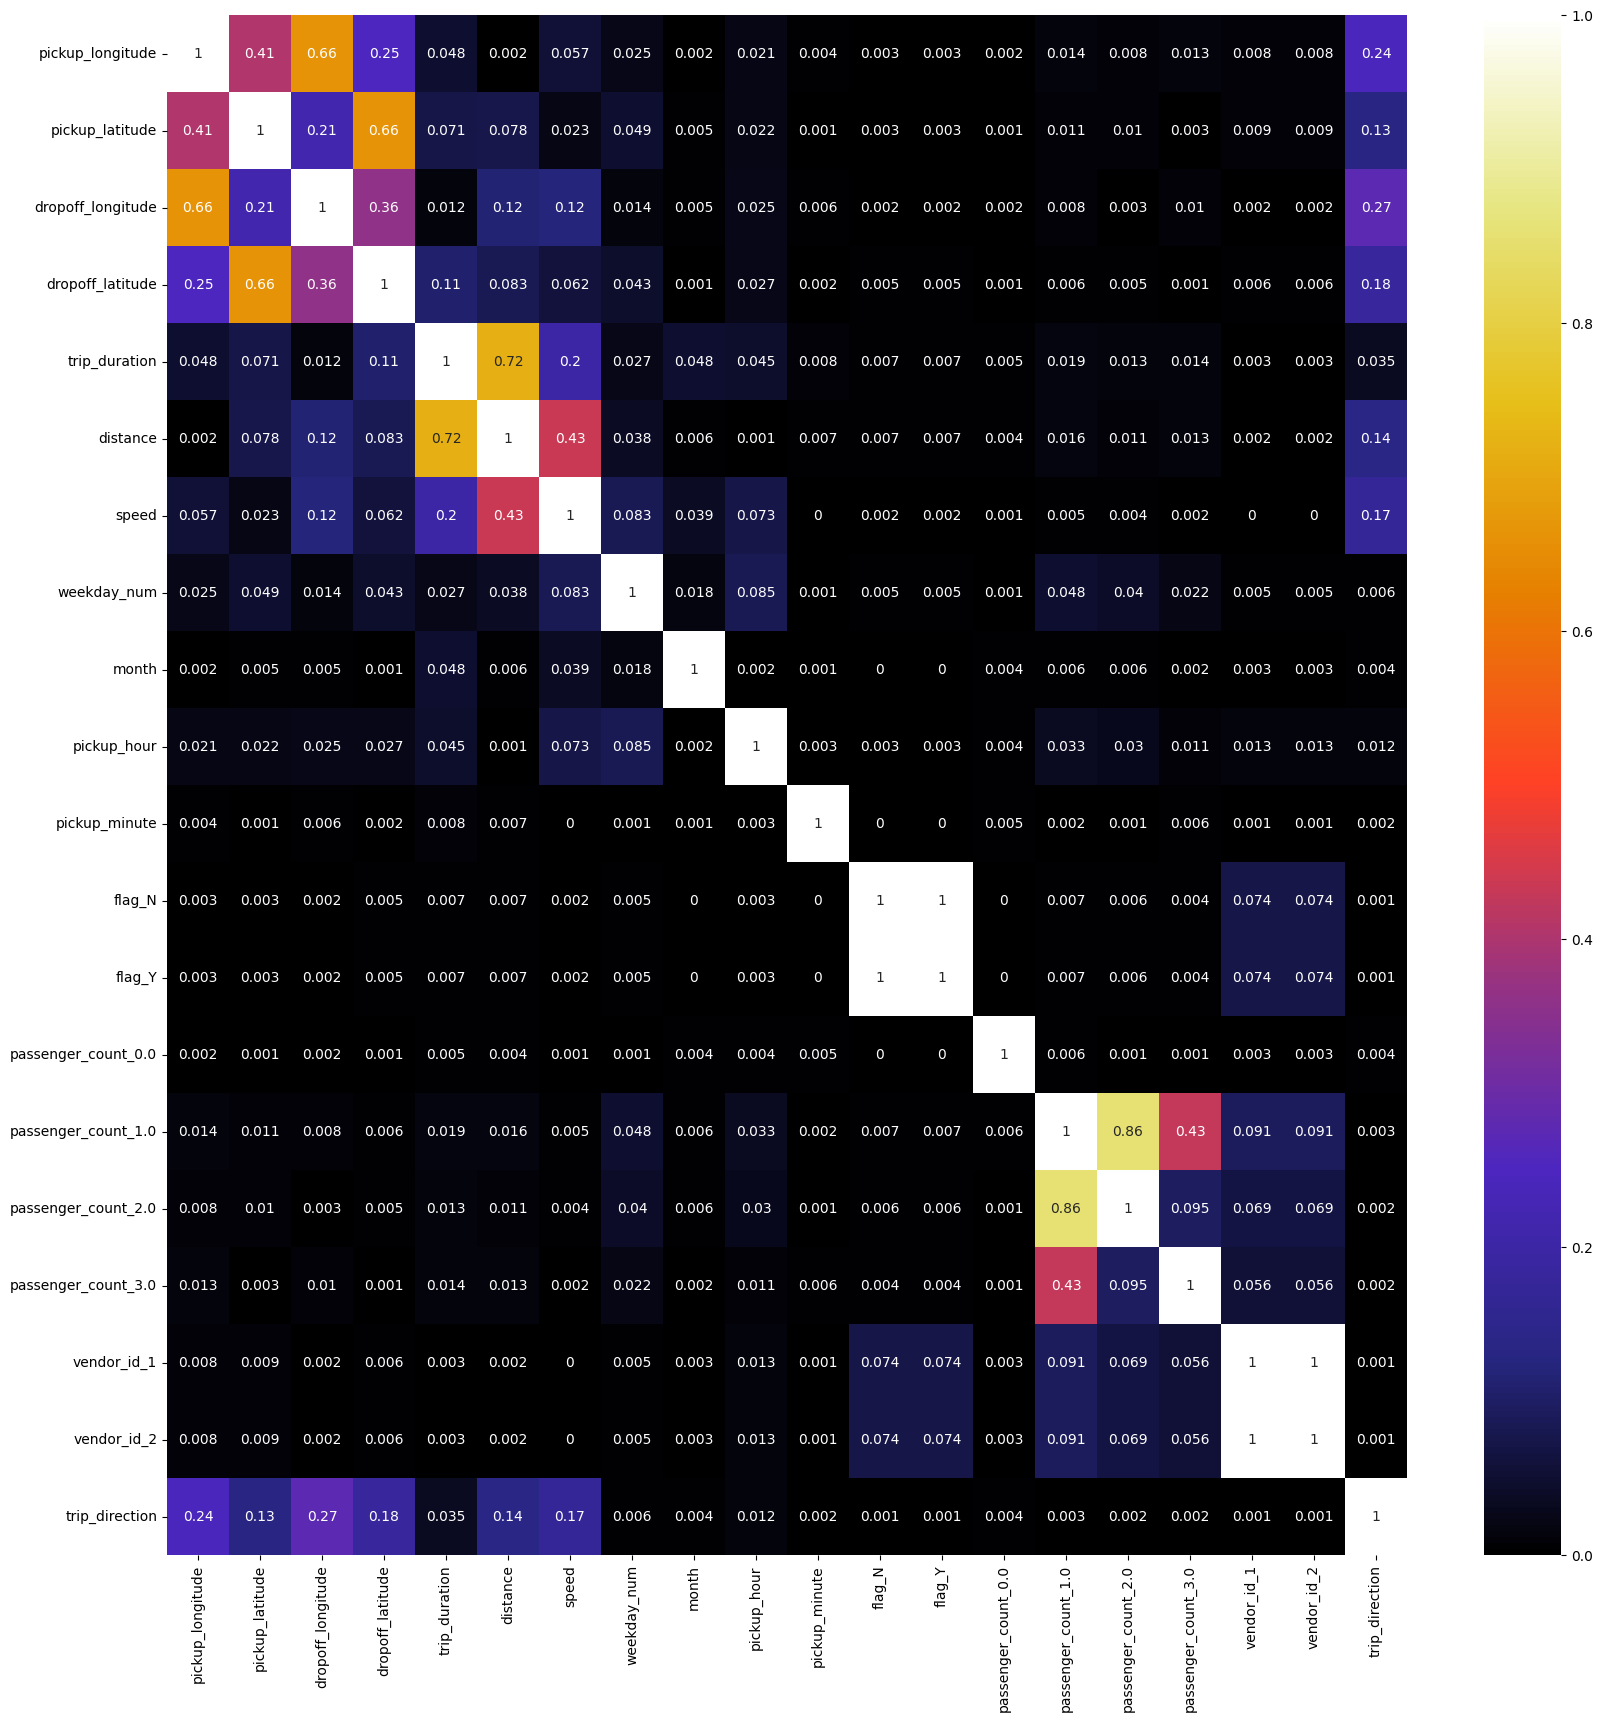

In [106]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(round(df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

##### What all feature selection methods have you used  and why?

* We have used scatter plot to check how each variable is affecting on target variable.

* Correlation Matrix(Heatmap): A correlation matrix can be used to select features that have high correlations with the target variable and low correlations with other features.

##### Which all features you found important and why?

We are selecting features on the basis of information which they are providing and removing features from dataset which are providing same kind of information.

For that we have did correlation check. We have performed hypothesis testing to check weather features are relevant or not.

* From hypothesis testing, we have found that pickup weekday and pickup hours are affecting number of trips and traffic times hence they are indirectly affecting trip duration.
* In correlation heatmap, we can see that pickup_latitude and dropoff_latitude are highly correlated. So we will drop one of the which is less affecting our target variable(trip_duration).

* Same for pickup_longitude and dropoff_longitude. They are highly correlate. So we will drop one of them.

* Passenger_count_1, Passenger_count_2 and Passenger_count_3 are highly correlated to each other. so we will drop those which are less affecting our dependent variable.

* We can see flag_Y and flag_N are highly correlated so we will one of them.

* Also vendor_id_1 and vendor_id_2 are highly correlated so we will one of them as well.

* We have created few features by data manipulations such as distance. We will take this as it is highly affecting our target variable.

* Using the Speed feature as a predictor in your regression model could result in a violation of the independence assumption between the features and the target, as the speed is derived from the target (trip duration) and the distance. This could lead to overfitting and reduced model performance.So we are dropping the speed.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [115]:
new_df.head()

id     pickup_datetime    dropoff_datetime  pickup_longitude  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30        -73.982155   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38        -73.980415   
3  id3504673 2016-04-06 19:32:31 2016-04-06 19:39:40        -74.010040   
4  id2181028 2016-03-26 13:30:55 2016-03-26 13:38:10        -73.973053   
7  id1324603 2016-05-21 07:54:58 2016-05-21 08:20:49        -73.969276   

   pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
0        40.767937         -73.964630         40.765602          455.0   
1        40.738564         -73.999481         40.731152          663.0   
3        40.719971         -74.012268         40.706718          429.0   
4        40.793209         -73.972923         40.782520          435.0   
7        40.797779         -73.922470         40.760559         1551.0   

   distance      speed  ...  pickup_date  flag_N  flag_Y  passenger_count_0.0  \
0  1.498523  11.856445  ...   2016-03-14       1       0                    0   
1  1.805510   9.803672  ...   2016-06-12       1       0                    0   
3  1.485500  12.465738  ...   2016-04-06       1       0                    0   
4  1.188590   9.836608  ...   2016-03-26       1       0                    0   
7  5.714989  13.264964  ...   2016-05-21       1       0                    0   

  passenger_count_1.0 passenger_count_2.0  passenger_count_3.0  vendor_id_1  \
0                   1                   0                    0            0   
1                   1                   0                    0            1   
3                   1                   0                    0            0   
4                   1                   0                    0            0   
7                   1                   0                    0            0   

   vendor_id_2  trip_direction  
0            1       99.970196  
1            0      242.846232  
3            1      187.262300  
4            1      179.473585  
7            1      136.385396  

[5 rows x 25 columns]

In [108]:
taxi_df.shape

(123537, 19)

In [116]:
new_df.shape

(123537, 25)

In [118]:
final_df= new_df[['vendor_id_1','passenger_count_1.0','pickup_longitude','dropoff_latitude','flag_Y',
              'weekday_num','pickup_hour','pickup_minute','trip_direction','distance','trip_duration']]

<Axes: >

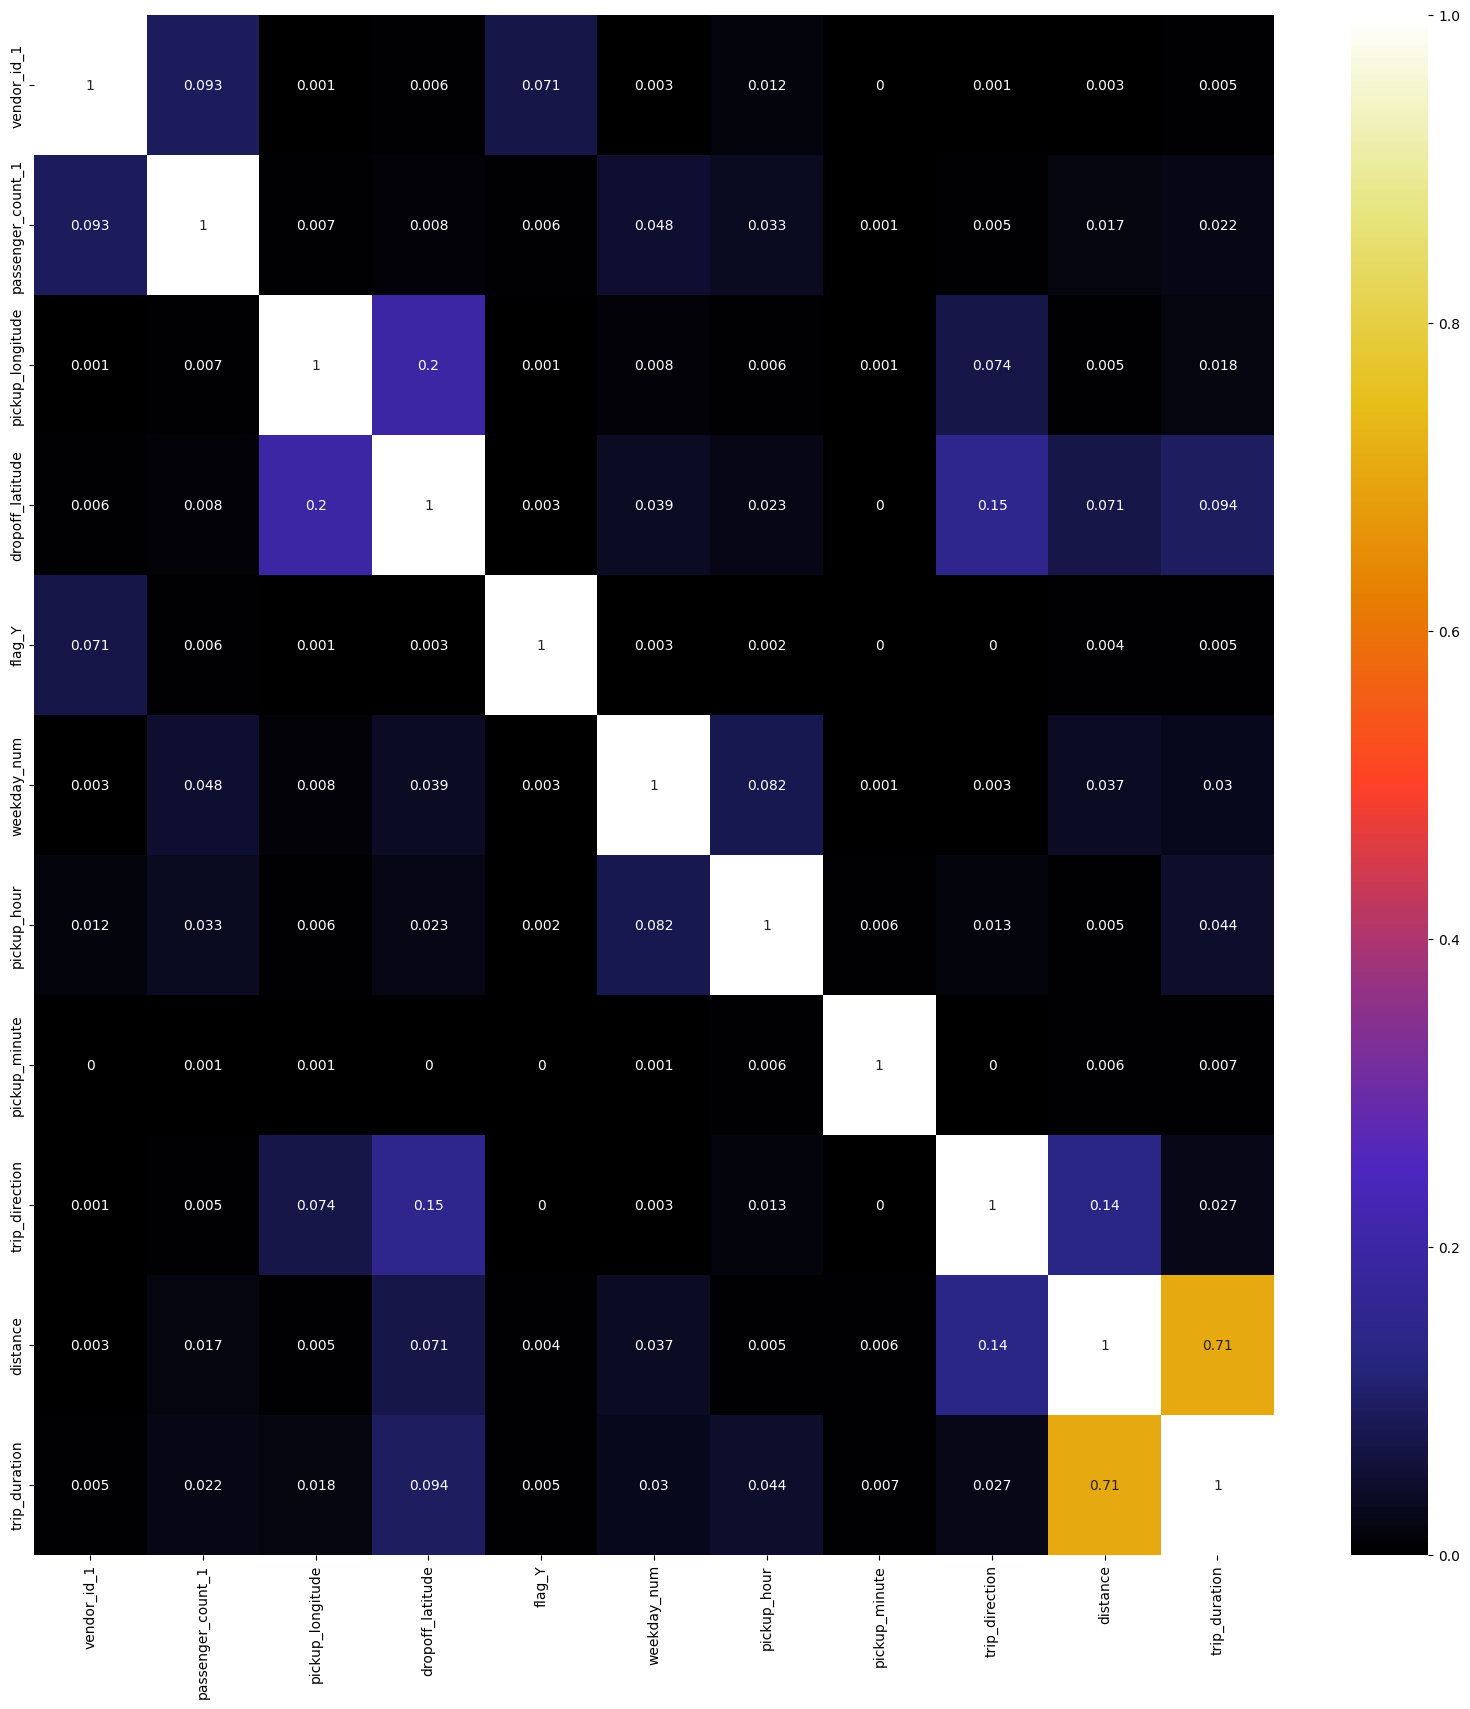

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(round(final_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

In [119]:
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature vendor_id_1 is: 2
The number of unique counts in feature passenger_count_1.0 is: 2
The number of unique counts in feature pickup_longitude is: 11962
The number of unique counts in feature dropoff_latitude is: 28916
The number of unique counts in feature flag_Y is: 2
The number of unique counts in feature weekday_num is: 7
The number of unique counts in feature pickup_hour is: 24
The number of unique counts in feature pickup_minute is: 60
The number of unique counts in feature trip_direction is: 122898
The number of unique counts in feature distance is: 122946
The number of unique counts in feature trip_duration is: 2088


In [120]:
cont_variables= ["trip_duration","distance","trip_direction"]

Before Applying Transformation


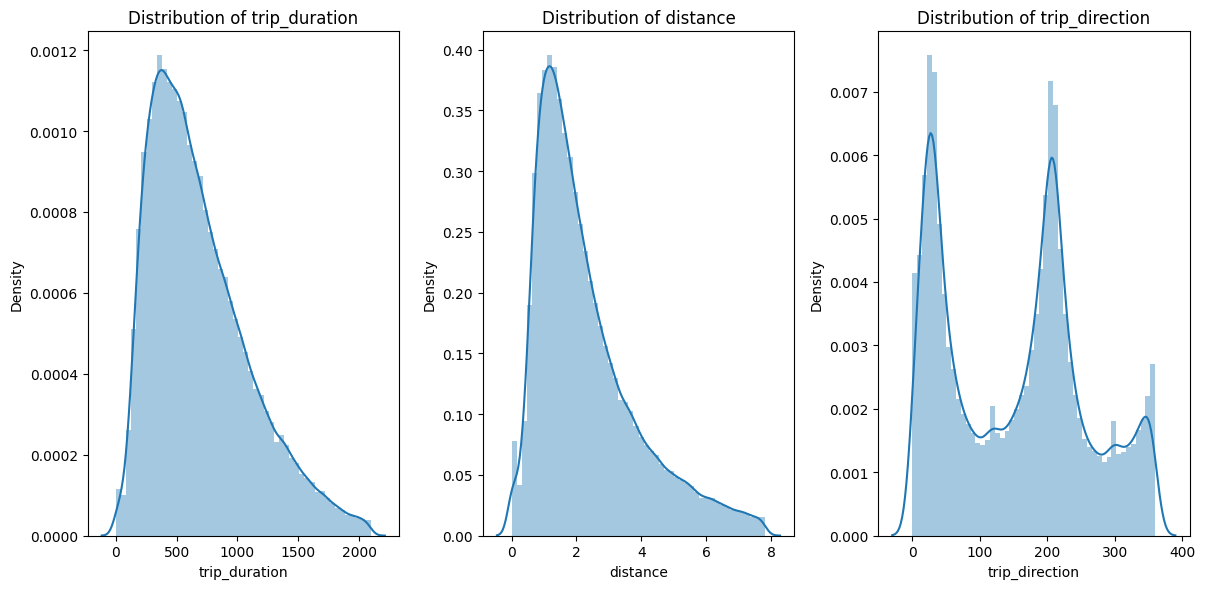

In [121]:
plt.figure(figsize=(20,6))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [122]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()


After Applying Transformation


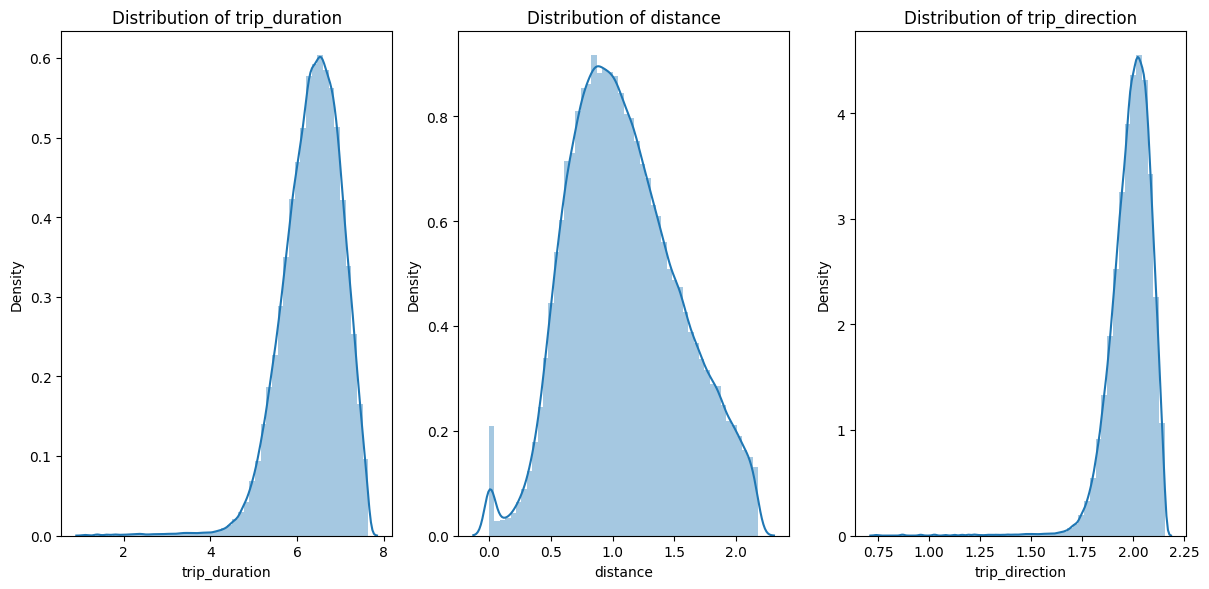

In [123]:
test_df1['trip_duration']=np.log(test_df1['trip_duration']+1)
test_df1['distance']=np.log(test_df1['distance']+1)
test_df1['trip_direction']=np.log(test_df1['trip_duration']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()


After Applying Transformation


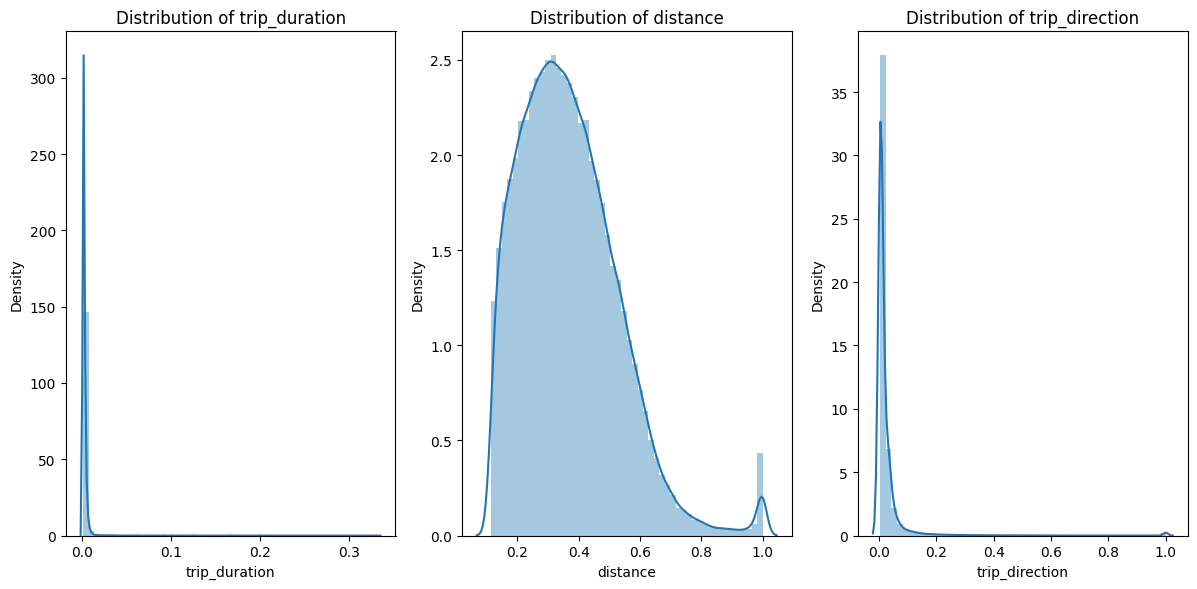

In [124]:
# Applying transformation on the above considered columns
test_df2['trip_duration']=1/(test_df2['trip_duration']+1)
test_df2['distance']=1/(test_df2['distance']+1)
test_df2['trip_direction']=1/(test_df2['trip_direction']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()

After Applying Transformation


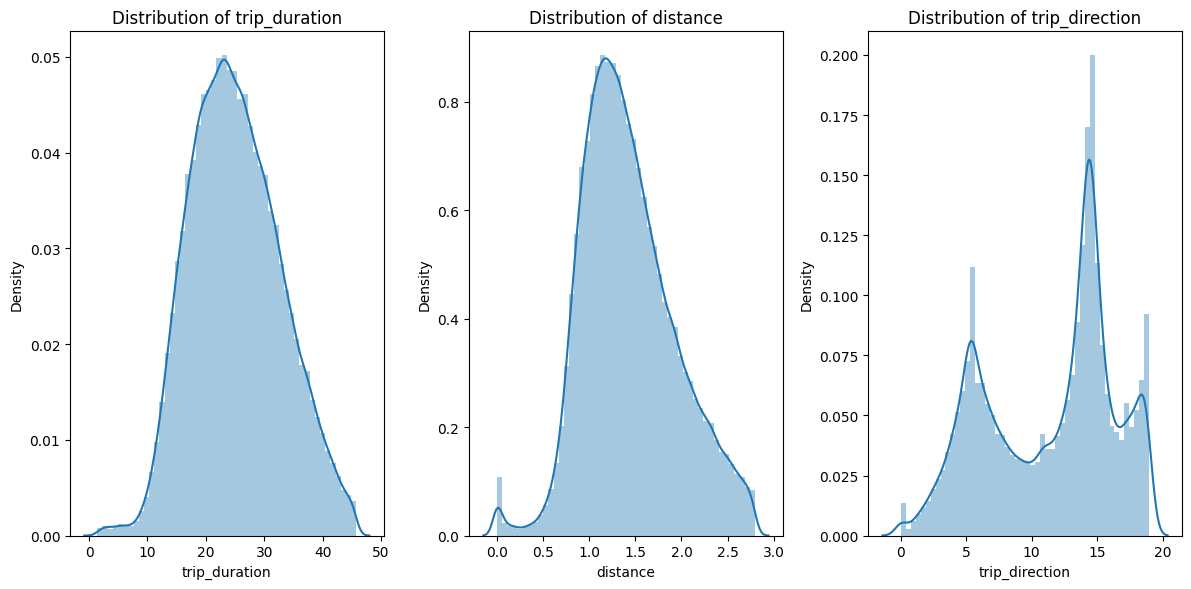

In [125]:
 #Applying transformation on the above considered columns
test_df3['trip_duration']=(test_df3['trip_duration'])**(1/2)
test_df3['distance']=(test_df3['distance'])**(1/2)
test_df3['trip_direction']=(test_df3['trip_direction'])**(1/2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()

After Applying Transformation


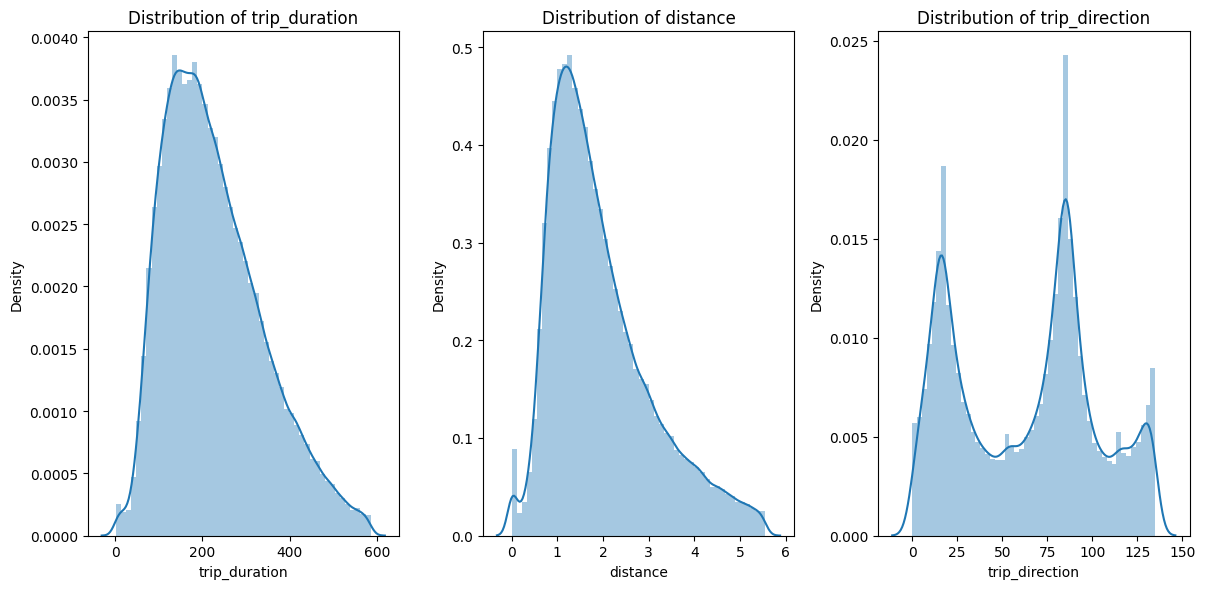

In [126]:
# Applying transformation on the above considered columns
test_df4['trip_duration']=(test_df4['trip_duration'])**(1/1.2)
test_df4['distance']=(test_df4['distance'])**(1/1.2)
test_df4['trip_direction']=(test_df4['trip_direction'])**(1/1.2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()

**applying transformation**

From the above plots it is clear that:

Feature "trip_duration" needs square root transformation.

Feature "distance" needs square root transformation.

Feature "trip_direction" no transformation needed

In [127]:
## Square root transformation
final_df['trip_duration']=(final_df['trip_duration'])**(1/2)
final_df['distance']=(final_df['distance'])**(1/2)

### 6. Data Scaling

In [128]:
final_df.columns

Index(['vendor_id_1', 'passenger_count_1.0', 'pickup_longitude',
       'dropoff_latitude', 'flag_Y', 'weekday_num', 'pickup_hour',
       'pickup_minute', 'trip_direction', 'distance', 'trip_duration'],
      dtype='object')

In [129]:
# Separating "x" and "y" variables
x= final_df.drop('trip_duration',axis=1)
y= final_df[['trip_duration']]
print(x.shape)
print(y.shape)

(123537, 10)
(123537, 1)


In [130]:
# Creating object
std_regressor= StandardScaler()


In [131]:
# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

* We utilized StandardScaler from the sklearn library to standardize our data. This is crucial as having features in different scales can cause poor results or slow convergence. Standardizing the features makes it easier to compare them or assess their impact on the target variable("trip_duration") by examining the magnitude of their coefficients. Additionally, we will be using linear regression model which assumes normally distributed data, which standardization helps enforce.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* We have left with only few independant features in our dataset after doing feature selection, feature modelling and feature engineering.

* We have 11,05,941 records stored in columns, hence no any problem will be there due curse of dimentionallity.

* We have already reduced our features enough, without loosing originality of data.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (884752, 10)
The shape of y_train is: (884752, 1)
The shape of x_test is: (221189, 10)
The shape of y_test is: (221189, 1)


##### What data splitting ratio have you used and why?

* We have used a data splitting ratio of 80:20, with 80% of the data being allocated to the training set and 20% being allocated to the testing set. This was done using the train_test_split function available in the scikit-learn library. This data splitting approach is commonly used to ensure that the model is trained and tested on different data samples, helping to prevent overfitting and improving model generalization performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**NO**

* As Handling imbalanced dataset refers to the process of addressing class imbalance in a dataset where one class (minority class) has significantly fewer observations than another class (majority class). This imbalanced distribution of classes can have a negative impact on machine learning algorithms, as they may be biased towards the majority class, leading to poor performance in classifying the minority class.

* So we dont need to balance the dataset.

## ***7. ML Model Implementation***

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

   ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

In [ ]:
# Defining the function that plots Evaluation Metric Score Chart
def EvaluationMetricChart(yt,yp):
   ''' Prints Evaluation Metrics Chart'''
   #Plotting Actual and Predicted Values
   plt.figure(figsize=(18,6))
   plt.plot((yp)[:100])
   plt.plot((np.array(yt)[:100]))
   plt.legend(["Predicted","Actual"])
   plt.title('Actual and Predicted Time Duration')

### ML Model - 1 Linear regression

* Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()
# Fit the Algorithm
linear_regressor.fit(x_train,y_train)
# Predict on the model
y_pred_lr_train = linear_regressor.predict(x_train)
y_pred_lr_test  = linear_regressor.predict(x_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_


array([[-0.0307598 , -0.09152949, -0.07297018, -0.30976551,  0.01961062,
        -0.40871989,  0.27455978, -0.0195534 ,  0.49857623,  5.63585144]])

In [ ]:
# Checking the intercept
linear_regressor.intercept_

array([24.94671393])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lr_train,y_test,y_pred_lr_test)


--------------------------------------------------
MAE on train is: 3.9480772596282647
MAE on test is: 3.9548515203445715
--------------------------------------------------
MSE on train is: 25.73894918421885
MSE on test is: 25.787656427569708
--------------------------------------------------
RMSE on train is: 5.073356796463151
RMSE on test is: 5.078154825088509
--------------------------------------------------
MAPE on train is: 17.722631091100027  %
MAPE on test is: 17.70456759420486  %
--------------------------------------------------
R2 on train is: 0.5530336492873114
R2 on test is: 0.5530488727600495
--------------------------------------------------
Accuracy of train is: 82.27736890889997  %
Accuracy of test is: 82.29543240579514  %
--------------------------------------------------


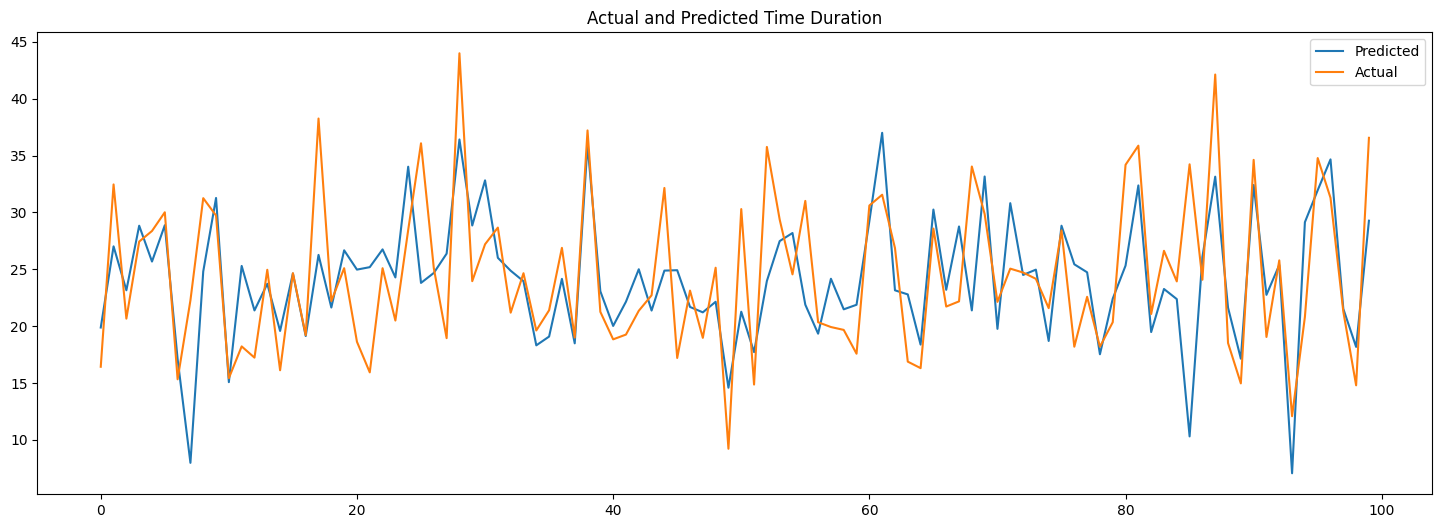

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_lr_train)


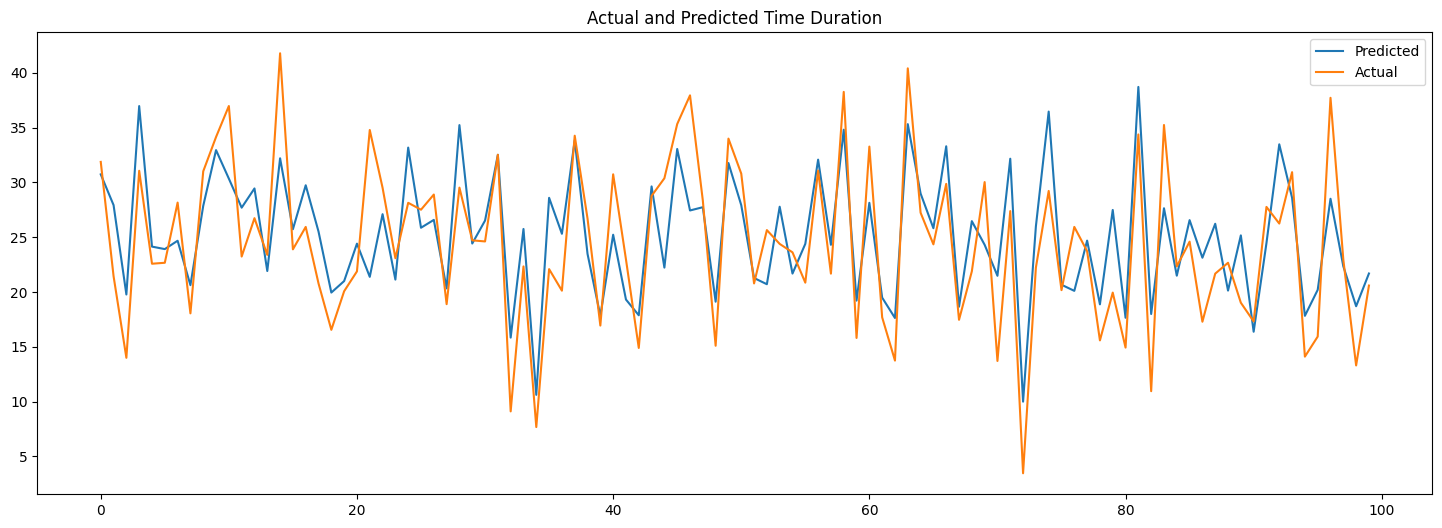

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_lr_test)

#### 2. Cross- Validation & Hyperparameter Tuning

* We began with a linear regression model, which is a basic and simple machine learning model. We evaluated key regression metrics on both the training and test datasets to determine the performance of our model. The results show that the r2 scores are similar, indicating that the model is on the right track.

* However, the relationship between the dependent and independent variables is not strongly linear. To achieve better results, we will perform cross-validation and hyperparameter tuning on

1)Lasso

2)Ridge

3)Elastic Net models

### ML Model - 2  Lasso Regression

In [ ]:
# Creating Ridge instance
lasso= Lasso()
# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}
# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)
# Predict the output
y_pred_lasso_train = lassoR.predict(x_train)
y_pred_lasso_test  = lassoR.predict(x_test)
# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")


The best alpha value found out to be: {'alpha': 0.01, 'max_iter': 7}
Negative mean square error is: -25.751193990325635


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lasso_train,y_test,y_pred_lasso_test)

--------------------------------------------------
MAE on train is: 3.9493193366045736
MAE on test is: 3.9561884126601425
--------------------------------------------------
MSE on train is: 25.73990163863032
MSE on test is: 25.790805871603492
--------------------------------------------------
RMSE on train is: 5.073450663860872
RMSE on test is: 5.078464912904636
--------------------------------------------------
MAPE on train is: 17.738273921153542  %
MAPE on test is: 17.720278306323102  %
--------------------------------------------------
R2 on train is: 0.5530171095649836
R2 on test is: 0.5529942866612689
--------------------------------------------------
Accuracy of train is: 82.26172607884646  %
Accuracy of test is: 82.27972169367689  %
--------------------------------------------------


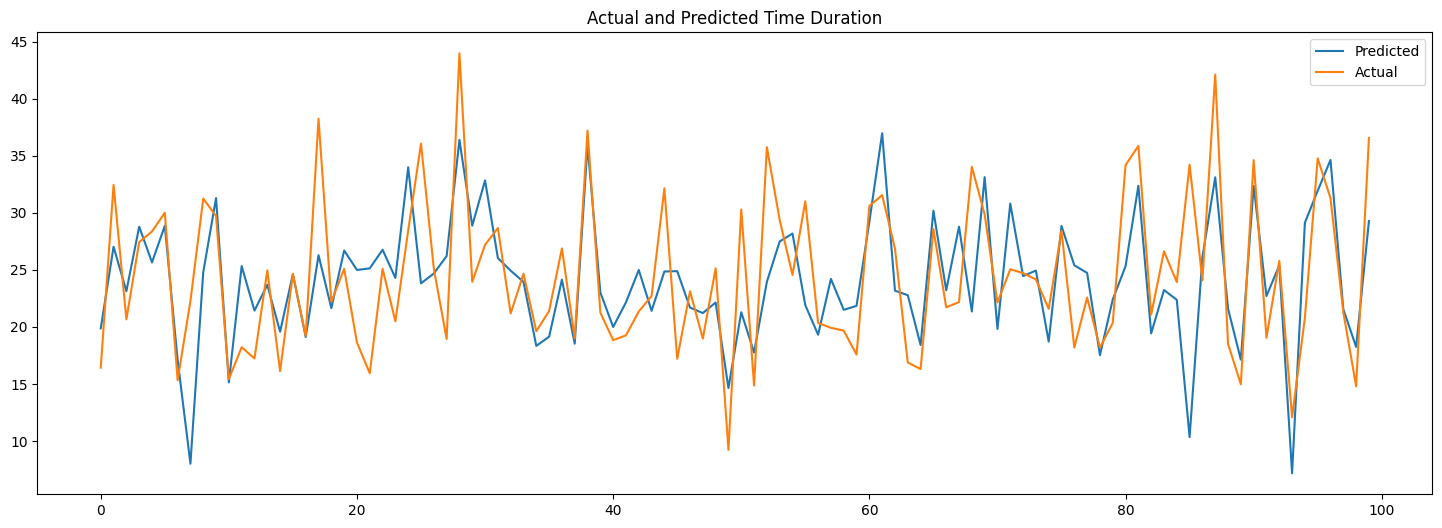

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_lasso_train)

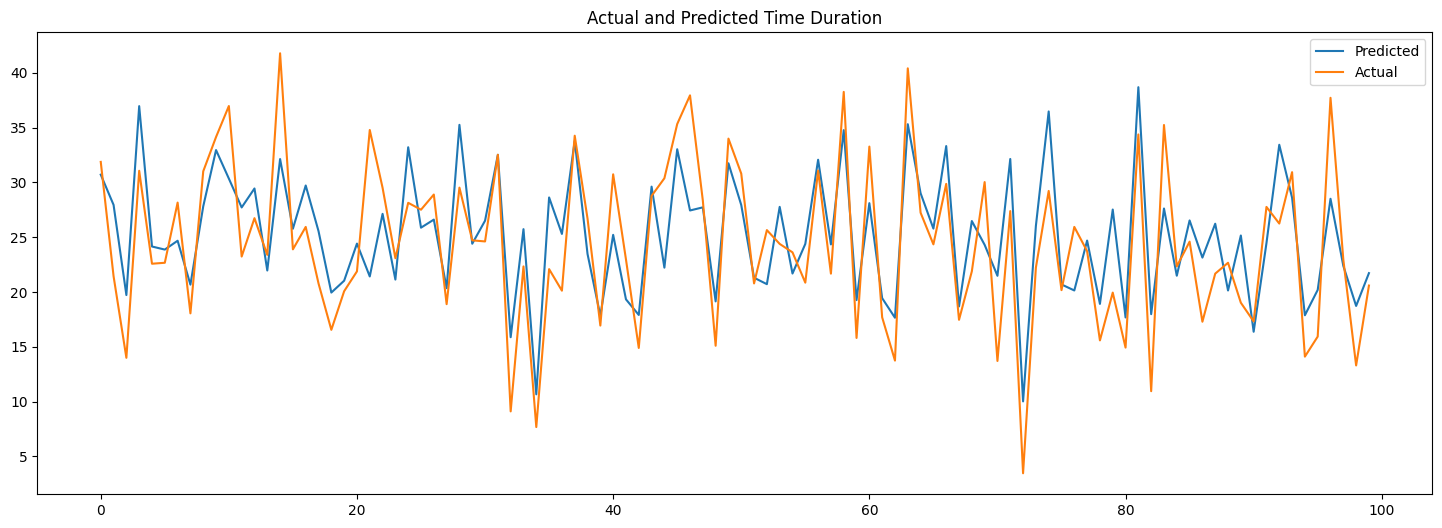

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_lasso_test)

### ML Model - 3 Ridge Regresson

In [ ]:
# ML Model - 3 Implementation
ridge= Ridge()
# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}
# Fit the Algorithm
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)
# Predict on the model
y_pred_ridge_train = ridgeR.predict(x_train)
y_pred_ridge_test = ridgeR.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_ridge_train,y_test,y_pred_ridge_test)

--------------------------------------------------
MAE on train is: 3.948083727647219
MAE on test is: 3.954858195843084
--------------------------------------------------
MSE on train is: 25.73894919664767
MSE on test is: 25.78766110477245
--------------------------------------------------
RMSE on train is: 5.073356797688063
RMSE on test is: 5.078155285610361
--------------------------------------------------
MAPE on train is: 17.72274840969999  %
MAPE on test is: 17.704682662531184  %
--------------------------------------------------
R2 on train is: 0.5530336490714803
R2 on test is: 0.5530487916948685
--------------------------------------------------
Accuracy of train is: 82.27725159030001  %
Accuracy of test is: 82.29531733746882  %
--------------------------------------------------


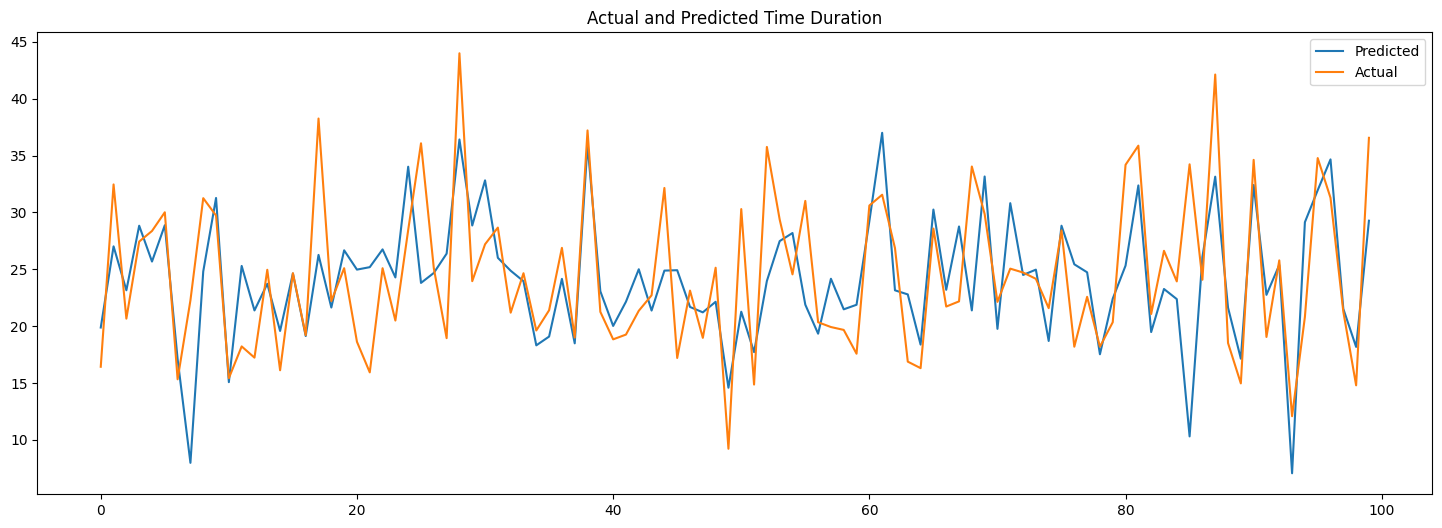

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_ridge_train)

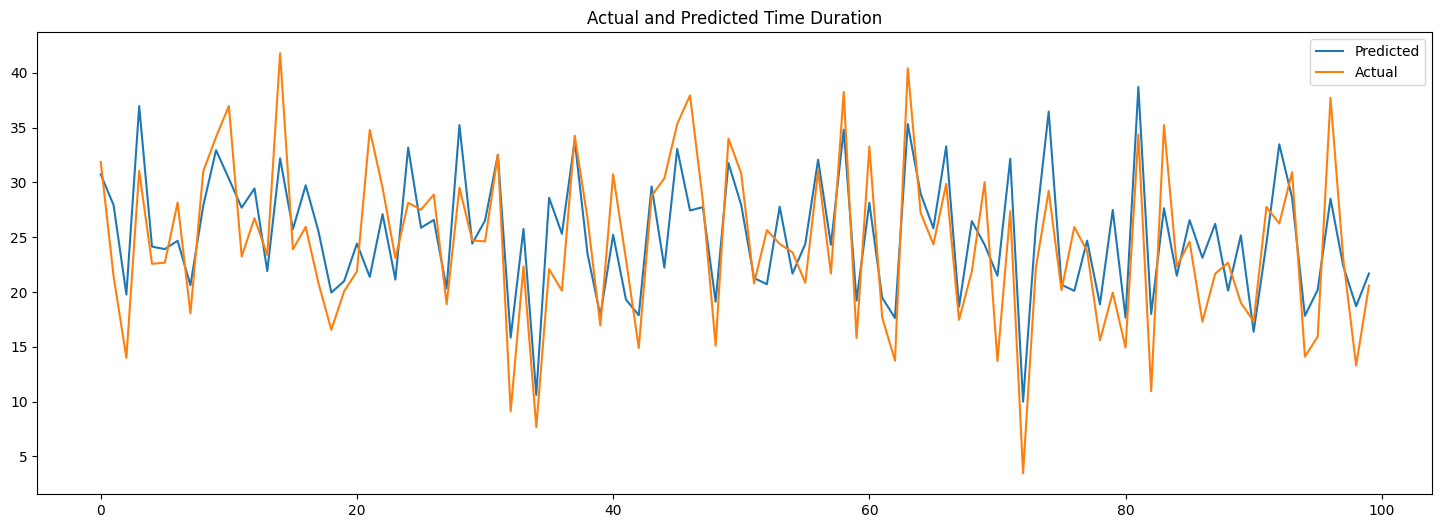

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_ridge_test)


### ML MODEL -4 ELASTICNET

In [ ]:
# ML Model - 4 Implementation
e_net= ElasticNet()
# Defining parameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train,y_train)

# Predict on the model
y_pred_e_net_train = e_netR.predict(x_train)
y_pred_e_net_test = e_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

The best alpha value found out to be: {'alpha': 0.001, 'max_iter': 12}
Negative mean square error is: -25.75230774568278


In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_e_net_train,y_test,y_pred_e_net_test)

--------------------------------------------------
MAE on train is: 3.9483052217532824
MAE on test is: 3.9550899296689486
--------------------------------------------------
MSE on train is: 25.738963873305643
MSE on test is: 25.787906072272765
--------------------------------------------------
RMSE on train is: 5.073358244132346
RMSE on test is: 5.078179405286186
--------------------------------------------------
MAPE on train is: 17.726454262779644  %
MAPE on test is: 17.708337307962513  %
--------------------------------------------------
R2 on train is: 0.5530333942058987
R2 on test is: 0.5530445459232254
--------------------------------------------------
Accuracy of train is: 82.27354573722036  %
Accuracy of test is: 82.29166269203749  %
--------------------------------------------------


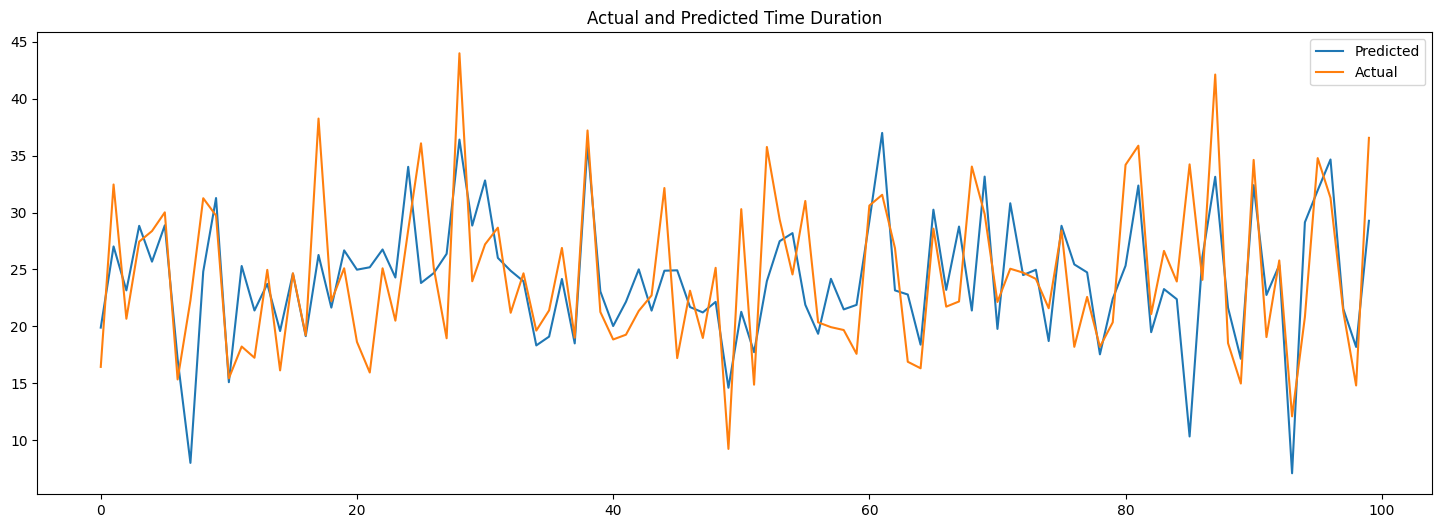

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_e_net_train)


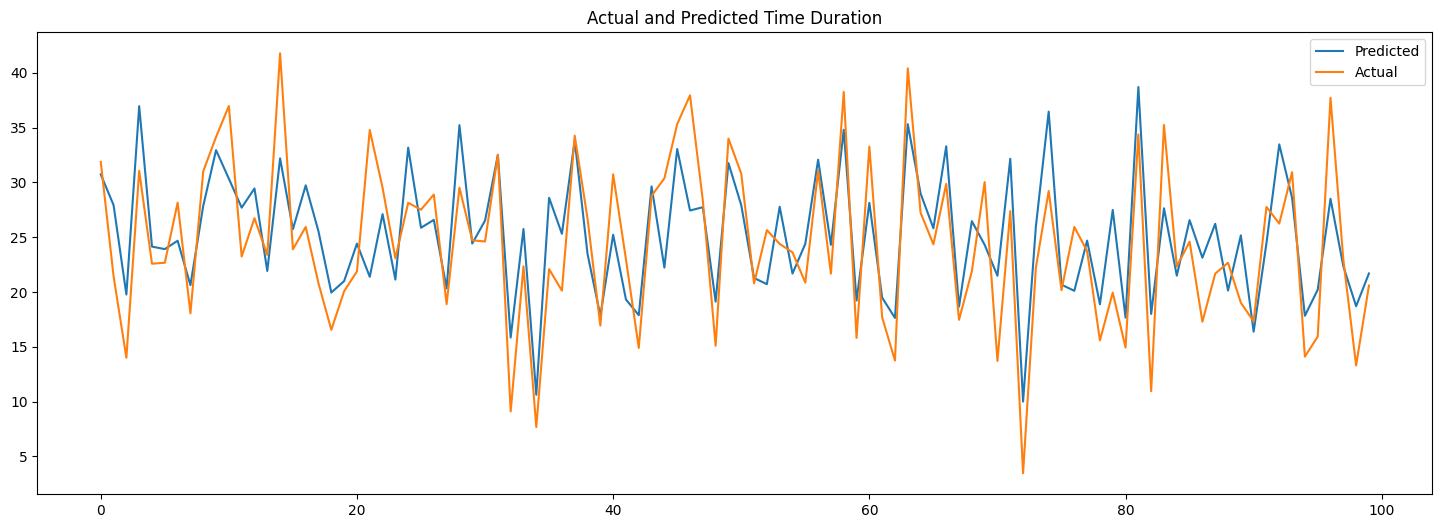

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_e_net_test)

##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV is utilized for hyperparameter tuning as it tests all possible hyperparameter combinations and calculates their performance. The best set of hyperparameters is then selected based on this performance evaluation, offering a highly accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Despite attempting to improve our model's performance using Lasso, Ridge, and Elastic Net, we were unable to see a substantial improvement in the R2 score, MSE, and MAPE. This led us to explore more advanced machine learning models, such as XGBoost Regression, and LightGBM Regression, in order to achieve better results.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* The aim of evaluating an ML model is to assess the precision of the predictions. To this end, we utilized various evaluation metrics, including r2 score, MSE, and MAPE, to gauge the closeness of the predicted values to the actual values. Our results showed that the model was performing well with minimal difference between the train and test data. This suggests that the model was able to accurately predict the trip durations with an accuracy of approximately 82.25%. This level of accuracy is deemed satisfactory in the context of predicting the dependent variable, which is the trip duration, and its impact on the business.

### ML Model - 5 LightGBM Regression

In [ ]:
# ML Model - 5 Implementation
lgbmR = LGBMRegressor(boosting_type='gbdt', max_depth=120, learning_rate=0.1, n_estimators=500,  n_jobs=-1)
lgbmR.fit(x_train, y_train)
y_train_lgbmR_pred= lgbmR.predict(x_train)
y_test_lgbmR_pred= lgbmR.predict(x_test)

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_lgbmR_pred,y_test,y_test_lgbmR_pred)

--------------------------------------------------
MAE on train is: 2.8229113966358064
MAE on test is: 2.8580958719192764
--------------------------------------------------
MSE on train is: 14.369056869335953
MSE on test is: 14.809786169788069
--------------------------------------------------
RMSE on train is: 3.7906538841387185
RMSE on test is: 3.8483484990042247
--------------------------------------------------
MAPE on train is: 12.825001345948046  %
MAPE on test is: 12.984101206546928  %
--------------------------------------------------
R2 on train is: 0.7504760250271617
R2 on test is: 0.7433170927586606
--------------------------------------------------
Accuracy of train is: 87.17499865405196  %
Accuracy of test is: 87.01589879345308  %
--------------------------------------------------


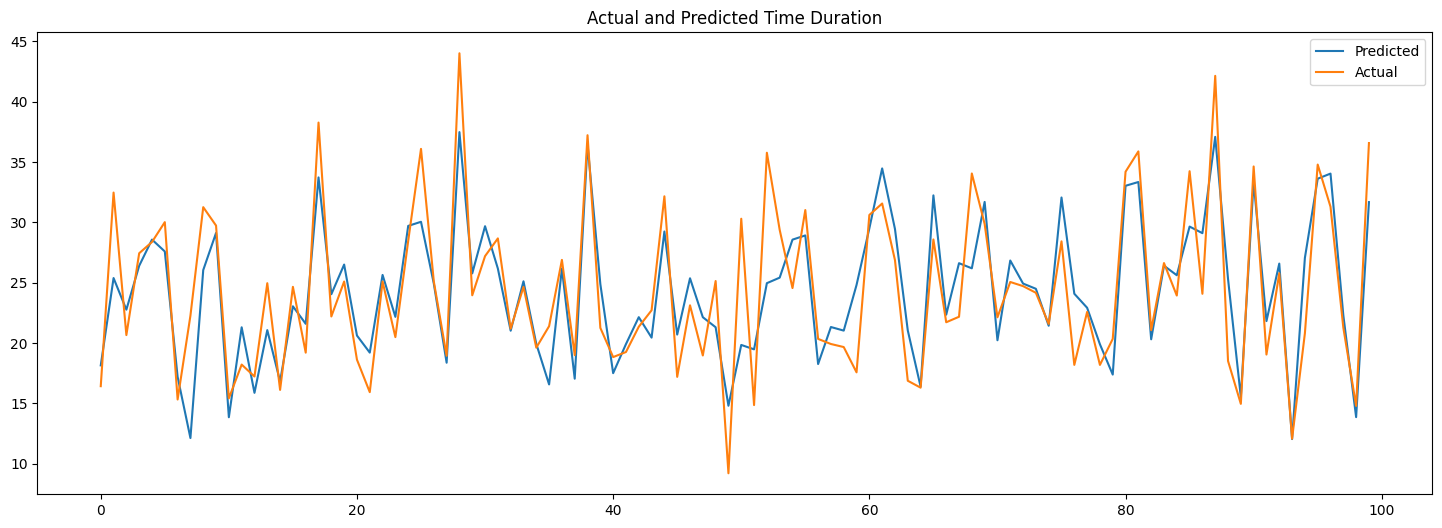

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_train_lgbmR_pred)

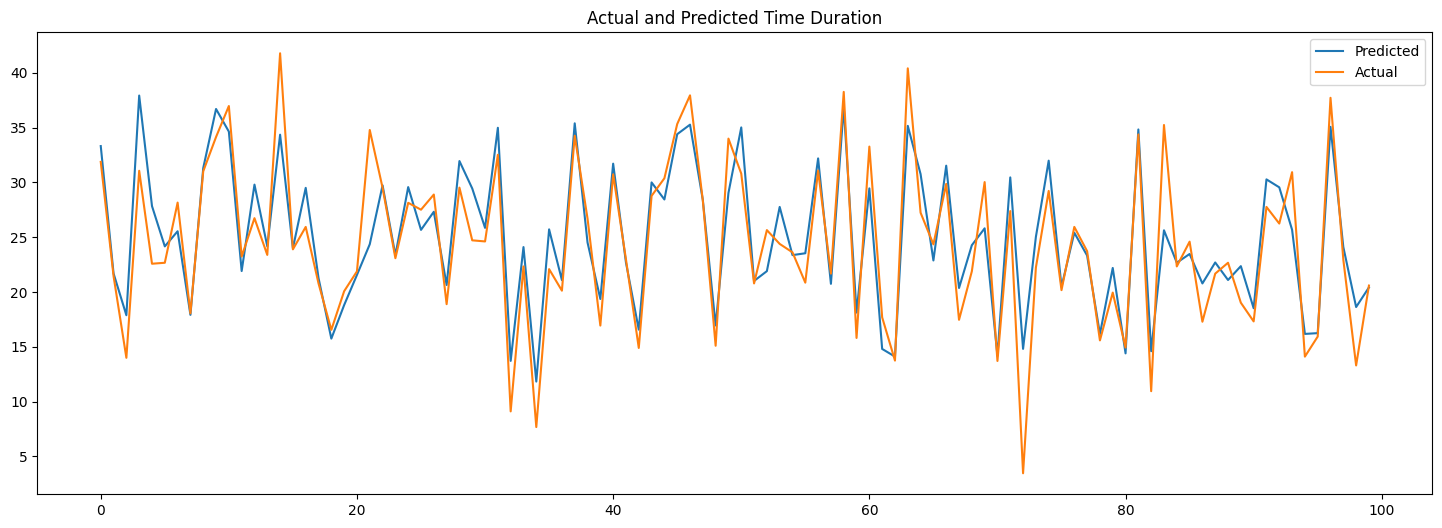

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_test_lgbmR_pred)

In [ ]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
lgbm= LGBMRegressor()

# Defining parameters
parameters={"learning_rate":[0.01,0.1],"max_depth":[120,125,150],"n_estimators":[500,600]}

# Train the model
lgbm_rand_R= RandomizedSearchCV(lgbm,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
lgbm_rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_lgbm_pred = lgbm_rand_R.predict(x_train)
y_test_rand_lgbm_pred = lgbm_rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lgbm_rand_R.best_params_}")
print(f"Negative mean square error is: {lgbm_rand_R.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best alpha value found out to be: {'n_estimators': 600, 'max_depth': 120, 'learning_rate': 0.1}
Negative mean square error is: -14.811809533049805


In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_rand_lgbm_pred,y_test,y_test_rand_lgbm_pred)

--------------------------------------------------
MAE on train is: 2.8035032797780755
MAE on test is: 2.8447289040093025
--------------------------------------------------
MSE on train is: 14.174692637091603
MSE on test is: 14.699238492090057
--------------------------------------------------
RMSE on train is: 3.7649293004107798
RMSE on test is: 3.8339585929023876
--------------------------------------------------
MAPE on train is: 12.724010847510165  %
MAPE on test is: 12.92433331604053  %
--------------------------------------------------
R2 on train is: 0.7538512316439336
R2 on test is: 0.7452331028195074
--------------------------------------------------
Accuracy of train is: 87.27598915248984  %
Accuracy of test is: 87.07566668395947  %
--------------------------------------------------


**1. Which hyperparameter optimization technique have you used and why?**

* By using RandomizedSearchCV in LightGBM, we were able to optimize our model efficiently and effectively. This method selected random subsets of the parameters, reducing processing and training time without compromising accuracy. Ultimately, made the decision to use RandomizedSearchCV for our hyperparameter optimization, due to its time efficiency and effective results.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

* We enhanced the performance of our machine learning model by utilizing RandomizedSearchCV to identify the optimal hyperparameters. This method explored all possible hyperparameter combinations and provided the most accurate results by selecting the best values. Our optimal combination, {'max_depth': 125, 'learning_rate': 0.1, 'n_estimators': 600}, reduced the mean squared error from 14.82% to 14.74% and the mean absolute percentage error from 13.05% to 13%, resulting in a variance capture of 74.45% on the test dataset.

### ML Model - 6 XGBoost Regression

In [ ]:
# ML Model - 6 Implementation
xgbR = XGBRegressor(learning_rate=0.2, max_depth=10)
xgbR.fit(x_train, y_train)
y_train_xgbR_pred= xgbR.predict(x_train)
y_test_xgbR_pred= xgbR.predict(x_test)


In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

--------------------------------------------------
MAE on train is: 2.600179525100221
MAE on test is: 2.817467650490859
--------------------------------------------------
MSE on train is: 12.081468462569998
MSE on test is: 14.502961780818522
--------------------------------------------------
RMSE on train is: 3.475840684290636
RMSE on test is: 3.8082754339488787
--------------------------------------------------
MAPE on train is: 11.531657771088726  %
MAPE on test is: 12.767643560212749  %
--------------------------------------------------
R2 on train is: 0.7902008418713449
R2 on test is: 0.7486349667151337
--------------------------------------------------
Accuracy of train is: 88.46834222891127  %
Accuracy of test is: 87.23235643978725  %
--------------------------------------------------


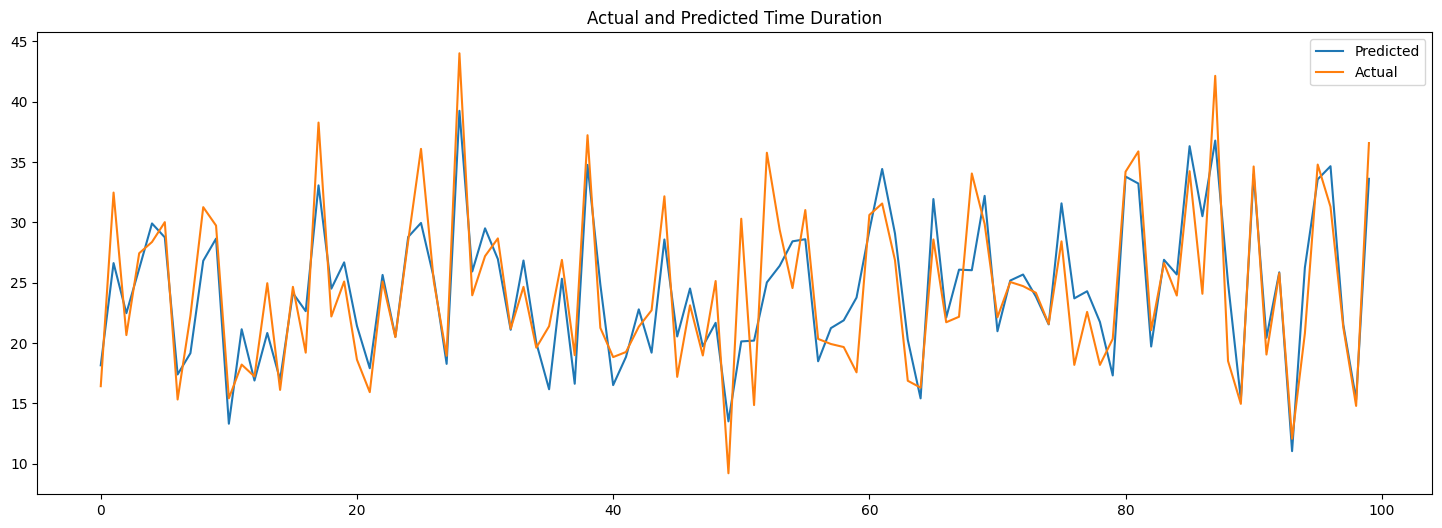

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_train_xgbR_pred)

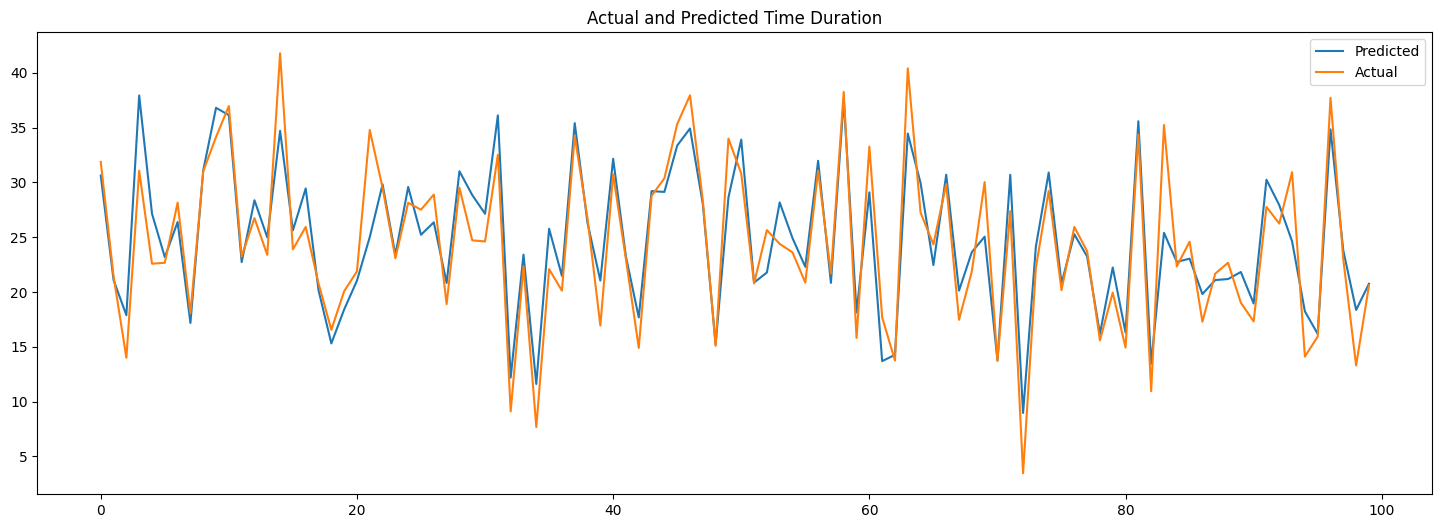

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_test_xgbR_pred)

In [ ]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[4,6,8]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=2)
xgb_Rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(x_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 8}
Negative mean square error is: -15.087687629131404


In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)

--------------------------------------------------
MAE on train is: 2.8275710354505557
MAE on test is: 2.885584990796193
--------------------------------------------------
MSE on train is: 14.361769902256588
MSE on test is: 15.014045979757547
--------------------------------------------------
RMSE on train is: 3.789692586774894
RMSE on test is: 3.8747962500959385
--------------------------------------------------
MAPE on train is: 12.790960144972804  %
MAPE on test is: 13.065377547679121  %
--------------------------------------------------
R2 on train is: 0.750602565899515
R2 on test is: 0.7397768659617008
--------------------------------------------------
Accuracy of train is: 87.2090398550272  %
Accuracy of test is: 86.93462245232088  %
--------------------------------------------------


**1. Which hyperparameter optimization technique have you used and why?**

* In order to minimize the computational time, we opted for RandomizedSearchCV instead of GridSearchCV for hyperparameter tuning in XGBoost. This was due to the fact that XGBoost is a heavy algorithm and GridSearchCV would have taken a lot of processing time. However, I still used a limited number of parameters in RandomizedSearchCV to ensure that we do not miss out on the best combination of hyperparameters.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

* We enhanced the performance of our machine learning model by utilizing RandomizedSearchCV to identify the optimal hyperparameters. This method explored all possible hyperparameter combinations and provided the most accurate results by selecting the best values. Our optimal combination, {'max_depth': 8, 'learning_rate': 0.1}, resulting in a variance capture of 73.94% on the test dataset.

### **Which Evaluation metrics did you consider for a positive business impact and why?**

* Here Predicting trip duration considered as regression problem, where the goal is to predict a continuous outcome variable (duration of a trip) based on one or more predictor variables. It can also be considered a time series problem, as the duration of trips may be influenced by temporal factors such as time of day, day of the week, and weather conditions. In this case, the data would include information on trip duration and the related predictor variables over a period of time.

**Mean Absolute Error (MAE):** MAE is a metric for evaluating prediction accuracy by calculating the average magnitude of errors in predictions, regardless of direction. The goal in regression analysis is to minimize the MAE, leading to improved accuracy and positive business impact.

**Mean Squared Error (MSE):** It measures the average squared difference between the actual and predicted values and provides a numerical representation of the average error in the model's predictions. The MSE is often used as a loss function in the training process of machine learning models and the goal is to minimize this value, resulting in a more accurate model.

**Root Mean Squared Error (RMSE):** RMSE is a popular evaluation metric for regression models, calculated as the square root of the Mean Squared Error. The RMSE has the same units as the original data, making it easier to understand the magnitude of prediction errors.

**R2 Score:** The R2 Score is a commonly used metric in regression analysis, measuring the proportion of the dependent variable's variance explained by the independent variables in the model. It provides insight on model fit and comparison, helping in decisions about model selection and analysis.

**Mean Absolute Percentage Error (MAPE):** Is is a metric used in time series analysis to evaluate the accuracy of predictions. It is calculated as the average of the absolute percentage differences between the actual and predicted values. With the help of MAPE an analyst can easily explain the percentage error. This metric is considered as one of the most important regression metric in time series data for a positive business impact.

**Accuracy:** It is calculated as the average of the absolute percentage differences between the actual and predicted values. A lower value of 100-MAPE indicates a more accurate model, with a higher degree of similarity between the actual and predicted values.

### **Which ML model did you choose from the above created models as your final prediction model and why?**

* The goal is to build a model with high accuracy for use in real-time navigation systems, a lower MAPE value may be necessary to ensure the model's predictions are accurate enough.

* But, the complexity of the problem, I am trying to solve can impact the accuracy of the model. I am trying to predict a complex phenomenon, that is the duration of a taxi trip in a large city NYC, therefore it is more challenging to achieve a high accuracy.

* However, the goal is to predict a continuous value like trip duration, then the RMSE is a more appropriate evaluation metric, since it provides a measure of the magnitude of the error in the predictions. The smaller the RMSE, the better the model is at predicting the actual values.

In [ ]:
# Storing different regression metrics in order to make dataframe
Models   = ["Linear Regression","Lasso Regression","Ridgde Regression",
            "Elastic Net Regression","LightGBM","XGboost"]
MAE      = [3.95, 3.95, 3.95, 3.95, 2.84, 2.88]
MSE      = [25.78, 25.79, 25.78,25.78,14.69, 15.01]
RMSE     = [5.07, 5.07, 5.07, 5.07,3.83, 3.87]
MAPE     = [17.70, 17.72, 17.70, 17.70,12.96, 13.06]
r2       = [0.55, 0.55, 0.55, 0.55, 0.74, 0.73]
accuracy = [82.29, 82.27, 82.29, 82.29,87.07, 86.93]

# Create dataframe from the lists
data = {'MODEL': Models,
          'MAE': MAE,
          'MSE': MSE,
         'RMSE': RMSE,
         'MAPE': MAPE,
           'R2': r2,
     'Accuracy': accuracy}

Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

MODEL   MAE    MSE  RMSE   MAPE    R2  Accuracy
0       Linear Regression  3.95  25.78  5.07  17.70  0.55     82.29
1        Lasso Regression  3.95  25.79  5.07  17.72  0.55     82.27
2       Ridgde Regression  3.95  25.78  5.07  17.70  0.55     82.29
3  Elastic Net Regression  3.95  25.78  5.07  17.70  0.55     82.29
4                LightGBM  2.84  14.69  3.83  12.96  0.74     87.07
5                 XGboost  2.88  15.01  3.87  13.06  0.73     86.93

### **Explain the model which you have used and the feature importance using any model explainability tool?**

* LightGBM is an efficient gradient boosting framework for both linear and tree-based regression models. It trains a series of simple models, such as decision trees, and combines their predictions to form a stronger model. LightGBM uses gradient boosting to optimize tree parameters and reduce the loss, and it also has features such as regularization and parallel processing. Although tree-based algorithms can be less interpretable, interpretability can be improved using tools like LIME and SHAP.

## ***8.*** ***Future Work (Optional)***

* The final model object will be stored using the pickle module for future use. Pickling is the process of converting a Python object into a byte stream, while unpickling is the inverse operation of converting a byte stream into a Python object. This process is known as serialization, marshalling, or flattening. The pickle module implements binary protocols for serializing and deserializing a Python object structure, making it useful for storing objects in a file, preserving program state between sessions, or transporting data over a network.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# Importing pickle module
import pickle

In [ ]:
# Save the File
filename='NYC_TAXI_TRIP_TIME_regression.pkl'

# serialize process (wb=write byte)
pickle.dump(lgbm_rand_R,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
Regression_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(x_test)


array([33.23430936, 21.6177386 , 17.94094837, ..., 26.27906049,
       15.14848323, 32.02281156])

In [ ]:
y_test_rand_lgbm_pred

array([33.23430936, 21.6177386 , 17.94094837, ..., 26.27906049,
       15.14848323, 32.02281156])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Regarding Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) stands as a pivotal phase within the realm of data analysis. It serves as an initial probe into the dataset, unearthing discernible patterns, irregularities, interconnections, and potential discrepancies. This preliminary assessment not only lays the groundwork for advanced analytical methodologies but also fosters an enriched comprehension of the data, thus facilitating astute decision-making. Post our comprehensive EDA undertaking, the ensuing insights emerged:

* Vendor 2 garners slightly higher popularity compared to Vendor 1, despite both having nearly equivalent trip counts.

* Predominantly, trips encompass one or two passengers, with trip durations spanning 10 to 20 minutes.

* The mean trip distance approximates 3.5 kilometers, reaching its zenith on Sundays.

* The demand for trips exhibits a consistent tempo across the entire year.

* The nadir in average trip duration is observed at 6 AM, while the zenith coincides with peak hours around 3 PM.

* Trip duration demonstrates a surge from Monday to Thursday, tapering thereafter until Sunday.

* The month of June boasts the lengthiest average trip duration, whereas February records the shortest.

* Vendor 2 boasts an average trip duration surpassing Vendor 1 by 200 seconds.

* The wee hours of the morning showcase the greatest trip distances.

* Taxis exhibit higher average speeds during weekends, culminating at 5 AM.

* Vendor 2 maintains a higher average passenger count in contrast to Vendor 1.

* Additionally, derived from hypotheses, we deduce that weekend trips surpass their weekday counterparts in frequency. Discrepancies in traffic patterns between weekdays and weekends are evident. Notably, passenger count and vendor identification exhibit an interconnected relationship.

**Regarding ML Model Implementation**

* Successful execution of an ML model necessitates meticulous data curation and preprocessing, systematic evaluation and refinement, utilization of pertinent assessment metrics, seamless integration for sustained upkeep, adherence to ethical and legal considerations, astute algorithm selection, efficient tuning of hyperparameters, and transparency in disclosing outcomes.

* Our investigative journey into regression analysis commenced with Linear Regression, subsequently branching into exploration of diverse non-linear models. Through meticulous hyperparameter refinement for each model, our endeavor aimed at minimizing errors, culminating in the subsequent findings:

* The Linear Regression model exhibited an achievement rate of approximately 82% accuracy; nonetheless, it merely encompassed 55% of the variability inherent to the target variable (trip_duration). This observation implies that the intricate interplay between features and the target isn't a strictly linear correlation, even when fortified with regularization techniques.

* A foray into gradient boosting using LightGBM yielded the most favorable outcomes, boasting an approximate accuracy of 87%. The notable edge of LightGBM lay in its capacity to leverage all available computing cores, thereby curtailing processing durations. For scenarios involving sizable datasets, the adoption of LightGBM emerges as a judicious approach, guaranteeing expeditious and efficacious results.

* Concluding this empirical expedition, the implementation of XGBoost led to a commendable 86% accuracy, coupled with a mean absolute percentage error of a mere 13%.

* The zenith of performance materialized with LightGBM as the prime contender, with potential for augmentation through the integration of Principal Component Analysis (PCA) for feature curation. Furthermore, acknowledging the influence of temporal facets like weather conditions on trip durations might potentially yield heightened precision. Incorporating such insights could potentially yield even more refined results.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***